In [1]:
import pandas as pd
import numpy as np
import os
import math
import seaborn as sns
import statistics
import datetime as dt 
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")


In [2]:
data = pd.read_csv("TTM.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-13,10.62,10.64,10.51,10.60,9.197446,136500
1,2005-07-14,10.50,10.50,10.33,10.39,9.015231,136000
2,2005-07-15,10.50,10.65,10.50,10.55,9.154059,158700
3,2005-07-18,10.72,10.74,10.66,10.72,9.301566,88000
4,2005-07-19,10.80,11.03,10.80,10.99,9.535840,128000


In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

/tmp/ipykernel_1299/2985681012.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-13,10.62,10.64,10.51,10.60,9.197446,136500
1,2005-07-14,10.50,10.50,10.33,10.39,9.015231,136000
2,2005-07-15,10.50,10.65,10.50,10.55,9.154059,158700
3,2005-07-18,10.72,10.74,10.66,10.72,9.301566,88000
4,2005-07-19,10.80,11.03,10.80,10.99,9.535840,128000


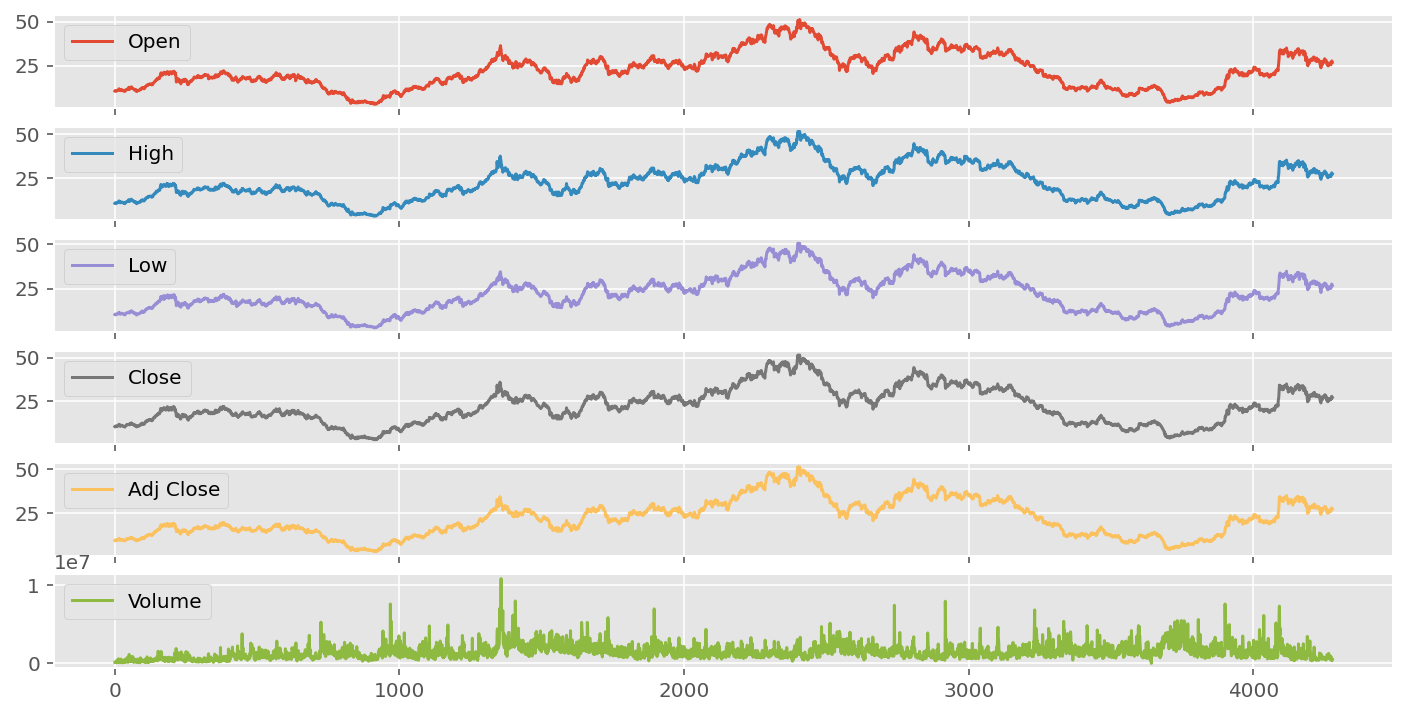

In [6]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#Kya vs kya plot h ye?

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,4279,4279,2005-07-13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,4279.0,NaN,NaN,NaN,22.374447,10.299331,3.17,14.695,20.99,29.355001,51.259998
High,4279.0,NaN,NaN,NaN,22.61316,10.374618,3.41,14.9,21.23,29.719999,51.799999
Low,4279.0,NaN,NaN,NaN,22.108888,10.228782,3.05,14.505,20.790001,29.1,50.650002
Close,4279.0,NaN,NaN,NaN,22.368939,10.297576,3.14,14.725,21.030001,29.405,51.470001
Adj Close,4279.0,NaN,NaN,NaN,21.80599,10.523917,2.907577,13.620653,20.409922,29.132829,51.448509
Volume,4279.0,NaN,NaN,NaN,1477392.848796,939806.962446,0.0,859950.0,1268200.0,1866100.0,10859100.0


In [8]:
#Calculting moving average
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()
#Rolling mean means the whole span will shift continuously

In [9]:
print(statistics.stdev(data['Close']))

10.297576327270608


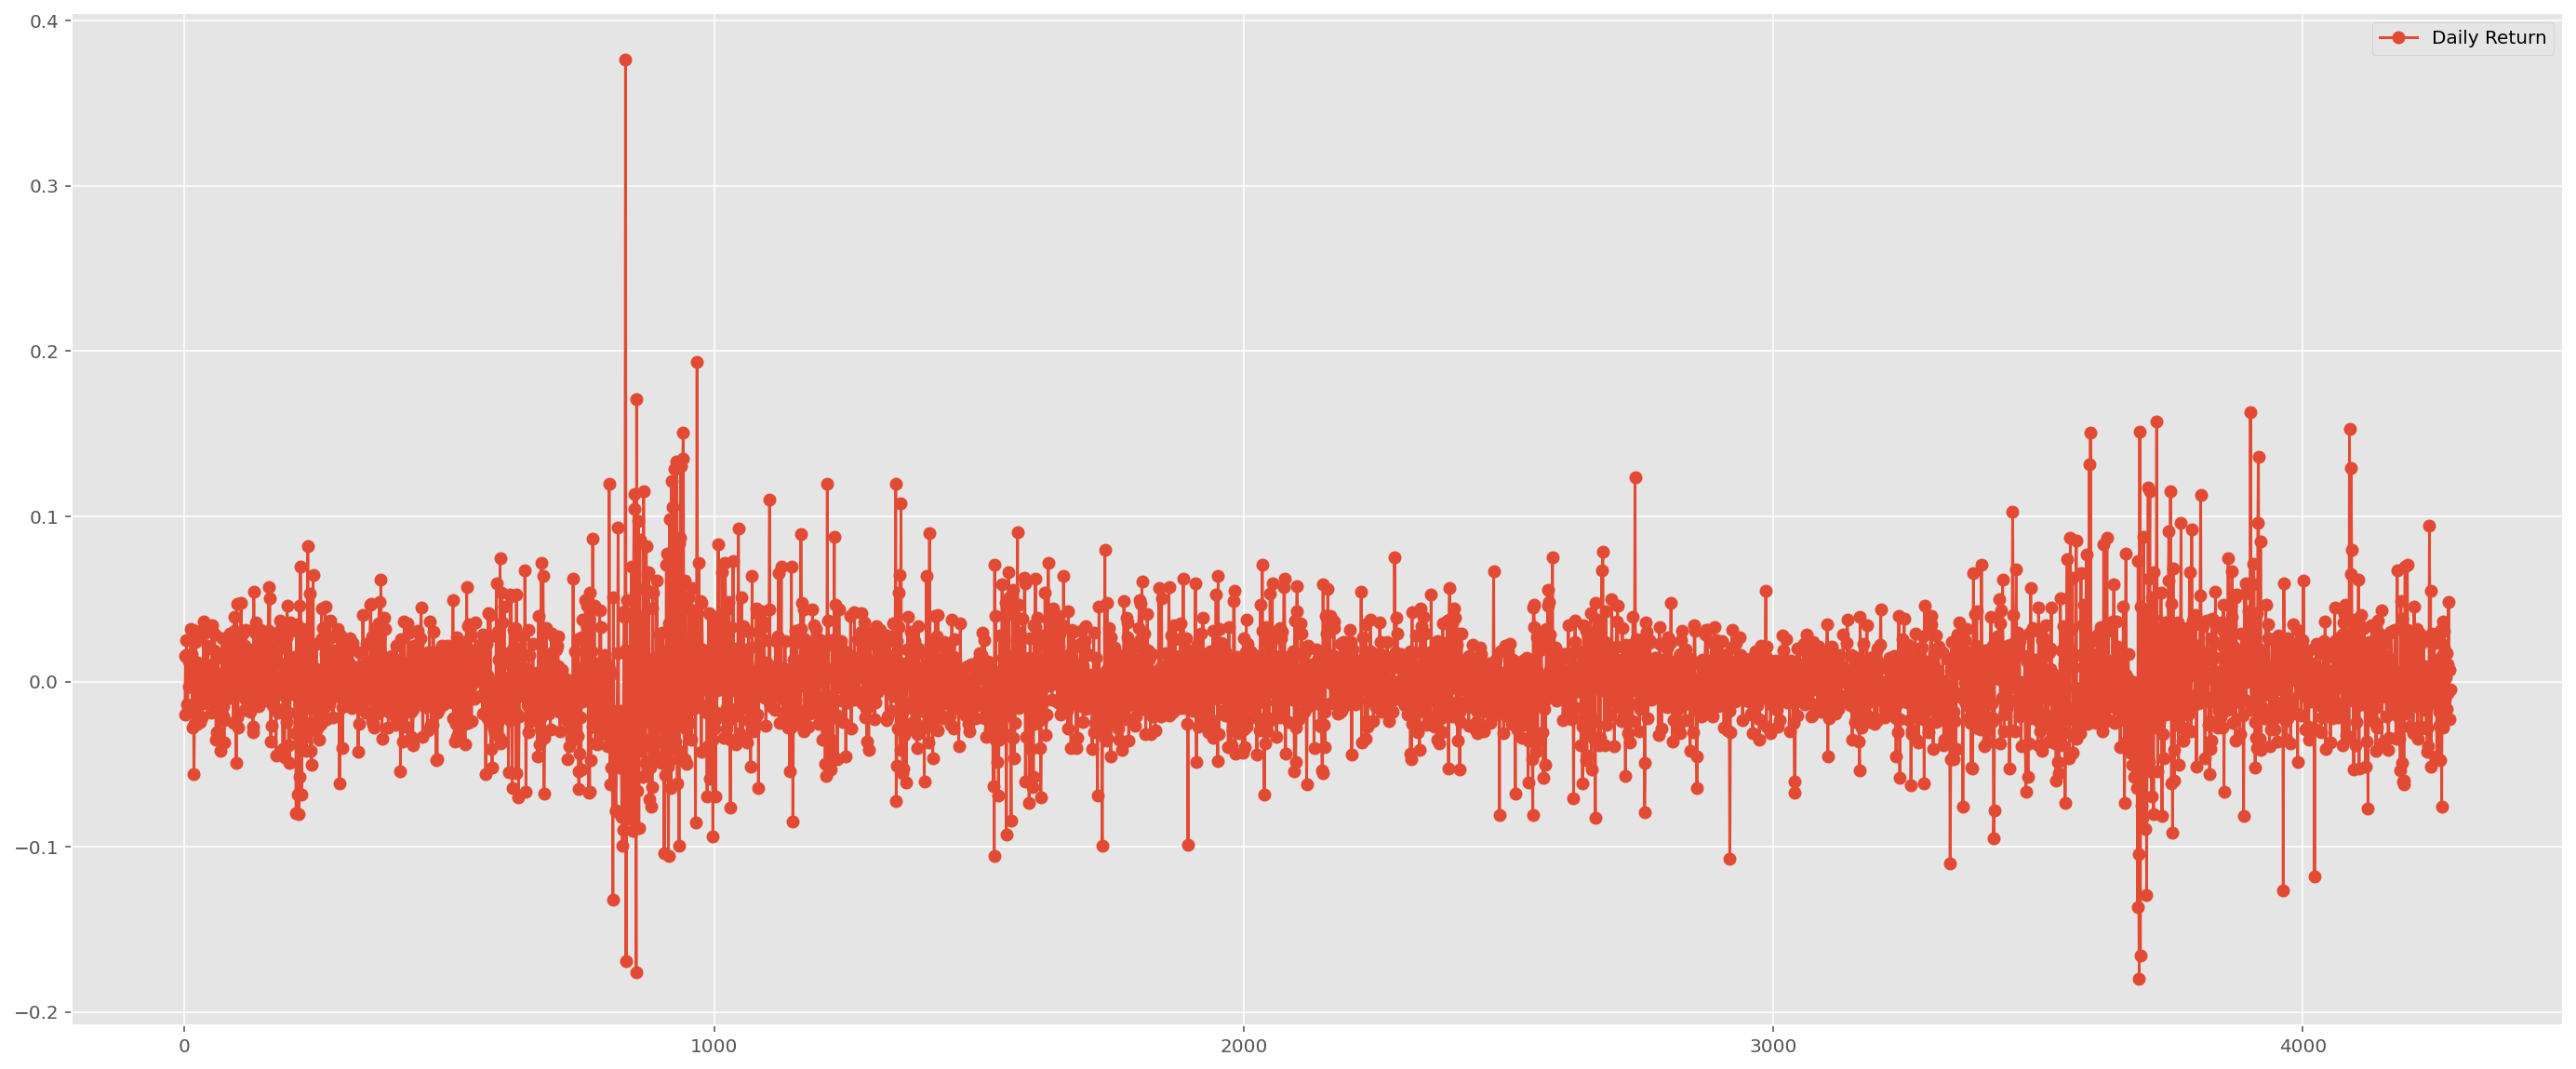

In [10]:
data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(24,10),legend=True,marker='o')
plt.show()

#Need A better graph, this gives nothing

In [11]:
data['Daily Return'].describe()

count    4278.000000
mean        0.000671
std         0.030194
min        -0.179845
25%        -0.014925
50%         0.000000
75%         0.014993
max         0.376471
Name: Daily Return, dtype: float64

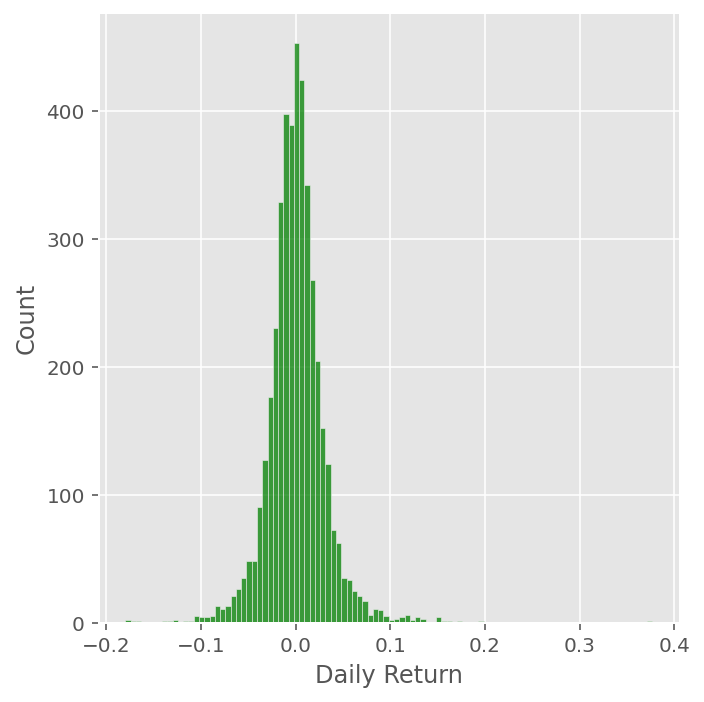

In [12]:
sns.displot(data['Daily Return'].dropna(), bins=100,color='green')
plt.show()

In [13]:
date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "Closing data"})
close2=pd.concat([date,close1],axis=1)
close2.head()

,Date,Closing data
0,2005-07-13,10.60
1,2005-07-14,10.39
2,2005-07-15,10.55
3,2005-07-18,10.72
4,2005-07-19,10.99


In [14]:
data.sort_index(axis=1,ascending=True)

,Adj Close,Close,Daily Return,Date,High,Low,MA for 10 days,MA for 100 days,MA for 50 days,Open,Volume
0,9.197446,10.600000,NaN,2005-07-13,10.640000,10.510000,NaN,NaN,NaN,10.620000,136500
1,9.015231,10.390000,-0.019811,2005-07-14,10.500000,10.330000,NaN,NaN,NaN,10.500000,136000
2,9.154059,10.550000,0.015399,2005-07-15,10.650000,10.500000,NaN,NaN,NaN,10.500000,158700
3,9.301566,10.720000,0.016114,2005-07-18,10.740000,10.660000,NaN,NaN,NaN,10.720000,88000
4,9.535840,10.990000,0.025187,2005-07-19,11.030000,10.800000,NaN,NaN,NaN,10.800000,128000
...,...,...,...,...,...,...,...,...,...,...,...
4274,26.420000,26.420000,0.010712,2022-07-06,26.570000,26.129999,26.159,27.9272,26.8420,26.180000,623700
4275,27.700001,27.700001,0.048448,2022-07-07,27.879999,27.200001,26.393,27.8706,26.8366,27.200001,715700
4276,27.900000,27.900000,0.007220,2022-07-08,28.090000,27.690001,26.595,27.8276,26.8412,27.750000,355300
4277,27.260000,27.260000,-0.022939,2022-07-11,27.540001,27.219999,26.654,27.7891,26.8314,27.450001,341700


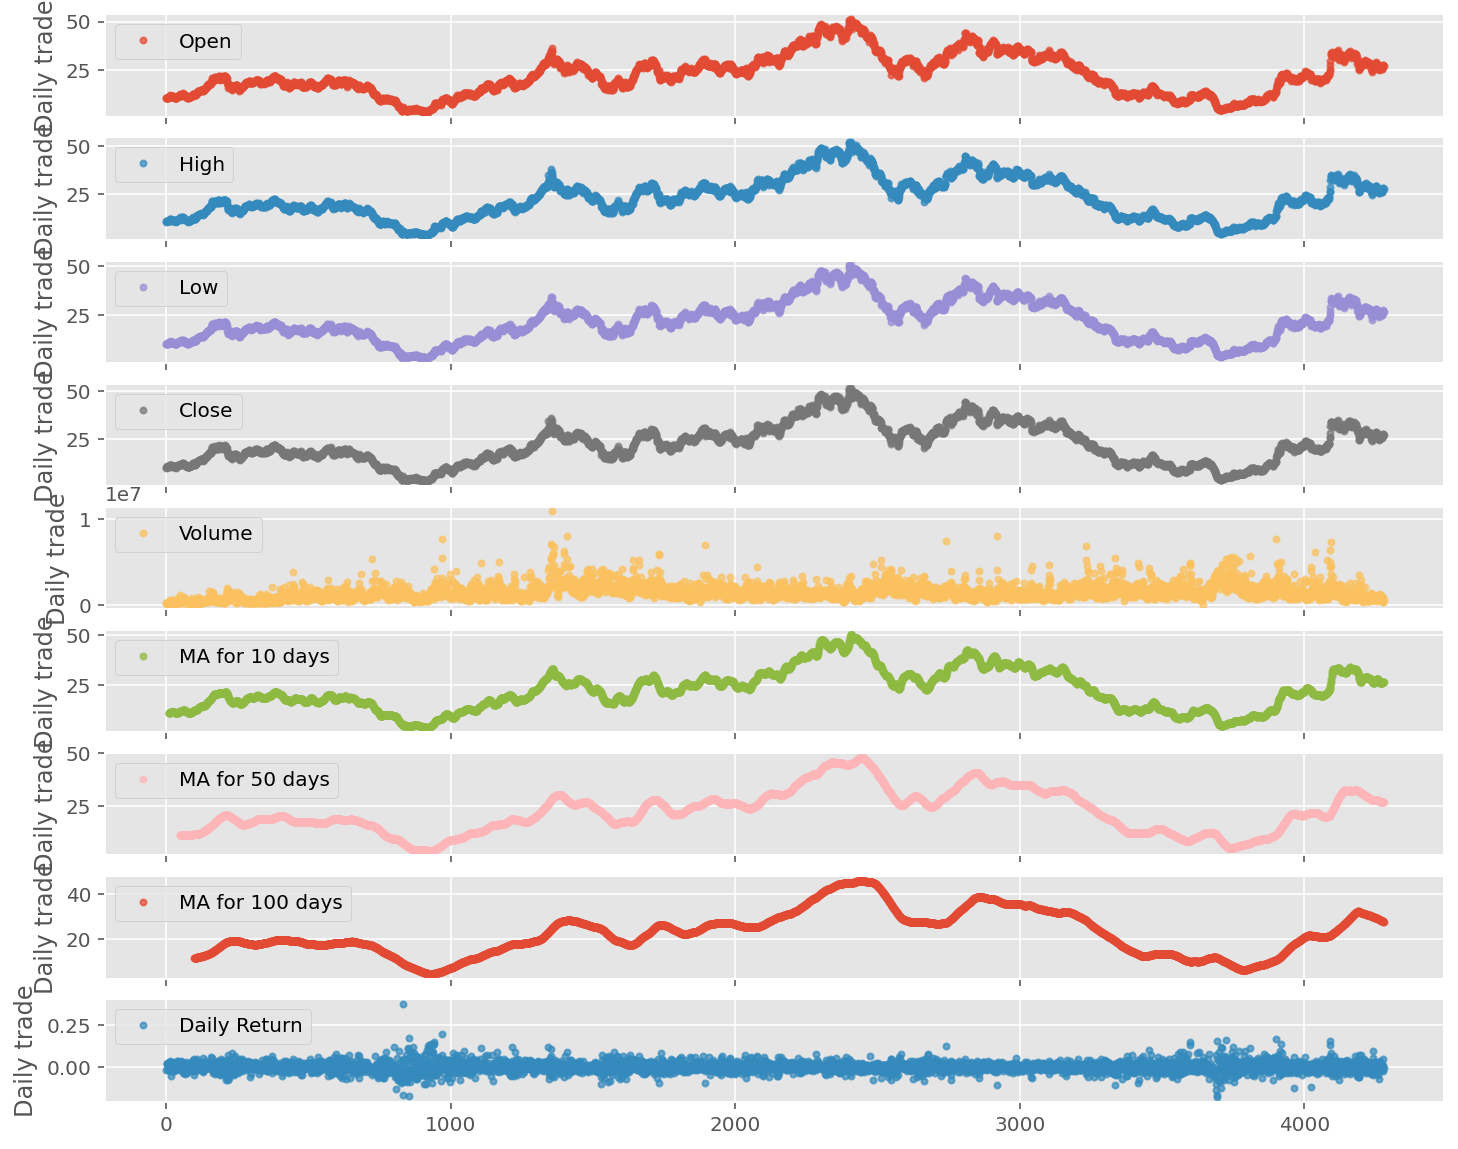

In [15]:
cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(12, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date       Open       High        Low      Close  Adj Close  \
0     2005-07-13  10.620000  10.640000  10.510000  10.600000   9.197446   
1     2005-07-14  10.500000  10.500000  10.330000  10.390000   9.015231   
2     2005-07-15  10.500000  10.650000  10.500000  10.550000   9.154059   
3     2005-07-18  10.720000  10.740000  10.660000  10.720000   9.301566   
4     2005-07-19  10.800000  11.030000  10.800000  10.990000   9.535840   
...          ...        ...        ...        ...        ...        ...   
4274  2022-07-06  26.180000  26.570000  26.129999  26.420000  26.420000   
4275  2022-07-07  27.200001  27.879999  27.200001  27.700001  27.700001   
4276  2022-07-08  27.750000  28.090000  27.690001  27.900000  27.900000   
4277  2022-07-11  27.450001  27.540001  27.219999  27.260000  27.260000   
4278  2022-07-12  26.940001  27.420000  26.860001  27.129999  27.129999   

      Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0     136500         

,count,mean,std,min,25%,50%,75%,max
Open,4279.0,2.237445e+01,10.299331,3.170000,14.695000,2.099000e+01,2.935500e+01,5.126000e+01
High,4279.0,2.261316e+01,10.374618,3.410000,14.900000,2.123000e+01,2.972000e+01,5.180000e+01
Low,4279.0,2.210889e+01,10.228782,3.050000,14.505000,2.079000e+01,2.910000e+01,5.065000e+01
Close,4279.0,2.236894e+01,10.297576,3.140000,14.725000,2.103000e+01,2.940500e+01,5.147000e+01
Adj Close,4279.0,2.180599e+01,10.523917,2.907577,13.620653,2.040992e+01,2.913283e+01,5.144851e+01
Volume,4279.0,1.477393e+06,939806.962446,0.000000,859950.000000,1.268200e+06,1.866100e+06,1.085910e+07
MA for 10 days,4270.0,2.237635e+01,10.272470,3.431000,14.929250,2.105700e+01,2.942575e+01,5.049200e+01
MA for 50 days,4230.0,2.240954e+01,10.160409,3.923000,14.842600,2.094870e+01,2.936840e+01,4.794400e+01
MA for 100 days,4180.0,2.244370e+01,10.007586,4.185200,14.874300,2.111810e+01,2.856793e+01,4.625290e+01
Daily Return,4278.0,6.706601e-04,0.030194,-0.179845,-0.014925,0.000000e+00,1.499347e-02,3.764706e-01


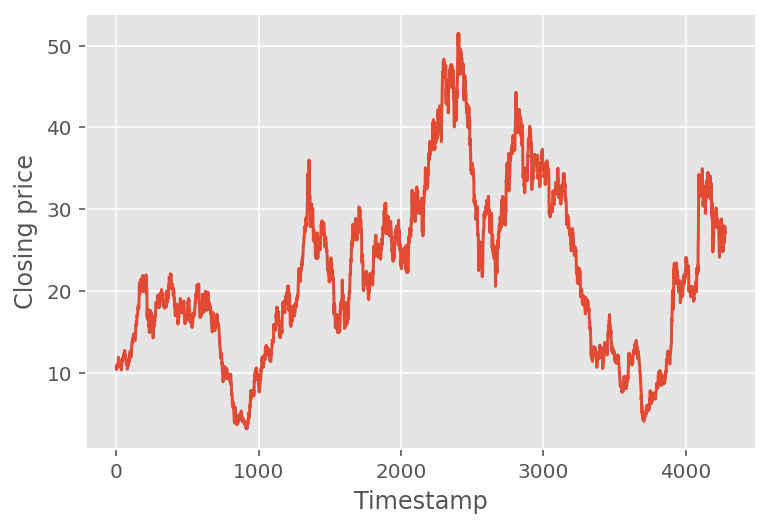

In [16]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [17]:
from sklearn.model_selection import train_test_split
len(df)

4279

The data has been analysed but it must be converted into data of shape \[100,1\] to make it easier for CNN to train on. Else it won't select necessary features and the model will fail


In [18]:
#--------------------------------------------------------------
X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))
#=================================================================
#Ye kya h?

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

3341
836


TRAINING PART This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers



In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

2023-03-16 09:40:25.619638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-03-16 09:40:26.135131: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-16 09:40:26.156758: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-16 09:40:26.156779: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2023-03-16 09:40:30.751891: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-16 09:40:30.752729: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-16 09:40:30.752749: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


2023-03-16 09:40:38.250263: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-16 09:40:38.250294: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-16 09:40:38.250312: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (project-9363a4a3-3b83-47b8-af50-d4419d41307a): /proc/driver/nvidia/version does not exist
2023-03-16 09:40:38.250632: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

In [22]:

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40


 1/84 [..............................] - ETA: 24:34 - loss: 0.1883 - mse: 0.1883 - mae: 0.3328

 2/84 [..............................] - ETA: 8s - loss: 0.1471 - mse: 0.1471 - mae: 0.2963   

 3/84 [>.............................] - ETA: 8s - loss: 0.1673 - mse: 0.1673 - mae: 0.3100

 4/84 [>.............................] - ETA: 8s - loss: 0.1816 - mse: 0.1816 - mae: 0.3144

 5/84 [>.............................] - ETA: 8s - loss: 0.1803 - mse: 0.1803 - mae: 0.3133

 6/84 [=>............................] - ETA: 7s - loss: 0.1775 - mse: 0.1775 - mae: 0.3085

 7/84 [=>............................] - ETA: 8s - loss: 0.1683 - mse: 0.1683 - mae: 0.3022

 8/84 [=>............................] - ETA: 8s - loss: 0.1573 - mse: 0.1573 - mae: 0.2938

 9/84 [==>...........................] - ETA: 8s - loss: 0.1451 - mse: 0.1451 - mae: 0.2791

11/84 [==>...........................] - ETA: 7s - loss: 0.1299 - mse: 0.1299 - mae: 0.2610

12/84 [===>..........................] - ETA: 7s - loss: 0.1251 - mse: 0.1251 - mae: 0.2546

13/84 [===>..........................] - ETA: 7s - loss: 0.1220 - mse: 0.1220 - mae: 0.2506

14/84 [====>.........................] - ETA: 7s - loss: 0.1200 - mse: 0.1200 - mae: 0.2478

15/84 [====>.........................] - ETA: 6s - loss: 0.1164 - mse: 0.1164 - mae: 0.2436

16/84 [====>.........................] - ETA: 6s - loss: 0.1121 - mse: 0.1121 - mae: 0.2378

17/84 [=====>........................] - ETA: 6s - loss: 0.1065 - mse: 0.1065 - mae: 0.2298

18/84 [=====>........................] - ETA: 6s - loss: 0.1030 - mse: 0.1030 - mae: 0.2251

19/84 [=====>........................] - ETA: 6s - loss: 0.1004 - mse: 0.1004 - mae: 0.2219

20/84 [======>.......................] - ETA: 6s - loss: 0.0967 - mse: 0.0967 - mae: 0.2174

21/84 [======>.......................] - ETA: 6s - loss: 0.0941 - mse: 0.0941 - mae: 0.2146

22/84 [======>.......................] - ETA: 6s - loss: 0.0910 - mse: 0.0910 - mae: 0.2108

23/84 [=======>......................] - ETA: 6s - loss: 0.0898 - mse: 0.0898 - mae: 0.2092

24/84 [=======>......................] - ETA: 6s - loss: 0.0867 - mse: 0.0867 - mae: 0.2046

25/84 [=======>......................] - ETA: 5s - loss: 0.0847 - mse: 0.0847 - mae: 0.2020

26/84 [========>.....................] - ETA: 5s - loss: 0.0823 - mse: 0.0823 - mae: 0.1989

27/84 [========>.....................] - ETA: 5s - loss: 0.0799 - mse: 0.0799 - mae: 0.1954

28/84 [=========>....................] - ETA: 5s - loss: 0.0785 - mse: 0.0785 - mae: 0.1931

29/84 [=========>....................] - ETA: 5s - loss: 0.0765 - mse: 0.0765 - mae: 0.1901

30/84 [=========>....................] - ETA: 5s - loss: 0.0748 - mse: 0.0748 - mae: 0.1879

31/84 [==========>...................] - ETA: 5s - loss: 0.0737 - mse: 0.0737 - mae: 0.1865

32/84 [==========>...................] - ETA: 5s - loss: 0.0726 - mse: 0.0726 - mae: 0.1847

33/84 [==========>...................] - ETA: 5s - loss: 0.0714 - mse: 0.0714 - mae: 0.1831

34/84 [===========>..................] - ETA: 5s - loss: 0.0702 - mse: 0.0702 - mae: 0.1811

35/84 [===========>..................] - ETA: 5s - loss: 0.0692 - mse: 0.0692 - mae: 0.1795

36/84 [===========>..................] - ETA: 4s - loss: 0.0679 - mse: 0.0679 - mae: 0.1777

37/84 [============>.................] - ETA: 4s - loss: 0.0670 - mse: 0.0670 - mae: 0.1767

38/84 [============>.................] - ETA: 4s - loss: 0.0658 - mse: 0.0658 - mae: 0.1749

39/84 [============>.................] - ETA: 4s - loss: 0.0647 - mse: 0.0647 - mae: 0.1734

40/84 [=============>................] - ETA: 4s - loss: 0.0635 - mse: 0.0635 - mae: 0.1713

41/84 [=============>................] - ETA: 4s - loss: 0.0626 - mse: 0.0626 - mae: 0.1703

42/84 [==============>...............] - ETA: 4s - loss: 0.0619 - mse: 0.0619 - mae: 0.1695

43/84 [==============>...............] - ETA: 4s - loss: 0.0609 - mse: 0.0609 - mae: 0.1681

44/84 [==============>...............] - ETA: 4s - loss: 0.0601 - mse: 0.0601 - mae: 0.1669

45/84 [===============>..............] - ETA: 3s - loss: 0.0592 - mse: 0.0592 - mae: 0.1657

46/84 [===============>..............] - ETA: 3s - loss: 0.0585 - mse: 0.0585 - mae: 0.1645

47/84 [===============>..............] - ETA: 3s - loss: 0.0577 - mse: 0.0577 - mae: 0.1634

48/84 [================>.............] - ETA: 3s - loss: 0.0574 - mse: 0.0574 - mae: 0.1632

49/84 [================>.............] - ETA: 3s - loss: 0.0569 - mse: 0.0569 - mae: 0.1623

50/84 [================>.............] - ETA: 3s - loss: 0.0563 - mse: 0.0563 - mae: 0.1613

51/84 [=================>............] - ETA: 3s - loss: 0.0556 - mse: 0.0556 - mae: 0.1602

52/84 [=================>............] - ETA: 3s - loss: 0.0548 - mse: 0.0548 - mae: 0.1590

53/84 [=================>............] - ETA: 3s - loss: 0.0543 - mse: 0.0543 - mae: 0.1581

54/84 [==================>...........] - ETA: 3s - loss: 0.0541 - mse: 0.0541 - mae: 0.1577

55/84 [==================>...........] - ETA: 3s - loss: 0.0534 - mse: 0.0534 - mae: 0.1567

56/84 [===================>..........] - ETA: 3s - loss: 0.0528 - mse: 0.0528 - mae: 0.1557

57/84 [===================>..........] - ETA: 2s - loss: 0.0528 - mse: 0.0528 - mae: 0.1552

58/84 [===================>..........] - ETA: 2s - loss: 0.0521 - mse: 0.0521 - mae: 0.1541

59/84 [====================>.........] - ETA: 2s - loss: 0.0514 - mse: 0.0514 - mae: 0.1531

60/84 [====================>.........] - ETA: 2s - loss: 0.0509 - mse: 0.0509 - mae: 0.1526

61/84 [====================>.........] - ETA: 2s - loss: 0.0507 - mse: 0.0507 - mae: 0.1524

62/84 [=====================>........] - ETA: 2s - loss: 0.0503 - mse: 0.0503 - mae: 0.1518

63/84 [=====================>........] - ETA: 2s - loss: 0.0500 - mse: 0.0500 - mae: 0.1516

64/84 [=====================>........] - ETA: 2s - loss: 0.0496 - mse: 0.0496 - mae: 0.1509

65/84 [======================>.......] - ETA: 2s - loss: 0.0491 - mse: 0.0491 - mae: 0.1501

66/84 [======================>.......] - ETA: 1s - loss: 0.0488 - mse: 0.0488 - mae: 0.1496

67/84 [======================>.......] - ETA: 1s - loss: 0.0485 - mse: 0.0485 - mae: 0.1489

68/84 [=======================>......] - ETA: 1s - loss: 0.0483 - mse: 0.0483 - mae: 0.1486

69/84 [=======================>......] - ETA: 1s - loss: 0.0481 - mse: 0.0481 - mae: 0.1483

70/84 [========================>.....] - ETA: 1s - loss: 0.0477 - mse: 0.0477 - mae: 0.1475

71/84 [========================>.....] - ETA: 1s - loss: 0.0474 - mse: 0.0474 - mae: 0.1473

72/84 [========================>.....] - ETA: 1s - loss: 0.0470 - mse: 0.0470 - mae: 0.1467

73/84 [=========================>....] - ETA: 1s - loss: 0.0468 - mse: 0.0468 - mae: 0.1465

74/84 [=========================>....] - ETA: 1s - loss: 0.0466 - mse: 0.0466 - mae: 0.1460

75/84 [=========================>....] - ETA: 0s - loss: 0.0463 - mse: 0.0463 - mae: 0.1454

76/84 [==========================>...] - ETA: 0s - loss: 0.0459 - mse: 0.0459 - mae: 0.1446

77/84 [==========================>...] - ETA: 0s - loss: 0.0458 - mse: 0.0458 - mae: 0.1444

78/84 [==========================>...] - ETA: 0s - loss: 0.0454 - mse: 0.0454 - mae: 0.1437

79/84 [===========================>..] - ETA: 0s - loss: 0.0451 - mse: 0.0451 - mae: 0.1432

80/84 [===========================>..] - ETA: 0s - loss: 0.0450 - mse: 0.0450 - mae: 0.1429

81/84 [===========================>..] - ETA: 0s - loss: 0.0446 - mse: 0.0446 - mae: 0.1421

82/84 [============================>.] - ETA: 0s - loss: 0.0444 - mse: 0.0444 - mae: 0.1418

83/84 [============================>.] - ETA: 0s - loss: 0.0441 - mse: 0.0441 - mae: 0.1412

84/84 [==============================] - ETA: 0s - loss: 0.0441 - mse: 0.0441 - mae: 0.1412

84/84 [==============================] - 31s 156ms/step - loss: 0.0441 - mse: 0.0441 - mae: 0.1412 - val_loss: 0.0174 - val_mse: 0.0174 - val_mae: 0.0920


Epoch 2/40


 1/84 [..............................] - ETA: 14s - loss: 0.0169 - mse: 0.0169 - mae: 0.0985

 2/84 [..............................] - ETA: 8s - loss: 0.0229 - mse: 0.0229 - mae: 0.1058 

 3/84 [>.............................] - ETA: 8s - loss: 0.0184 - mse: 0.0184 - mae: 0.0958

 4/84 [>.............................] - ETA: 10s - loss: 0.0221 - mse: 0.0221 - mae: 0.1050

 5/84 [>.............................] - ETA: 11s - loss: 0.0207 - mse: 0.0207 - mae: 0.1013

 6/84 [=>............................] - ETA: 12s - loss: 0.0209 - mse: 0.0209 - mae: 0.1000

 7/84 [=>............................] - ETA: 11s - loss: 0.0214 - mse: 0.0214 - mae: 0.1006

 8/84 [=>............................] - ETA: 10s - loss: 0.0226 - mse: 0.0226 - mae: 0.1017

 9/84 [==>...........................] - ETA: 10s - loss: 0.0228 - mse: 0.0228 - mae: 0.1017

10/84 [==>...........................] - ETA: 9s - loss: 0.0228 - mse: 0.0228 - mae: 0.1032 

11/84 [==>...........................] - ETA: 9s - loss: 0.0234 - mse: 0.0234 - mae: 0.1039

12/84 [===>..........................] - ETA: 9s - loss: 0.0223 - mse: 0.0223 - mae: 0.1024

13/84 [===>..........................] - ETA: 9s - loss: 0.0222 - mse: 0.0222 - mae: 0.1015

14/84 [====>.........................] - ETA: 9s - loss: 0.0214 - mse: 0.0214 - mae: 0.1006

15/84 [====>.........................] - ETA: 8s - loss: 0.0213 - mse: 0.0213 - mae: 0.1007

17/84 [=====>........................] - ETA: 8s - loss: 0.0211 - mse: 0.0211 - mae: 0.1008

18/84 [=====>........................] - ETA: 7s - loss: 0.0213 - mse: 0.0213 - mae: 0.1010

19/84 [=====>........................] - ETA: 7s - loss: 0.0210 - mse: 0.0210 - mae: 0.1003

20/84 [======>.......................] - ETA: 7s - loss: 0.0205 - mse: 0.0205 - mae: 0.0994

21/84 [======>.......................] - ETA: 7s - loss: 0.0201 - mse: 0.0201 - mae: 0.0989

22/84 [======>.......................] - ETA: 7s - loss: 0.0200 - mse: 0.0200 - mae: 0.0984

23/84 [=======>......................] - ETA: 6s - loss: 0.0199 - mse: 0.0199 - mae: 0.0979

24/84 [=======>......................] - ETA: 6s - loss: 0.0199 - mse: 0.0199 - mae: 0.0978

25/84 [=======>......................] - ETA: 6s - loss: 0.0195 - mse: 0.0195 - mae: 0.0971

26/84 [========>.....................] - ETA: 6s - loss: 0.0199 - mse: 0.0199 - mae: 0.0975

28/84 [=========>....................] - ETA: 6s - loss: 0.0193 - mse: 0.0193 - mae: 0.0960

29/84 [=========>....................] - ETA: 6s - loss: 0.0196 - mse: 0.0196 - mae: 0.0964

30/84 [=========>....................] - ETA: 5s - loss: 0.0195 - mse: 0.0195 - mae: 0.0963

31/84 [==========>...................] - ETA: 6s - loss: 0.0195 - mse: 0.0195 - mae: 0.0964

32/84 [==========>...................] - ETA: 5s - loss: 0.0194 - mse: 0.0194 - mae: 0.0963

33/84 [==========>...................] - ETA: 5s - loss: 0.0194 - mse: 0.0194 - mae: 0.0958

34/84 [===========>..................] - ETA: 5s - loss: 0.0194 - mse: 0.0194 - mae: 0.0961

35/84 [===========>..................] - ETA: 5s - loss: 0.0193 - mse: 0.0193 - mae: 0.0958

36/84 [===========>..................] - ETA: 5s - loss: 0.0194 - mse: 0.0194 - mae: 0.0963

37/84 [============>.................] - ETA: 5s - loss: 0.0193 - mse: 0.0193 - mae: 0.0960

38/84 [============>.................] - ETA: 5s - loss: 0.0191 - mse: 0.0191 - mae: 0.0956

39/84 [============>.................] - ETA: 4s - loss: 0.0190 - mse: 0.0190 - mae: 0.0954

40/84 [=============>................] - ETA: 4s - loss: 0.0187 - mse: 0.0187 - mae: 0.0948

41/84 [=============>................] - ETA: 4s - loss: 0.0193 - mse: 0.0193 - mae: 0.0957

42/84 [==============>...............] - ETA: 4s - loss: 0.0191 - mse: 0.0191 - mae: 0.0955

43/84 [==============>...............] - ETA: 4s - loss: 0.0189 - mse: 0.0189 - mae: 0.0949

44/84 [==============>...............] - ETA: 4s - loss: 0.0193 - mse: 0.0193 - mae: 0.0958

45/84 [===============>..............] - ETA: 4s - loss: 0.0195 - mse: 0.0195 - mae: 0.0961

46/84 [===============>..............] - ETA: 4s - loss: 0.0196 - mse: 0.0196 - mae: 0.0965

47/84 [===============>..............] - ETA: 4s - loss: 0.0197 - mse: 0.0197 - mae: 0.0967

48/84 [================>.............] - ETA: 4s - loss: 0.0198 - mse: 0.0198 - mae: 0.0967

49/84 [================>.............] - ETA: 4s - loss: 0.0200 - mse: 0.0200 - mae: 0.0967

51/84 [=================>............] - ETA: 3s - loss: 0.0197 - mse: 0.0197 - mae: 0.0963

52/84 [=================>............] - ETA: 3s - loss: 0.0195 - mse: 0.0195 - mae: 0.0961

53/84 [=================>............] - ETA: 3s - loss: 0.0194 - mse: 0.0194 - mae: 0.0960

54/84 [==================>...........] - ETA: 3s - loss: 0.0193 - mse: 0.0193 - mae: 0.0960

55/84 [==================>...........] - ETA: 3s - loss: 0.0192 - mse: 0.0192 - mae: 0.0958

56/84 [===================>..........] - ETA: 3s - loss: 0.0193 - mse: 0.0193 - mae: 0.0962

57/84 [===================>..........] - ETA: 2s - loss: 0.0192 - mse: 0.0192 - mae: 0.0959

58/84 [===================>..........] - ETA: 2s - loss: 0.0192 - mse: 0.0192 - mae: 0.0959

59/84 [====================>.........] - ETA: 2s - loss: 0.0192 - mse: 0.0192 - mae: 0.0962

60/84 [====================>.........] - ETA: 2s - loss: 0.0191 - mse: 0.0191 - mae: 0.0961

62/84 [=====================>........] - ETA: 2s - loss: 0.0191 - mse: 0.0191 - mae: 0.0963

63/84 [=====================>........] - ETA: 2s - loss: 0.0191 - mse: 0.0191 - mae: 0.0964

64/84 [=====================>........] - ETA: 2s - loss: 0.0191 - mse: 0.0191 - mae: 0.0964

65/84 [======================>.......] - ETA: 2s - loss: 0.0192 - mse: 0.0192 - mae: 0.0967

66/84 [======================>.......] - ETA: 2s - loss: 0.0191 - mse: 0.0191 - mae: 0.0967

67/84 [======================>.......] - ETA: 1s - loss: 0.0191 - mse: 0.0191 - mae: 0.0971

68/84 [=======================>......] - ETA: 1s - loss: 0.0191 - mse: 0.0191 - mae: 0.0971

69/84 [=======================>......] - ETA: 1s - loss: 0.0190 - mse: 0.0190 - mae: 0.0969

70/84 [========================>.....] - ETA: 1s - loss: 0.0189 - mse: 0.0189 - mae: 0.0966

71/84 [========================>.....] - ETA: 1s - loss: 0.0189 - mse: 0.0189 - mae: 0.0965

72/84 [========================>.....] - ETA: 1s - loss: 0.0188 - mse: 0.0188 - mae: 0.0964

73/84 [=========================>....] - ETA: 1s - loss: 0.0188 - mse: 0.0188 - mae: 0.0964

74/84 [=========================>....] - ETA: 1s - loss: 0.0187 - mse: 0.0187 - mae: 0.0963

75/84 [=========================>....] - ETA: 1s - loss: 0.0188 - mse: 0.0188 - mae: 0.0965

76/84 [==========================>...] - ETA: 0s - loss: 0.0187 - mse: 0.0187 - mae: 0.0963

77/84 [==========================>...] - ETA: 0s - loss: 0.0188 - mse: 0.0188 - mae: 0.0964

78/84 [==========================>...] - ETA: 0s - loss: 0.0187 - mse: 0.0187 - mae: 0.0964

79/84 [===========================>..] - ETA: 0s - loss: 0.0188 - mse: 0.0188 - mae: 0.0966

80/84 [===========================>..] - ETA: 0s - loss: 0.0187 - mse: 0.0187 - mae: 0.0964

81/84 [===========================>..] - ETA: 0s - loss: 0.0186 - mse: 0.0186 - mae: 0.0962

82/84 [============================>.] - ETA: 0s - loss: 0.0187 - mse: 0.0187 - mae: 0.0963

83/84 [============================>.] - ETA: 0s - loss: 0.0186 - mse: 0.0186 - mae: 0.0960

84/84 [==============================] - ETA: 0s - loss: 0.0185 - mse: 0.0185 - mae: 0.0958

84/84 [==============================] - 10s 119ms/step - loss: 0.0185 - mse: 0.0185 - mae: 0.0958 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0785


Epoch 3/40


 1/84 [..............................] - ETA: 9s - loss: 0.0211 - mse: 0.0211 - mae: 0.1040

 2/84 [..............................] - ETA: 15s - loss: 0.0194 - mse: 0.0194 - mae: 0.0957

 3/84 [>.............................] - ETA: 12s - loss: 0.0192 - mse: 0.0192 - mae: 0.0927

 4/84 [>.............................] - ETA: 13s - loss: 0.0210 - mse: 0.0210 - mae: 0.0925

 5/84 [>.............................] - ETA: 11s - loss: 0.0185 - mse: 0.0185 - mae: 0.0879

 6/84 [=>............................] - ETA: 10s - loss: 0.0178 - mse: 0.0178 - mae: 0.0891

 7/84 [=>............................] - ETA: 10s - loss: 0.0178 - mse: 0.0178 - mae: 0.0911

 8/84 [=>............................] - ETA: 9s - loss: 0.0193 - mse: 0.0193 - mae: 0.0933 

 9/84 [==>...........................] - ETA: 11s - loss: 0.0185 - mse: 0.0185 - mae: 0.0925

10/84 [==>...........................] - ETA: 11s - loss: 0.0195 - mse: 0.0195 - mae: 0.0944

11/84 [==>...........................] - ETA: 10s - loss: 0.0187 - mse: 0.0187 - mae: 0.0920

12/84 [===>..........................] - ETA: 10s - loss: 0.0193 - mse: 0.0193 - mae: 0.0933

13/84 [===>..........................] - ETA: 10s - loss: 0.0194 - mse: 0.0194 - mae: 0.0945

14/84 [====>.........................] - ETA: 11s - loss: 0.0187 - mse: 0.0187 - mae: 0.0932

15/84 [====>.........................] - ETA: 10s - loss: 0.0189 - mse: 0.0189 - mae: 0.0936

16/84 [====>.........................] - ETA: 10s - loss: 0.0186 - mse: 0.0186 - mae: 0.0936

17/84 [=====>........................] - ETA: 10s - loss: 0.0184 - mse: 0.0184 - mae: 0.0933

18/84 [=====>........................] - ETA: 10s - loss: 0.0187 - mse: 0.0187 - mae: 0.0930

19/84 [=====>........................] - ETA: 10s - loss: 0.0181 - mse: 0.0181 - mae: 0.0917

20/84 [======>.......................] - ETA: 9s - loss: 0.0174 - mse: 0.0174 - mae: 0.0899 

21/84 [======>.......................] - ETA: 9s - loss: 0.0177 - mse: 0.0177 - mae: 0.0902

22/84 [======>.......................] - ETA: 9s - loss: 0.0176 - mse: 0.0176 - mae: 0.0900

23/84 [=======>......................] - ETA: 8s - loss: 0.0175 - mse: 0.0175 - mae: 0.0895

24/84 [=======>......................] - ETA: 8s - loss: 0.0173 - mse: 0.0173 - mae: 0.0893

26/84 [========>.....................] - ETA: 8s - loss: 0.0172 - mse: 0.0172 - mae: 0.0893

27/84 [========>.....................] - ETA: 8s - loss: 0.0170 - mse: 0.0170 - mae: 0.0892

28/84 [=========>....................] - ETA: 7s - loss: 0.0173 - mse: 0.0173 - mae: 0.0902

29/84 [=========>....................] - ETA: 7s - loss: 0.0170 - mse: 0.0170 - mae: 0.0896

30/84 [=========>....................] - ETA: 7s - loss: 0.0170 - mse: 0.0170 - mae: 0.0895

31/84 [==========>...................] - ETA: 7s - loss: 0.0167 - mse: 0.0167 - mae: 0.0889

32/84 [==========>...................] - ETA: 7s - loss: 0.0170 - mse: 0.0170 - mae: 0.0896

33/84 [==========>...................] - ETA: 6s - loss: 0.0168 - mse: 0.0168 - mae: 0.0894

34/84 [===========>..................] - ETA: 6s - loss: 0.0166 - mse: 0.0166 - mae: 0.0890

35/84 [===========>..................] - ETA: 6s - loss: 0.0164 - mse: 0.0164 - mae: 0.0887

36/84 [===========>..................] - ETA: 6s - loss: 0.0163 - mse: 0.0163 - mae: 0.0886

37/84 [============>.................] - ETA: 6s - loss: 0.0162 - mse: 0.0162 - mae: 0.0884

39/84 [============>.................] - ETA: 5s - loss: 0.0162 - mse: 0.0162 - mae: 0.0883

40/84 [=============>................] - ETA: 5s - loss: 0.0160 - mse: 0.0160 - mae: 0.0880

41/84 [=============>................] - ETA: 5s - loss: 0.0162 - mse: 0.0162 - mae: 0.0886

42/84 [==============>...............] - ETA: 5s - loss: 0.0162 - mse: 0.0162 - mae: 0.0885

43/84 [==============>...............] - ETA: 5s - loss: 0.0161 - mse: 0.0161 - mae: 0.0882

44/84 [==============>...............] - ETA: 5s - loss: 0.0161 - mse: 0.0161 - mae: 0.0882

45/84 [===============>..............] - ETA: 4s - loss: 0.0160 - mse: 0.0160 - mae: 0.0881

46/84 [===============>..............] - ETA: 4s - loss: 0.0161 - mse: 0.0161 - mae: 0.0885

47/84 [===============>..............] - ETA: 4s - loss: 0.0160 - mse: 0.0160 - mae: 0.0883

48/84 [================>.............] - ETA: 4s - loss: 0.0158 - mse: 0.0158 - mae: 0.0879

49/84 [================>.............] - ETA: 4s - loss: 0.0156 - mse: 0.0156 - mae: 0.0876

50/84 [================>.............] - ETA: 4s - loss: 0.0157 - mse: 0.0157 - mae: 0.0879

51/84 [=================>............] - ETA: 4s - loss: 0.0157 - mse: 0.0157 - mae: 0.0881

52/84 [=================>............] - ETA: 4s - loss: 0.0159 - mse: 0.0159 - mae: 0.0884

53/84 [=================>............] - ETA: 4s - loss: 0.0158 - mse: 0.0158 - mae: 0.0882

54/84 [==================>...........] - ETA: 3s - loss: 0.0156 - mse: 0.0156 - mae: 0.0878

55/84 [==================>...........] - ETA: 3s - loss: 0.0155 - mse: 0.0155 - mae: 0.0876

56/84 [===================>..........] - ETA: 3s - loss: 0.0155 - mse: 0.0155 - mae: 0.0876

57/84 [===================>..........] - ETA: 3s - loss: 0.0154 - mse: 0.0154 - mae: 0.0873

58/84 [===================>..........] - ETA: 3s - loss: 0.0153 - mse: 0.0153 - mae: 0.0872

59/84 [====================>.........] - ETA: 3s - loss: 0.0152 - mse: 0.0152 - mae: 0.0869

60/84 [====================>.........] - ETA: 3s - loss: 0.0151 - mse: 0.0151 - mae: 0.0868

61/84 [====================>.........] - ETA: 2s - loss: 0.0152 - mse: 0.0152 - mae: 0.0870

62/84 [=====================>........] - ETA: 2s - loss: 0.0152 - mse: 0.0152 - mae: 0.0872

63/84 [=====================>........] - ETA: 2s - loss: 0.0152 - mse: 0.0152 - mae: 0.0870

64/84 [=====================>........] - ETA: 2s - loss: 0.0152 - mse: 0.0152 - mae: 0.0872

65/84 [======================>.......] - ETA: 2s - loss: 0.0151 - mse: 0.0151 - mae: 0.0871

66/84 [======================>.......] - ETA: 2s - loss: 0.0151 - mse: 0.0151 - mae: 0.0873

67/84 [======================>.......] - ETA: 2s - loss: 0.0150 - mse: 0.0150 - mae: 0.0868

68/84 [=======================>......] - ETA: 2s - loss: 0.0149 - mse: 0.0149 - mae: 0.0865

69/84 [=======================>......] - ETA: 1s - loss: 0.0148 - mse: 0.0148 - mae: 0.0863

70/84 [========================>.....] - ETA: 1s - loss: 0.0147 - mse: 0.0147 - mae: 0.0860

71/84 [========================>.....] - ETA: 1s - loss: 0.0147 - mse: 0.0147 - mae: 0.0861

72/84 [========================>.....] - ETA: 1s - loss: 0.0147 - mse: 0.0147 - mae: 0.0862

73/84 [=========================>....] - ETA: 1s - loss: 0.0147 - mse: 0.0147 - mae: 0.0860

74/84 [=========================>....] - ETA: 1s - loss: 0.0146 - mse: 0.0146 - mae: 0.0861

75/84 [=========================>....] - ETA: 1s - loss: 0.0146 - mse: 0.0146 - mae: 0.0860

76/84 [==========================>...] - ETA: 1s - loss: 0.0146 - mse: 0.0146 - mae: 0.0861

77/84 [==========================>...] - ETA: 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0862

78/84 [==========================>...] - ETA: 0s - loss: 0.0146 - mse: 0.0146 - mae: 0.0863

79/84 [===========================>..] - ETA: 0s - loss: 0.0145 - mse: 0.0145 - mae: 0.0860

80/84 [===========================>..] - ETA: 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0856

82/84 [============================>.] - ETA: 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0858

83/84 [============================>.] - ETA: 0s - loss: 0.0143 - mse: 0.0143 - mae: 0.0857

84/84 [==============================] - ETA: 0s - loss: 0.0144 - mse: 0.0144 - mae: 0.0859

84/84 [==============================] - 11s 132ms/step - loss: 0.0144 - mse: 0.0144 - mae: 0.0859 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0729


Epoch 4/40


 1/84 [..............................] - ETA: 8s - loss: 0.0117 - mse: 0.0117 - mae: 0.0747

 2/84 [..............................] - ETA: 9s - loss: 0.0124 - mse: 0.0124 - mae: 0.0789

 3/84 [>.............................] - ETA: 8s - loss: 0.0114 - mse: 0.0114 - mae: 0.0757

 4/84 [>.............................] - ETA: 8s - loss: 0.0130 - mse: 0.0130 - mae: 0.0779

 5/84 [>.............................] - ETA: 9s - loss: 0.0132 - mse: 0.0132 - mae: 0.0802

 6/84 [=>............................] - ETA: 9s - loss: 0.0126 - mse: 0.0126 - mae: 0.0780

 7/84 [=>............................] - ETA: 8s - loss: 0.0151 - mse: 0.0151 - mae: 0.0823

 8/84 [=>............................] - ETA: 9s - loss: 0.0140 - mse: 0.0140 - mae: 0.0804

 9/84 [==>...........................] - ETA: 10s - loss: 0.0147 - mse: 0.0147 - mae: 0.0813

10/84 [==>...........................] - ETA: 10s - loss: 0.0153 - mse: 0.0153 - mae: 0.0841

11/84 [==>...........................] - ETA: 10s - loss: 0.0153 - mse: 0.0153 - mae: 0.0837

12/84 [===>..........................] - ETA: 10s - loss: 0.0147 - mse: 0.0147 - mae: 0.0831

13/84 [===>..........................] - ETA: 10s - loss: 0.0141 - mse: 0.0141 - mae: 0.0817

14/84 [====>.........................] - ETA: 10s - loss: 0.0139 - mse: 0.0139 - mae: 0.0815

15/84 [====>.........................] - ETA: 9s - loss: 0.0136 - mse: 0.0136 - mae: 0.0813 

16/84 [====>.........................] - ETA: 9s - loss: 0.0136 - mse: 0.0136 - mae: 0.0823

17/84 [=====>........................] - ETA: 9s - loss: 0.0133 - mse: 0.0133 - mae: 0.0814

18/84 [=====>........................] - ETA: 8s - loss: 0.0129 - mse: 0.0129 - mae: 0.0803

19/84 [=====>........................] - ETA: 8s - loss: 0.0136 - mse: 0.0136 - mae: 0.0820

20/84 [======>.......................] - ETA: 8s - loss: 0.0133 - mse: 0.0133 - mae: 0.0808

21/84 [======>.......................] - ETA: 8s - loss: 0.0130 - mse: 0.0130 - mae: 0.0803

22/84 [======>.......................] - ETA: 7s - loss: 0.0130 - mse: 0.0130 - mae: 0.0806

23/84 [=======>......................] - ETA: 7s - loss: 0.0132 - mse: 0.0132 - mae: 0.0805

24/84 [=======>......................] - ETA: 7s - loss: 0.0129 - mse: 0.0129 - mae: 0.0800

25/84 [=======>......................] - ETA: 7s - loss: 0.0127 - mse: 0.0127 - mae: 0.0792

26/84 [========>.....................] - ETA: 7s - loss: 0.0127 - mse: 0.0127 - mae: 0.0792

27/84 [========>.....................] - ETA: 7s - loss: 0.0129 - mse: 0.0129 - mae: 0.0799

28/84 [=========>....................] - ETA: 6s - loss: 0.0126 - mse: 0.0126 - mae: 0.0794

29/84 [=========>....................] - ETA: 6s - loss: 0.0126 - mse: 0.0126 - mae: 0.0796

30/84 [=========>....................] - ETA: 6s - loss: 0.0125 - mse: 0.0125 - mae: 0.0792

31/84 [==========>...................] - ETA: 6s - loss: 0.0124 - mse: 0.0124 - mae: 0.0793

32/84 [==========>...................] - ETA: 6s - loss: 0.0126 - mse: 0.0126 - mae: 0.0797

33/84 [==========>...................] - ETA: 6s - loss: 0.0124 - mse: 0.0124 - mae: 0.0794

34/84 [===========>..................] - ETA: 6s - loss: 0.0126 - mse: 0.0126 - mae: 0.0798

35/84 [===========>..................] - ETA: 6s - loss: 0.0125 - mse: 0.0125 - mae: 0.0796

36/84 [===========>..................] - ETA: 6s - loss: 0.0127 - mse: 0.0127 - mae: 0.0804

37/84 [============>.................] - ETA: 6s - loss: 0.0127 - mse: 0.0127 - mae: 0.0806

38/84 [============>.................] - ETA: 5s - loss: 0.0127 - mse: 0.0127 - mae: 0.0807

39/84 [============>.................] - ETA: 5s - loss: 0.0130 - mse: 0.0130 - mae: 0.0813

40/84 [=============>................] - ETA: 5s - loss: 0.0130 - mse: 0.0130 - mae: 0.0815

41/84 [=============>................] - ETA: 5s - loss: 0.0130 - mse: 0.0130 - mae: 0.0816

42/84 [==============>...............] - ETA: 5s - loss: 0.0129 - mse: 0.0129 - mae: 0.0813

43/84 [==============>...............] - ETA: 5s - loss: 0.0129 - mse: 0.0129 - mae: 0.0811

44/84 [==============>...............] - ETA: 5s - loss: 0.0132 - mse: 0.0132 - mae: 0.0817

45/84 [===============>..............] - ETA: 4s - loss: 0.0131 - mse: 0.0131 - mae: 0.0816

46/84 [===============>..............] - ETA: 4s - loss: 0.0130 - mse: 0.0130 - mae: 0.0815

47/84 [===============>..............] - ETA: 4s - loss: 0.0130 - mse: 0.0130 - mae: 0.0814

48/84 [================>.............] - ETA: 4s - loss: 0.0130 - mse: 0.0130 - mae: 0.0814

49/84 [================>.............] - ETA: 4s - loss: 0.0129 - mse: 0.0129 - mae: 0.0812

50/84 [================>.............] - ETA: 4s - loss: 0.0128 - mse: 0.0128 - mae: 0.0810

51/84 [=================>............] - ETA: 4s - loss: 0.0129 - mse: 0.0129 - mae: 0.0813

52/84 [=================>............] - ETA: 4s - loss: 0.0130 - mse: 0.0130 - mae: 0.0814

53/84 [=================>............] - ETA: 3s - loss: 0.0129 - mse: 0.0129 - mae: 0.0814

54/84 [==================>...........] - ETA: 3s - loss: 0.0132 - mse: 0.0132 - mae: 0.0819

55/84 [==================>...........] - ETA: 3s - loss: 0.0131 - mse: 0.0131 - mae: 0.0818

56/84 [===================>..........] - ETA: 3s - loss: 0.0130 - mse: 0.0130 - mae: 0.0816

57/84 [===================>..........] - ETA: 3s - loss: 0.0130 - mse: 0.0130 - mae: 0.0817

58/84 [===================>..........] - ETA: 3s - loss: 0.0131 - mse: 0.0131 - mae: 0.0817

59/84 [====================>.........] - ETA: 3s - loss: 0.0133 - mse: 0.0133 - mae: 0.0819

60/84 [====================>.........] - ETA: 3s - loss: 0.0132 - mse: 0.0132 - mae: 0.0818

61/84 [====================>.........] - ETA: 2s - loss: 0.0132 - mse: 0.0132 - mae: 0.0817

62/84 [=====================>........] - ETA: 2s - loss: 0.0131 - mse: 0.0131 - mae: 0.0815

63/84 [=====================>........] - ETA: 2s - loss: 0.0131 - mse: 0.0131 - mae: 0.0815

64/84 [=====================>........] - ETA: 2s - loss: 0.0132 - mse: 0.0132 - mae: 0.0818

65/84 [======================>.......] - ETA: 2s - loss: 0.0132 - mse: 0.0132 - mae: 0.0819

66/84 [======================>.......] - ETA: 2s - loss: 0.0130 - mse: 0.0130 - mae: 0.0817

67/84 [======================>.......] - ETA: 2s - loss: 0.0131 - mse: 0.0131 - mae: 0.0818

68/84 [=======================>......] - ETA: 2s - loss: 0.0131 - mse: 0.0131 - mae: 0.0817

69/84 [=======================>......] - ETA: 1s - loss: 0.0131 - mse: 0.0131 - mae: 0.0820

70/84 [========================>.....] - ETA: 1s - loss: 0.0130 - mse: 0.0130 - mae: 0.0818

71/84 [========================>.....] - ETA: 1s - loss: 0.0130 - mse: 0.0130 - mae: 0.0819

72/84 [========================>.....] - ETA: 1s - loss: 0.0129 - mse: 0.0129 - mae: 0.0817

73/84 [=========================>....] - ETA: 1s - loss: 0.0129 - mse: 0.0129 - mae: 0.0817

74/84 [=========================>....] - ETA: 1s - loss: 0.0129 - mse: 0.0129 - mae: 0.0816

75/84 [=========================>....] - ETA: 1s - loss: 0.0129 - mse: 0.0129 - mae: 0.0816

76/84 [==========================>...] - ETA: 1s - loss: 0.0129 - mse: 0.0129 - mae: 0.0815

77/84 [==========================>...] - ETA: 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0818

78/84 [==========================>...] - ETA: 0s - loss: 0.0129 - mse: 0.0129 - mae: 0.0816

79/84 [===========================>..] - ETA: 0s - loss: 0.0131 - mse: 0.0131 - mae: 0.0818

80/84 [===========================>..] - ETA: 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0816

81/84 [===========================>..] - ETA: 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0816

82/84 [============================>.] - ETA: 0s - loss: 0.0129 - mse: 0.0129 - mae: 0.0814

83/84 [============================>.] - ETA: 0s - loss: 0.0129 - mse: 0.0129 - mae: 0.0813

84/84 [==============================] - ETA: 0s - loss: 0.0129 - mse: 0.0129 - mae: 0.0813

84/84 [==============================] - 11s 134ms/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0813 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0809


Epoch 5/40


 1/84 [..............................] - ETA: 7s - loss: 0.0070 - mse: 0.0070 - mae: 0.0632

 2/84 [..............................] - ETA: 8s - loss: 0.0103 - mse: 0.0103 - mae: 0.0686

 3/84 [>.............................] - ETA: 8s - loss: 0.0100 - mse: 0.0100 - mae: 0.0683

 4/84 [>.............................] - ETA: 7s - loss: 0.0102 - mse: 0.0102 - mae: 0.0690

 5/84 [>.............................] - ETA: 7s - loss: 0.0102 - mse: 0.0102 - mae: 0.0698

 6/84 [=>............................] - ETA: 10s - loss: 0.0110 - mse: 0.0110 - mae: 0.0730

 7/84 [=>............................] - ETA: 10s - loss: 0.0120 - mse: 0.0120 - mae: 0.0783

 8/84 [=>............................] - ETA: 10s - loss: 0.0117 - mse: 0.0117 - mae: 0.0767

 9/84 [==>...........................] - ETA: 10s - loss: 0.0126 - mse: 0.0126 - mae: 0.0787

10/84 [==>...........................] - ETA: 9s - loss: 0.0128 - mse: 0.0128 - mae: 0.0794 

11/84 [==>...........................] - ETA: 9s - loss: 0.0122 - mse: 0.0122 - mae: 0.0777

12/84 [===>..........................] - ETA: 9s - loss: 0.0130 - mse: 0.0130 - mae: 0.0791

13/84 [===>..........................] - ETA: 8s - loss: 0.0138 - mse: 0.0138 - mae: 0.0810

14/84 [====>.........................] - ETA: 8s - loss: 0.0133 - mse: 0.0133 - mae: 0.0802

16/84 [====>.........................] - ETA: 7s - loss: 0.0132 - mse: 0.0132 - mae: 0.0808

17/84 [=====>........................] - ETA: 7s - loss: 0.0135 - mse: 0.0135 - mae: 0.0819

18/84 [=====>........................] - ETA: 7s - loss: 0.0131 - mse: 0.0131 - mae: 0.0808

19/84 [=====>........................] - ETA: 7s - loss: 0.0131 - mse: 0.0131 - mae: 0.0807

20/84 [======>.......................] - ETA: 7s - loss: 0.0137 - mse: 0.0137 - mae: 0.0819

21/84 [======>.......................] - ETA: 6s - loss: 0.0136 - mse: 0.0136 - mae: 0.0819

22/84 [======>.......................] - ETA: 6s - loss: 0.0137 - mse: 0.0137 - mae: 0.0824

23/84 [=======>......................] - ETA: 6s - loss: 0.0134 - mse: 0.0134 - mae: 0.0816

24/84 [=======>......................] - ETA: 6s - loss: 0.0135 - mse: 0.0135 - mae: 0.0819

25/84 [=======>......................] - ETA: 6s - loss: 0.0136 - mse: 0.0136 - mae: 0.0821

26/84 [========>.....................] - ETA: 6s - loss: 0.0136 - mse: 0.0136 - mae: 0.0823

27/84 [========>.....................] - ETA: 6s - loss: 0.0135 - mse: 0.0135 - mae: 0.0822

28/84 [=========>....................] - ETA: 5s - loss: 0.0132 - mse: 0.0132 - mae: 0.0815

29/84 [=========>....................] - ETA: 5s - loss: 0.0132 - mse: 0.0132 - mae: 0.0815

31/84 [==========>...................] - ETA: 5s - loss: 0.0135 - mse: 0.0135 - mae: 0.0824

32/84 [==========>...................] - ETA: 5s - loss: 0.0136 - mse: 0.0136 - mae: 0.0825

33/84 [==========>...................] - ETA: 5s - loss: 0.0135 - mse: 0.0135 - mae: 0.0821

34/84 [===========>..................] - ETA: 5s - loss: 0.0135 - mse: 0.0135 - mae: 0.0823

35/84 [===========>..................] - ETA: 5s - loss: 0.0134 - mse: 0.0134 - mae: 0.0822

36/84 [===========>..................] - ETA: 4s - loss: 0.0137 - mse: 0.0137 - mae: 0.0832

37/84 [============>.................] - ETA: 4s - loss: 0.0136 - mse: 0.0136 - mae: 0.0830

38/84 [============>.................] - ETA: 4s - loss: 0.0135 - mse: 0.0135 - mae: 0.0828

39/84 [============>.................] - ETA: 4s - loss: 0.0136 - mse: 0.0136 - mae: 0.0832

40/84 [=============>................] - ETA: 4s - loss: 0.0136 - mse: 0.0136 - mae: 0.0833

41/84 [=============>................] - ETA: 4s - loss: 0.0137 - mse: 0.0137 - mae: 0.0835

42/84 [==============>...............] - ETA: 4s - loss: 0.0136 - mse: 0.0136 - mae: 0.0836

43/84 [==============>...............] - ETA: 4s - loss: 0.0136 - mse: 0.0136 - mae: 0.0838

44/84 [==============>...............] - ETA: 4s - loss: 0.0135 - mse: 0.0135 - mae: 0.0834

45/84 [===============>..............] - ETA: 3s - loss: 0.0136 - mse: 0.0136 - mae: 0.0837

46/84 [===============>..............] - ETA: 3s - loss: 0.0136 - mse: 0.0136 - mae: 0.0838

47/84 [===============>..............] - ETA: 3s - loss: 0.0135 - mse: 0.0135 - mae: 0.0836

48/84 [================>.............] - ETA: 3s - loss: 0.0135 - mse: 0.0135 - mae: 0.0838

49/84 [================>.............] - ETA: 3s - loss: 0.0135 - mse: 0.0135 - mae: 0.0837

50/84 [================>.............] - ETA: 3s - loss: 0.0133 - mse: 0.0133 - mae: 0.0833

51/84 [=================>............] - ETA: 3s - loss: 0.0133 - mse: 0.0133 - mae: 0.0833

52/84 [=================>............] - ETA: 3s - loss: 0.0134 - mse: 0.0134 - mae: 0.0835

54/84 [==================>...........] - ETA: 3s - loss: 0.0132 - mse: 0.0132 - mae: 0.0829

55/84 [==================>...........] - ETA: 2s - loss: 0.0131 - mse: 0.0131 - mae: 0.0828

56/84 [===================>..........] - ETA: 2s - loss: 0.0131 - mse: 0.0131 - mae: 0.0827

57/84 [===================>..........] - ETA: 2s - loss: 0.0130 - mse: 0.0130 - mae: 0.0825

58/84 [===================>..........] - ETA: 2s - loss: 0.0130 - mse: 0.0130 - mae: 0.0826

59/84 [====================>.........] - ETA: 2s - loss: 0.0129 - mse: 0.0129 - mae: 0.0825

60/84 [====================>.........] - ETA: 2s - loss: 0.0129 - mse: 0.0129 - mae: 0.0824

61/84 [====================>.........] - ETA: 2s - loss: 0.0128 - mse: 0.0128 - mae: 0.0823

63/84 [=====================>........] - ETA: 2s - loss: 0.0127 - mse: 0.0127 - mae: 0.0820

64/84 [=====================>........] - ETA: 1s - loss: 0.0126 - mse: 0.0126 - mae: 0.0817

65/84 [======================>.......] - ETA: 1s - loss: 0.0126 - mse: 0.0126 - mae: 0.0818

66/84 [======================>.......] - ETA: 1s - loss: 0.0127 - mse: 0.0127 - mae: 0.0820

67/84 [======================>.......] - ETA: 1s - loss: 0.0128 - mse: 0.0128 - mae: 0.0820

68/84 [=======================>......] - ETA: 1s - loss: 0.0127 - mse: 0.0127 - mae: 0.0818

69/84 [=======================>......] - ETA: 1s - loss: 0.0127 - mse: 0.0127 - mae: 0.0818

70/84 [========================>.....] - ETA: 1s - loss: 0.0127 - mse: 0.0127 - mae: 0.0816

71/84 [========================>.....] - ETA: 1s - loss: 0.0128 - mse: 0.0128 - mae: 0.0817

72/84 [========================>.....] - ETA: 1s - loss: 0.0127 - mse: 0.0127 - mae: 0.0817

73/84 [=========================>....] - ETA: 1s - loss: 0.0127 - mse: 0.0127 - mae: 0.0814

74/84 [=========================>....] - ETA: 1s - loss: 0.0127 - mse: 0.0127 - mae: 0.0814

75/84 [=========================>....] - ETA: 0s - loss: 0.0127 - mse: 0.0127 - mae: 0.0814

76/84 [==========================>...] - ETA: 0s - loss: 0.0127 - mse: 0.0127 - mae: 0.0815

77/84 [==========================>...] - ETA: 0s - loss: 0.0127 - mse: 0.0127 - mae: 0.0814

78/84 [==========================>...] - ETA: 0s - loss: 0.0128 - mse: 0.0128 - mae: 0.0815

79/84 [===========================>..] - ETA: 0s - loss: 0.0128 - mse: 0.0128 - mae: 0.0815

80/84 [===========================>..] - ETA: 0s - loss: 0.0128 - mse: 0.0128 - mae: 0.0815

81/84 [===========================>..] - ETA: 0s - loss: 0.0127 - mse: 0.0127 - mae: 0.0812

82/84 [============================>.] - ETA: 0s - loss: 0.0127 - mse: 0.0127 - mae: 0.0811

83/84 [============================>.] - ETA: 0s - loss: 0.0127 - mse: 0.0127 - mae: 0.0813

84/84 [==============================] - ETA: 0s - loss: 0.0127 - mse: 0.0127 - mae: 0.0813

84/84 [==============================] - 9s 109ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0813 - val_loss: 0.0091 - val_mse: 0.0091 - val_mae: 0.0670


Epoch 6/40


 1/84 [..............................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0679

 2/84 [..............................] - ETA: 8s - loss: 0.0081 - mse: 0.0081 - mae: 0.0729

 3/84 [>.............................] - ETA: 8s - loss: 0.0105 - mse: 0.0105 - mae: 0.0782

 4/84 [>.............................] - ETA: 7s - loss: 0.0109 - mse: 0.0109 - mae: 0.0794

 5/84 [>.............................] - ETA: 7s - loss: 0.0107 - mse: 0.0107 - mae: 0.0771

 6/84 [=>............................] - ETA: 7s - loss: 0.0106 - mse: 0.0106 - mae: 0.0773

 7/84 [=>............................] - ETA: 7s - loss: 0.0106 - mse: 0.0106 - mae: 0.0771

 8/84 [=>............................] - ETA: 7s - loss: 0.0104 - mse: 0.0104 - mae: 0.0766

 9/84 [==>...........................] - ETA: 7s - loss: 0.0100 - mse: 0.0100 - mae: 0.0743

10/84 [==>...........................] - ETA: 7s - loss: 0.0097 - mse: 0.0097 - mae: 0.0730

11/84 [==>...........................] - ETA: 7s - loss: 0.0096 - mse: 0.0096 - mae: 0.0728

12/84 [===>..........................] - ETA: 7s - loss: 0.0099 - mse: 0.0099 - mae: 0.0738

13/84 [===>..........................] - ETA: 7s - loss: 0.0095 - mse: 0.0095 - mae: 0.0721

14/84 [====>.........................] - ETA: 6s - loss: 0.0093 - mse: 0.0093 - mae: 0.0715

15/84 [====>.........................] - ETA: 6s - loss: 0.0091 - mse: 0.0091 - mae: 0.0707

16/84 [====>.........................] - ETA: 6s - loss: 0.0092 - mse: 0.0092 - mae: 0.0711

17/84 [=====>........................] - ETA: 6s - loss: 0.0092 - mse: 0.0092 - mae: 0.0709

18/84 [=====>........................] - ETA: 6s - loss: 0.0096 - mse: 0.0096 - mae: 0.0721

19/84 [=====>........................] - ETA: 6s - loss: 0.0096 - mse: 0.0096 - mae: 0.0719

20/84 [======>.......................] - ETA: 6s - loss: 0.0098 - mse: 0.0098 - mae: 0.0723

21/84 [======>.......................] - ETA: 6s - loss: 0.0098 - mse: 0.0098 - mae: 0.0726

22/84 [======>.......................] - ETA: 6s - loss: 0.0100 - mse: 0.0100 - mae: 0.0732

23/84 [=======>......................] - ETA: 6s - loss: 0.0100 - mse: 0.0100 - mae: 0.0733

24/84 [=======>......................] - ETA: 6s - loss: 0.0099 - mse: 0.0099 - mae: 0.0733

25/84 [=======>......................] - ETA: 6s - loss: 0.0101 - mse: 0.0101 - mae: 0.0741

27/84 [========>.....................] - ETA: 5s - loss: 0.0098 - mse: 0.0098 - mae: 0.0735

28/84 [=========>....................] - ETA: 5s - loss: 0.0103 - mse: 0.0103 - mae: 0.0747

29/84 [=========>....................] - ETA: 5s - loss: 0.0107 - mse: 0.0107 - mae: 0.0750

30/84 [=========>....................] - ETA: 5s - loss: 0.0108 - mse: 0.0108 - mae: 0.0754

31/84 [==========>...................] - ETA: 5s - loss: 0.0114 - mse: 0.0114 - mae: 0.0767

32/84 [==========>...................] - ETA: 5s - loss: 0.0114 - mse: 0.0114 - mae: 0.0764

33/84 [==========>...................] - ETA: 5s - loss: 0.0115 - mse: 0.0115 - mae: 0.0769

34/84 [===========>..................] - ETA: 5s - loss: 0.0120 - mse: 0.0120 - mae: 0.0784

35/84 [===========>..................] - ETA: 5s - loss: 0.0119 - mse: 0.0119 - mae: 0.0783

36/84 [===========>..................] - ETA: 5s - loss: 0.0119 - mse: 0.0119 - mae: 0.0784

37/84 [============>.................] - ETA: 5s - loss: 0.0118 - mse: 0.0118 - mae: 0.0783

38/84 [============>.................] - ETA: 4s - loss: 0.0117 - mse: 0.0117 - mae: 0.0780

39/84 [============>.................] - ETA: 4s - loss: 0.0119 - mse: 0.0119 - mae: 0.0783

40/84 [=============>................] - ETA: 4s - loss: 0.0118 - mse: 0.0118 - mae: 0.0780

41/84 [=============>................] - ETA: 4s - loss: 0.0117 - mse: 0.0117 - mae: 0.0779

42/84 [==============>...............] - ETA: 4s - loss: 0.0116 - mse: 0.0116 - mae: 0.0776

43/84 [==============>...............] - ETA: 4s - loss: 0.0117 - mse: 0.0117 - mae: 0.0777

44/84 [==============>...............] - ETA: 4s - loss: 0.0117 - mse: 0.0117 - mae: 0.0776

45/84 [===============>..............] - ETA: 4s - loss: 0.0116 - mse: 0.0116 - mae: 0.0773

46/84 [===============>..............] - ETA: 4s - loss: 0.0115 - mse: 0.0115 - mae: 0.0773

47/84 [===============>..............] - ETA: 3s - loss: 0.0115 - mse: 0.0115 - mae: 0.0773

49/84 [================>.............] - ETA: 3s - loss: 0.0115 - mse: 0.0115 - mae: 0.0773

50/84 [================>.............] - ETA: 3s - loss: 0.0116 - mse: 0.0116 - mae: 0.0777

51/84 [=================>............] - ETA: 3s - loss: 0.0117 - mse: 0.0117 - mae: 0.0780

52/84 [=================>............] - ETA: 3s - loss: 0.0117 - mse: 0.0117 - mae: 0.0781

53/84 [=================>............] - ETA: 3s - loss: 0.0117 - mse: 0.0117 - mae: 0.0780

54/84 [==================>...........] - ETA: 3s - loss: 0.0115 - mse: 0.0115 - mae: 0.0777

55/84 [==================>...........] - ETA: 3s - loss: 0.0116 - mse: 0.0116 - mae: 0.0778

56/84 [===================>..........] - ETA: 3s - loss: 0.0115 - mse: 0.0115 - mae: 0.0776

57/84 [===================>..........] - ETA: 2s - loss: 0.0115 - mse: 0.0115 - mae: 0.0774

58/84 [===================>..........] - ETA: 2s - loss: 0.0115 - mse: 0.0115 - mae: 0.0775

59/84 [====================>.........] - ETA: 2s - loss: 0.0116 - mse: 0.0116 - mae: 0.0778

60/84 [====================>.........] - ETA: 2s - loss: 0.0117 - mse: 0.0117 - mae: 0.0778

61/84 [====================>.........] - ETA: 2s - loss: 0.0117 - mse: 0.0117 - mae: 0.0779

62/84 [=====================>........] - ETA: 2s - loss: 0.0117 - mse: 0.0117 - mae: 0.0778

63/84 [=====================>........] - ETA: 2s - loss: 0.0117 - mse: 0.0117 - mae: 0.0779

64/84 [=====================>........] - ETA: 2s - loss: 0.0118 - mse: 0.0118 - mae: 0.0782

65/84 [======================>.......] - ETA: 2s - loss: 0.0118 - mse: 0.0118 - mae: 0.0782

67/84 [======================>.......] - ETA: 1s - loss: 0.0116 - mse: 0.0116 - mae: 0.0777

68/84 [=======================>......] - ETA: 1s - loss: 0.0116 - mse: 0.0116 - mae: 0.0775

69/84 [=======================>......] - ETA: 1s - loss: 0.0116 - mse: 0.0116 - mae: 0.0777

70/84 [========================>.....] - ETA: 1s - loss: 0.0119 - mse: 0.0119 - mae: 0.0784

71/84 [========================>.....] - ETA: 1s - loss: 0.0118 - mse: 0.0118 - mae: 0.0783

72/84 [========================>.....] - ETA: 1s - loss: 0.0118 - mse: 0.0118 - mae: 0.0783

73/84 [=========================>....] - ETA: 1s - loss: 0.0119 - mse: 0.0119 - mae: 0.0784

74/84 [=========================>....] - ETA: 1s - loss: 0.0120 - mse: 0.0120 - mae: 0.0787

75/84 [=========================>....] - ETA: 0s - loss: 0.0119 - mse: 0.0119 - mae: 0.0787

76/84 [==========================>...] - ETA: 0s - loss: 0.0119 - mse: 0.0119 - mae: 0.0786

77/84 [==========================>...] - ETA: 0s - loss: 0.0118 - mse: 0.0118 - mae: 0.0783

79/84 [===========================>..] - ETA: 0s - loss: 0.0119 - mse: 0.0119 - mae: 0.0786

80/84 [===========================>..] - ETA: 0s - loss: 0.0119 - mse: 0.0119 - mae: 0.0786

81/84 [===========================>..] - ETA: 0s - loss: 0.0119 - mse: 0.0119 - mae: 0.0784

82/84 [============================>.] - ETA: 0s - loss: 0.0119 - mse: 0.0119 - mae: 0.0785

83/84 [============================>.] - ETA: 0s - loss: 0.0119 - mse: 0.0119 - mae: 0.0785

84/84 [==============================] - ETA: 0s - loss: 0.0119 - mse: 0.0119 - mae: 0.0786

84/84 [==============================] - 9s 110ms/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0786 - val_loss: 0.0083 - val_mse: 0.0083 - val_mae: 0.0637


Epoch 7/40


 1/84 [..............................] - ETA: 7s - loss: 0.0097 - mse: 0.0097 - mae: 0.0752

 2/84 [..............................] - ETA: 8s - loss: 0.0088 - mse: 0.0088 - mae: 0.0745

 3/84 [>.............................] - ETA: 7s - loss: 0.0114 - mse: 0.0114 - mae: 0.0843

 4/84 [>.............................] - ETA: 7s - loss: 0.0115 - mse: 0.0115 - mae: 0.0839

 5/84 [>.............................] - ETA: 7s - loss: 0.0106 - mse: 0.0106 - mae: 0.0801

 7/84 [=>............................] - ETA: 6s - loss: 0.0096 - mse: 0.0096 - mae: 0.0770

 8/84 [=>............................] - ETA: 6s - loss: 0.0098 - mse: 0.0098 - mae: 0.0768

 9/84 [==>...........................] - ETA: 6s - loss: 0.0098 - mse: 0.0098 - mae: 0.0763

10/84 [==>...........................] - ETA: 6s - loss: 0.0096 - mse: 0.0096 - mae: 0.0755

11/84 [==>...........................] - ETA: 6s - loss: 0.0096 - mse: 0.0096 - mae: 0.0754

12/84 [===>..........................] - ETA: 6s - loss: 0.0098 - mse: 0.0098 - mae: 0.0757

13/84 [===>..........................] - ETA: 6s - loss: 0.0104 - mse: 0.0104 - mae: 0.0768

14/84 [====>.........................] - ETA: 6s - loss: 0.0103 - mse: 0.0103 - mae: 0.0766

15/84 [====>.........................] - ETA: 6s - loss: 0.0104 - mse: 0.0104 - mae: 0.0771

16/84 [====>.........................] - ETA: 6s - loss: 0.0100 - mse: 0.0100 - mae: 0.0757

17/84 [=====>........................] - ETA: 6s - loss: 0.0103 - mse: 0.0103 - mae: 0.0768

18/84 [=====>........................] - ETA: 6s - loss: 0.0106 - mse: 0.0106 - mae: 0.0776

20/84 [======>.......................] - ETA: 5s - loss: 0.0110 - mse: 0.0110 - mae: 0.0782

21/84 [======>.......................] - ETA: 5s - loss: 0.0108 - mse: 0.0108 - mae: 0.0776

22/84 [======>.......................] - ETA: 5s - loss: 0.0109 - mse: 0.0109 - mae: 0.0776

23/84 [=======>......................] - ETA: 6s - loss: 0.0114 - mse: 0.0114 - mae: 0.0789

24/84 [=======>......................] - ETA: 6s - loss: 0.0113 - mse: 0.0113 - mae: 0.0783

25/84 [=======>......................] - ETA: 6s - loss: 0.0112 - mse: 0.0112 - mae: 0.0782

26/84 [========>.....................] - ETA: 6s - loss: 0.0112 - mse: 0.0112 - mae: 0.0782

27/84 [========>.....................] - ETA: 5s - loss: 0.0111 - mse: 0.0111 - mae: 0.0780

28/84 [=========>....................] - ETA: 5s - loss: 0.0110 - mse: 0.0110 - mae: 0.0776

29/84 [=========>....................] - ETA: 5s - loss: 0.0110 - mse: 0.0110 - mae: 0.0778

31/84 [==========>...................] - ETA: 5s - loss: 0.0108 - mse: 0.0108 - mae: 0.0771

32/84 [==========>...................] - ETA: 5s - loss: 0.0108 - mse: 0.0108 - mae: 0.0770

33/84 [==========>...................] - ETA: 5s - loss: 0.0109 - mse: 0.0109 - mae: 0.0771

35/84 [===========>..................] - ETA: 4s - loss: 0.0110 - mse: 0.0110 - mae: 0.0775

36/84 [===========>..................] - ETA: 4s - loss: 0.0110 - mse: 0.0110 - mae: 0.0777

37/84 [============>.................] - ETA: 4s - loss: 0.0112 - mse: 0.0112 - mae: 0.0779

38/84 [============>.................] - ETA: 4s - loss: 0.0111 - mse: 0.0111 - mae: 0.0774

39/84 [============>.................] - ETA: 4s - loss: 0.0112 - mse: 0.0112 - mae: 0.0777

40/84 [=============>................] - ETA: 4s - loss: 0.0113 - mse: 0.0113 - mae: 0.0777

41/84 [=============>................] - ETA: 4s - loss: 0.0114 - mse: 0.0114 - mae: 0.0778

42/84 [==============>...............] - ETA: 4s - loss: 0.0113 - mse: 0.0113 - mae: 0.0776

43/84 [==============>...............] - ETA: 4s - loss: 0.0112 - mse: 0.0112 - mae: 0.0774

44/84 [==============>...............] - ETA: 3s - loss: 0.0111 - mse: 0.0111 - mae: 0.0774

45/84 [===============>..............] - ETA: 3s - loss: 0.0111 - mse: 0.0111 - mae: 0.0772

47/84 [===============>..............] - ETA: 3s - loss: 0.0116 - mse: 0.0116 - mae: 0.0776

48/84 [================>.............] - ETA: 3s - loss: 0.0117 - mse: 0.0117 - mae: 0.0781

49/84 [================>.............] - ETA: 3s - loss: 0.0117 - mse: 0.0117 - mae: 0.0782

50/84 [================>.............] - ETA: 3s - loss: 0.0117 - mse: 0.0117 - mae: 0.0783

51/84 [=================>............] - ETA: 3s - loss: 0.0118 - mse: 0.0118 - mae: 0.0785

52/84 [=================>............] - ETA: 3s - loss: 0.0118 - mse: 0.0118 - mae: 0.0785

53/84 [=================>............] - ETA: 3s - loss: 0.0118 - mse: 0.0118 - mae: 0.0786

54/84 [==================>...........] - ETA: 2s - loss: 0.0120 - mse: 0.0120 - mae: 0.0790

55/84 [==================>...........] - ETA: 2s - loss: 0.0119 - mse: 0.0119 - mae: 0.0788

56/84 [===================>..........] - ETA: 2s - loss: 0.0120 - mse: 0.0120 - mae: 0.0793

57/84 [===================>..........] - ETA: 2s - loss: 0.0122 - mse: 0.0122 - mae: 0.0795

58/84 [===================>..........] - ETA: 2s - loss: 0.0121 - mse: 0.0121 - mae: 0.0793

59/84 [====================>.........] - ETA: 2s - loss: 0.0122 - mse: 0.0122 - mae: 0.0795

60/84 [====================>.........] - ETA: 2s - loss: 0.0121 - mse: 0.0121 - mae: 0.0794

61/84 [====================>.........] - ETA: 2s - loss: 0.0120 - mse: 0.0120 - mae: 0.0790

62/84 [=====================>........] - ETA: 2s - loss: 0.0120 - mse: 0.0120 - mae: 0.0793

63/84 [=====================>........] - ETA: 2s - loss: 0.0121 - mse: 0.0121 - mae: 0.0796

64/84 [=====================>........] - ETA: 2s - loss: 0.0120 - mse: 0.0120 - mae: 0.0794

65/84 [======================>.......] - ETA: 1s - loss: 0.0120 - mse: 0.0120 - mae: 0.0795

66/84 [======================>.......] - ETA: 1s - loss: 0.0121 - mse: 0.0121 - mae: 0.0796

67/84 [======================>.......] - ETA: 1s - loss: 0.0121 - mse: 0.0121 - mae: 0.0795

68/84 [=======================>......] - ETA: 1s - loss: 0.0122 - mse: 0.0122 - mae: 0.0797

69/84 [=======================>......] - ETA: 1s - loss: 0.0122 - mse: 0.0122 - mae: 0.0796

70/84 [========================>.....] - ETA: 1s - loss: 0.0122 - mse: 0.0122 - mae: 0.0797

71/84 [========================>.....] - ETA: 1s - loss: 0.0122 - mse: 0.0122 - mae: 0.0796

72/84 [========================>.....] - ETA: 1s - loss: 0.0122 - mse: 0.0122 - mae: 0.0796

73/84 [=========================>....] - ETA: 1s - loss: 0.0121 - mse: 0.0121 - mae: 0.0797

74/84 [=========================>....] - ETA: 1s - loss: 0.0121 - mse: 0.0121 - mae: 0.0798

75/84 [=========================>....] - ETA: 0s - loss: 0.0121 - mse: 0.0121 - mae: 0.0799

76/84 [==========================>...] - ETA: 0s - loss: 0.0121 - mse: 0.0121 - mae: 0.0799

77/84 [==========================>...] - ETA: 0s - loss: 0.0123 - mse: 0.0123 - mae: 0.0803

78/84 [==========================>...] - ETA: 0s - loss: 0.0123 - mse: 0.0123 - mae: 0.0802

79/84 [===========================>..] - ETA: 0s - loss: 0.0122 - mse: 0.0122 - mae: 0.0799

80/84 [===========================>..] - ETA: 0s - loss: 0.0121 - mse: 0.0121 - mae: 0.0797

81/84 [===========================>..] - ETA: 0s - loss: 0.0121 - mse: 0.0121 - mae: 0.0797

83/84 [============================>.] - ETA: 0s - loss: 0.0120 - mse: 0.0120 - mae: 0.0794

84/84 [==============================] - ETA: 0s - loss: 0.0119 - mse: 0.0119 - mae: 0.0793

84/84 [==============================] - 9s 107ms/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0793 - val_loss: 0.0094 - val_mse: 0.0094 - val_mae: 0.0668


Epoch 8/40


 1/84 [..............................] - ETA: 7s - loss: 0.0145 - mse: 0.0145 - mae: 0.0756

 2/84 [..............................] - ETA: 9s - loss: 0.0156 - mse: 0.0156 - mae: 0.0843

 3/84 [>.............................] - ETA: 8s - loss: 0.0140 - mse: 0.0140 - mae: 0.0812

 4/84 [>.............................] - ETA: 8s - loss: 0.0123 - mse: 0.0123 - mae: 0.0769

 5/84 [>.............................] - ETA: 7s - loss: 0.0125 - mse: 0.0125 - mae: 0.0745

 6/84 [=>............................] - ETA: 7s - loss: 0.0112 - mse: 0.0112 - mae: 0.0718

 7/84 [=>............................] - ETA: 7s - loss: 0.0110 - mse: 0.0110 - mae: 0.0718

 8/84 [=>............................] - ETA: 7s - loss: 0.0107 - mse: 0.0107 - mae: 0.0718

 9/84 [==>...........................] - ETA: 7s - loss: 0.0103 - mse: 0.0103 - mae: 0.0716

10/84 [==>...........................] - ETA: 7s - loss: 0.0106 - mse: 0.0106 - mae: 0.0735

11/84 [==>...........................] - ETA: 8s - loss: 0.0106 - mse: 0.0106 - mae: 0.0723

12/84 [===>..........................] - ETA: 7s - loss: 0.0103 - mse: 0.0103 - mae: 0.0712

13/84 [===>..........................] - ETA: 8s - loss: 0.0117 - mse: 0.0117 - mae: 0.0739

14/84 [====>.........................] - ETA: 8s - loss: 0.0118 - mse: 0.0118 - mae: 0.0740

15/84 [====>.........................] - ETA: 7s - loss: 0.0118 - mse: 0.0118 - mae: 0.0742

16/84 [====>.........................] - ETA: 7s - loss: 0.0118 - mse: 0.0118 - mae: 0.0746

17/84 [=====>........................] - ETA: 7s - loss: 0.0121 - mse: 0.0121 - mae: 0.0756

18/84 [=====>........................] - ETA: 7s - loss: 0.0123 - mse: 0.0123 - mae: 0.0761

19/84 [=====>........................] - ETA: 7s - loss: 0.0123 - mse: 0.0123 - mae: 0.0766

20/84 [======>.......................] - ETA: 7s - loss: 0.0120 - mse: 0.0120 - mae: 0.0758

21/84 [======>.......................] - ETA: 6s - loss: 0.0118 - mse: 0.0118 - mae: 0.0753

22/84 [======>.......................] - ETA: 6s - loss: 0.0118 - mse: 0.0118 - mae: 0.0752

23/84 [=======>......................] - ETA: 6s - loss: 0.0116 - mse: 0.0116 - mae: 0.0749

24/84 [=======>......................] - ETA: 6s - loss: 0.0115 - mse: 0.0115 - mae: 0.0750

26/84 [========>.....................] - ETA: 6s - loss: 0.0116 - mse: 0.0116 - mae: 0.0758

27/84 [========>.....................] - ETA: 5s - loss: 0.0115 - mse: 0.0115 - mae: 0.0754

28/84 [=========>....................] - ETA: 5s - loss: 0.0115 - mse: 0.0115 - mae: 0.0760

29/84 [=========>....................] - ETA: 5s - loss: 0.0114 - mse: 0.0114 - mae: 0.0760

30/84 [=========>....................] - ETA: 5s - loss: 0.0115 - mse: 0.0115 - mae: 0.0764

31/84 [==========>...................] - ETA: 5s - loss: 0.0117 - mse: 0.0117 - mae: 0.0765

32/84 [==========>...................] - ETA: 5s - loss: 0.0118 - mse: 0.0118 - mae: 0.0767

33/84 [==========>...................] - ETA: 5s - loss: 0.0116 - mse: 0.0116 - mae: 0.0761

34/84 [===========>..................] - ETA: 5s - loss: 0.0115 - mse: 0.0115 - mae: 0.0763

36/84 [===========>..................] - ETA: 4s - loss: 0.0115 - mse: 0.0115 - mae: 0.0762

37/84 [============>.................] - ETA: 4s - loss: 0.0115 - mse: 0.0115 - mae: 0.0767

38/84 [============>.................] - ETA: 4s - loss: 0.0114 - mse: 0.0114 - mae: 0.0765

39/84 [============>.................] - ETA: 4s - loss: 0.0115 - mse: 0.0115 - mae: 0.0767

40/84 [=============>................] - ETA: 4s - loss: 0.0113 - mse: 0.0113 - mae: 0.0764

41/84 [=============>................] - ETA: 4s - loss: 0.0113 - mse: 0.0113 - mae: 0.0762

42/84 [==============>...............] - ETA: 4s - loss: 0.0112 - mse: 0.0112 - mae: 0.0761

43/84 [==============>...............] - ETA: 4s - loss: 0.0112 - mse: 0.0112 - mae: 0.0761

44/84 [==============>...............] - ETA: 4s - loss: 0.0112 - mse: 0.0112 - mae: 0.0761

45/84 [===============>..............] - ETA: 3s - loss: 0.0113 - mse: 0.0113 - mae: 0.0764

46/84 [===============>..............] - ETA: 3s - loss: 0.0113 - mse: 0.0113 - mae: 0.0765

47/84 [===============>..............] - ETA: 3s - loss: 0.0112 - mse: 0.0112 - mae: 0.0763

48/84 [================>.............] - ETA: 3s - loss: 0.0111 - mse: 0.0111 - mae: 0.0761

49/84 [================>.............] - ETA: 3s - loss: 0.0112 - mse: 0.0112 - mae: 0.0763

50/84 [================>.............] - ETA: 3s - loss: 0.0112 - mse: 0.0112 - mae: 0.0763

51/84 [=================>............] - ETA: 3s - loss: 0.0112 - mse: 0.0112 - mae: 0.0764

52/84 [=================>............] - ETA: 3s - loss: 0.0111 - mse: 0.0111 - mae: 0.0763

54/84 [==================>...........] - ETA: 2s - loss: 0.0113 - mse: 0.0113 - mae: 0.0768

55/84 [==================>...........] - ETA: 2s - loss: 0.0113 - mse: 0.0113 - mae: 0.0771

56/84 [===================>..........] - ETA: 2s - loss: 0.0113 - mse: 0.0113 - mae: 0.0771

57/84 [===================>..........] - ETA: 2s - loss: 0.0113 - mse: 0.0113 - mae: 0.0770

58/84 [===================>..........] - ETA: 2s - loss: 0.0112 - mse: 0.0112 - mae: 0.0768

59/84 [====================>.........] - ETA: 2s - loss: 0.0113 - mse: 0.0113 - mae: 0.0769

60/84 [====================>.........] - ETA: 2s - loss: 0.0112 - mse: 0.0112 - mae: 0.0767

61/84 [====================>.........] - ETA: 2s - loss: 0.0112 - mse: 0.0112 - mae: 0.0765

62/84 [=====================>........] - ETA: 2s - loss: 0.0112 - mse: 0.0112 - mae: 0.0768

63/84 [=====================>........] - ETA: 2s - loss: 0.0112 - mse: 0.0112 - mae: 0.0768

64/84 [=====================>........] - ETA: 1s - loss: 0.0112 - mse: 0.0112 - mae: 0.0764

65/84 [======================>.......] - ETA: 1s - loss: 0.0112 - mse: 0.0112 - mae: 0.0764

66/84 [======================>.......] - ETA: 1s - loss: 0.0111 - mse: 0.0111 - mae: 0.0762

67/84 [======================>.......] - ETA: 1s - loss: 0.0111 - mse: 0.0111 - mae: 0.0762

68/84 [=======================>......] - ETA: 1s - loss: 0.0111 - mse: 0.0111 - mae: 0.0761

69/84 [=======================>......] - ETA: 1s - loss: 0.0111 - mse: 0.0111 - mae: 0.0763

70/84 [========================>.....] - ETA: 1s - loss: 0.0110 - mse: 0.0110 - mae: 0.0760

72/84 [========================>.....] - ETA: 1s - loss: 0.0110 - mse: 0.0110 - mae: 0.0759

73/84 [=========================>....] - ETA: 1s - loss: 0.0110 - mse: 0.0110 - mae: 0.0760

74/84 [=========================>....] - ETA: 0s - loss: 0.0111 - mse: 0.0111 - mae: 0.0762

75/84 [=========================>....] - ETA: 0s - loss: 0.0111 - mse: 0.0111 - mae: 0.0763

76/84 [==========================>...] - ETA: 0s - loss: 0.0111 - mse: 0.0111 - mae: 0.0761

77/84 [==========================>...] - ETA: 0s - loss: 0.0110 - mse: 0.0110 - mae: 0.0760

78/84 [==========================>...] - ETA: 0s - loss: 0.0110 - mse: 0.0110 - mae: 0.0760

79/84 [===========================>..] - ETA: 0s - loss: 0.0110 - mse: 0.0110 - mae: 0.0760

80/84 [===========================>..] - ETA: 0s - loss: 0.0111 - mse: 0.0111 - mae: 0.0761

81/84 [===========================>..] - ETA: 0s - loss: 0.0110 - mse: 0.0110 - mae: 0.0760

82/84 [============================>.] - ETA: 0s - loss: 0.0110 - mse: 0.0110 - mae: 0.0760

83/84 [============================>.] - ETA: 0s - loss: 0.0111 - mse: 0.0111 - mae: 0.0762

84/84 [==============================] - 9s 104ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0763 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0624


Epoch 9/40


 1/84 [..............................] - ETA: 9s - loss: 0.0141 - mse: 0.0141 - mae: 0.0722

 2/84 [..............................] - ETA: 7s - loss: 0.0120 - mse: 0.0120 - mae: 0.0733

 3/84 [>.............................] - ETA: 7s - loss: 0.0116 - mse: 0.0116 - mae: 0.0756

 4/84 [>.............................] - ETA: 7s - loss: 0.0123 - mse: 0.0123 - mae: 0.0782

 5/84 [>.............................] - ETA: 7s - loss: 0.0133 - mse: 0.0133 - mae: 0.0807

 6/84 [=>............................] - ETA: 7s - loss: 0.0127 - mse: 0.0127 - mae: 0.0794

 7/84 [=>............................] - ETA: 7s - loss: 0.0124 - mse: 0.0124 - mae: 0.0794

 8/84 [=>............................] - ETA: 7s - loss: 0.0120 - mse: 0.0120 - mae: 0.0785

10/84 [==>...........................] - ETA: 6s - loss: 0.0121 - mse: 0.0121 - mae: 0.0775

11/84 [==>...........................] - ETA: 6s - loss: 0.0122 - mse: 0.0122 - mae: 0.0778

12/84 [===>..........................] - ETA: 6s - loss: 0.0125 - mse: 0.0125 - mae: 0.0783

13/84 [===>..........................] - ETA: 6s - loss: 0.0122 - mse: 0.0122 - mae: 0.0779

14/84 [====>.........................] - ETA: 6s - loss: 0.0127 - mse: 0.0127 - mae: 0.0788

15/84 [====>.........................] - ETA: 7s - loss: 0.0128 - mse: 0.0128 - mae: 0.0787

16/84 [====>.........................] - ETA: 7s - loss: 0.0126 - mse: 0.0126 - mae: 0.0790

17/84 [=====>........................] - ETA: 7s - loss: 0.0125 - mse: 0.0125 - mae: 0.0788

18/84 [=====>........................] - ETA: 7s - loss: 0.0120 - mse: 0.0120 - mae: 0.0777

19/84 [=====>........................] - ETA: 7s - loss: 0.0119 - mse: 0.0119 - mae: 0.0774

20/84 [======>.......................] - ETA: 7s - loss: 0.0118 - mse: 0.0118 - mae: 0.0776

21/84 [======>.......................] - ETA: 7s - loss: 0.0121 - mse: 0.0121 - mae: 0.0787

22/84 [======>.......................] - ETA: 7s - loss: 0.0118 - mse: 0.0118 - mae: 0.0778

23/84 [=======>......................] - ETA: 6s - loss: 0.0119 - mse: 0.0119 - mae: 0.0779

25/84 [=======>......................] - ETA: 6s - loss: 0.0122 - mse: 0.0122 - mae: 0.0784

26/84 [========>.....................] - ETA: 6s - loss: 0.0121 - mse: 0.0121 - mae: 0.0784

27/84 [========>.....................] - ETA: 6s - loss: 0.0120 - mse: 0.0120 - mae: 0.0787

28/84 [=========>....................] - ETA: 5s - loss: 0.0119 - mse: 0.0119 - mae: 0.0785

29/84 [=========>....................] - ETA: 5s - loss: 0.0117 - mse: 0.0117 - mae: 0.0779

30/84 [=========>....................] - ETA: 5s - loss: 0.0116 - mse: 0.0116 - mae: 0.0777

31/84 [==========>...................] - ETA: 5s - loss: 0.0116 - mse: 0.0116 - mae: 0.0779

32/84 [==========>...................] - ETA: 5s - loss: 0.0115 - mse: 0.0115 - mae: 0.0776

33/84 [==========>...................] - ETA: 5s - loss: 0.0117 - mse: 0.0117 - mae: 0.0781

34/84 [===========>..................] - ETA: 5s - loss: 0.0116 - mse: 0.0116 - mae: 0.0780

35/84 [===========>..................] - ETA: 5s - loss: 0.0114 - mse: 0.0114 - mae: 0.0775

36/84 [===========>..................] - ETA: 5s - loss: 0.0113 - mse: 0.0113 - mae: 0.0773

37/84 [============>.................] - ETA: 4s - loss: 0.0112 - mse: 0.0112 - mae: 0.0769

38/84 [============>.................] - ETA: 4s - loss: 0.0111 - mse: 0.0111 - mae: 0.0765

39/84 [============>.................] - ETA: 4s - loss: 0.0110 - mse: 0.0110 - mae: 0.0762

40/84 [=============>................] - ETA: 4s - loss: 0.0109 - mse: 0.0109 - mae: 0.0758

41/84 [=============>................] - ETA: 4s - loss: 0.0108 - mse: 0.0108 - mae: 0.0754

42/84 [==============>...............] - ETA: 4s - loss: 0.0108 - mse: 0.0108 - mae: 0.0753

43/84 [==============>...............] - ETA: 4s - loss: 0.0108 - mse: 0.0108 - mae: 0.0754

45/84 [===============>..............] - ETA: 3s - loss: 0.0106 - mse: 0.0106 - mae: 0.0747

46/84 [===============>..............] - ETA: 3s - loss: 0.0106 - mse: 0.0106 - mae: 0.0746

47/84 [===============>..............] - ETA: 3s - loss: 0.0105 - mse: 0.0105 - mae: 0.0741

48/84 [================>.............] - ETA: 3s - loss: 0.0105 - mse: 0.0105 - mae: 0.0743

49/84 [================>.............] - ETA: 3s - loss: 0.0105 - mse: 0.0105 - mae: 0.0741

50/84 [================>.............] - ETA: 3s - loss: 0.0104 - mse: 0.0104 - mae: 0.0739

51/84 [=================>............] - ETA: 3s - loss: 0.0103 - mse: 0.0103 - mae: 0.0737

52/84 [=================>............] - ETA: 3s - loss: 0.0105 - mse: 0.0105 - mae: 0.0741

53/84 [=================>............] - ETA: 3s - loss: 0.0106 - mse: 0.0106 - mae: 0.0742

54/84 [==================>...........] - ETA: 3s - loss: 0.0105 - mse: 0.0105 - mae: 0.0739

55/84 [==================>...........] - ETA: 2s - loss: 0.0105 - mse: 0.0105 - mae: 0.0739

56/84 [===================>..........] - ETA: 2s - loss: 0.0105 - mse: 0.0105 - mae: 0.0739

57/84 [===================>..........] - ETA: 2s - loss: 0.0106 - mse: 0.0106 - mae: 0.0741

59/84 [====================>.........] - ETA: 2s - loss: 0.0107 - mse: 0.0107 - mae: 0.0745

60/84 [====================>.........] - ETA: 2s - loss: 0.0108 - mse: 0.0108 - mae: 0.0748

62/84 [=====================>........] - ETA: 2s - loss: 0.0109 - mse: 0.0109 - mae: 0.0750

63/84 [=====================>........] - ETA: 2s - loss: 0.0109 - mse: 0.0109 - mae: 0.0751

64/84 [=====================>........] - ETA: 1s - loss: 0.0109 - mse: 0.0109 - mae: 0.0752

65/84 [======================>.......] - ETA: 1s - loss: 0.0109 - mse: 0.0109 - mae: 0.0751

66/84 [======================>.......] - ETA: 1s - loss: 0.0108 - mse: 0.0108 - mae: 0.0750

67/84 [======================>.......] - ETA: 1s - loss: 0.0108 - mse: 0.0108 - mae: 0.0751

68/84 [=======================>......] - ETA: 1s - loss: 0.0109 - mse: 0.0109 - mae: 0.0754

69/84 [=======================>......] - ETA: 1s - loss: 0.0109 - mse: 0.0109 - mae: 0.0752

70/84 [========================>.....] - ETA: 1s - loss: 0.0109 - mse: 0.0109 - mae: 0.0755

71/84 [========================>.....] - ETA: 1s - loss: 0.0110 - mse: 0.0110 - mae: 0.0757

73/84 [=========================>....] - ETA: 1s - loss: 0.0109 - mse: 0.0109 - mae: 0.0755

74/84 [=========================>....] - ETA: 0s - loss: 0.0108 - mse: 0.0108 - mae: 0.0754

75/84 [=========================>....] - ETA: 0s - loss: 0.0109 - mse: 0.0109 - mae: 0.0755

76/84 [==========================>...] - ETA: 0s - loss: 0.0108 - mse: 0.0108 - mae: 0.0755

77/84 [==========================>...] - ETA: 0s - loss: 0.0110 - mse: 0.0110 - mae: 0.0757

78/84 [==========================>...] - ETA: 0s - loss: 0.0110 - mse: 0.0110 - mae: 0.0758

79/84 [===========================>..] - ETA: 0s - loss: 0.0110 - mse: 0.0110 - mae: 0.0756

80/84 [===========================>..] - ETA: 0s - loss: 0.0109 - mse: 0.0109 - mae: 0.0755

81/84 [===========================>..] - ETA: 0s - loss: 0.0110 - mse: 0.0110 - mae: 0.0756

82/84 [============================>.] - ETA: 0s - loss: 0.0110 - mse: 0.0110 - mae: 0.0756

83/84 [============================>.] - ETA: 0s - loss: 0.0109 - mse: 0.0109 - mae: 0.0755

84/84 [==============================] - 9s 105ms/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0756 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0690


Epoch 10/40


 1/84 [..............................] - ETA: 7s - loss: 0.0066 - mse: 0.0066 - mae: 0.0629

 2/84 [..............................] - ETA: 8s - loss: 0.0094 - mse: 0.0094 - mae: 0.0700

 3/84 [>.............................] - ETA: 7s - loss: 0.0110 - mse: 0.0110 - mae: 0.0754

 5/84 [>.............................] - ETA: 6s - loss: 0.0124 - mse: 0.0124 - mae: 0.0821

 6/84 [=>............................] - ETA: 6s - loss: 0.0123 - mse: 0.0123 - mae: 0.0806

 7/84 [=>............................] - ETA: 6s - loss: 0.0116 - mse: 0.0116 - mae: 0.0788

 8/84 [=>............................] - ETA: 6s - loss: 0.0133 - mse: 0.0133 - mae: 0.0803

 9/84 [==>...........................] - ETA: 6s - loss: 0.0127 - mse: 0.0127 - mae: 0.0791

10/84 [==>...........................] - ETA: 6s - loss: 0.0132 - mse: 0.0132 - mae: 0.0810

11/84 [==>...........................] - ETA: 6s - loss: 0.0131 - mse: 0.0131 - mae: 0.0810

12/84 [===>..........................] - ETA: 6s - loss: 0.0127 - mse: 0.0127 - mae: 0.0801

13/84 [===>..........................] - ETA: 6s - loss: 0.0122 - mse: 0.0122 - mae: 0.0783

14/84 [====>.........................] - ETA: 6s - loss: 0.0118 - mse: 0.0118 - mae: 0.0768

15/84 [====>.........................] - ETA: 7s - loss: 0.0115 - mse: 0.0115 - mae: 0.0754

16/84 [====>.........................] - ETA: 7s - loss: 0.0113 - mse: 0.0113 - mae: 0.0748

17/84 [=====>........................] - ETA: 7s - loss: 0.0109 - mse: 0.0109 - mae: 0.0737

19/84 [=====>........................] - ETA: 6s - loss: 0.0111 - mse: 0.0111 - mae: 0.0741

20/84 [======>.......................] - ETA: 6s - loss: 0.0111 - mse: 0.0111 - mae: 0.0747

21/84 [======>.......................] - ETA: 6s - loss: 0.0112 - mse: 0.0112 - mae: 0.0750

22/84 [======>.......................] - ETA: 6s - loss: 0.0115 - mse: 0.0115 - mae: 0.0757

23/84 [=======>......................] - ETA: 6s - loss: 0.0114 - mse: 0.0114 - mae: 0.0754

24/84 [=======>......................] - ETA: 6s - loss: 0.0111 - mse: 0.0111 - mae: 0.0746

25/84 [=======>......................] - ETA: 6s - loss: 0.0109 - mse: 0.0109 - mae: 0.0741

26/84 [========>.....................] - ETA: 6s - loss: 0.0106 - mse: 0.0106 - mae: 0.0732

27/84 [========>.....................] - ETA: 5s - loss: 0.0105 - mse: 0.0105 - mae: 0.0730

29/84 [=========>....................] - ETA: 5s - loss: 0.0109 - mse: 0.0109 - mae: 0.0741

30/84 [=========>....................] - ETA: 5s - loss: 0.0109 - mse: 0.0109 - mae: 0.0743

31/84 [==========>...................] - ETA: 5s - loss: 0.0110 - mse: 0.0110 - mae: 0.0746

32/84 [==========>...................] - ETA: 5s - loss: 0.0112 - mse: 0.0112 - mae: 0.0751

33/84 [==========>...................] - ETA: 5s - loss: 0.0112 - mse: 0.0112 - mae: 0.0750

34/84 [===========>..................] - ETA: 5s - loss: 0.0111 - mse: 0.0111 - mae: 0.0747

35/84 [===========>..................] - ETA: 4s - loss: 0.0111 - mse: 0.0111 - mae: 0.0747

36/84 [===========>..................] - ETA: 4s - loss: 0.0110 - mse: 0.0110 - mae: 0.0742

37/84 [============>.................] - ETA: 4s - loss: 0.0109 - mse: 0.0109 - mae: 0.0743

38/84 [============>.................] - ETA: 4s - loss: 0.0110 - mse: 0.0110 - mae: 0.0748

39/84 [============>.................] - ETA: 4s - loss: 0.0110 - mse: 0.0110 - mae: 0.0747

40/84 [=============>................] - ETA: 4s - loss: 0.0111 - mse: 0.0111 - mae: 0.0751

42/84 [==============>...............] - ETA: 4s - loss: 0.0108 - mse: 0.0108 - mae: 0.0744

43/84 [==============>...............] - ETA: 4s - loss: 0.0109 - mse: 0.0109 - mae: 0.0747

44/84 [==============>...............] - ETA: 3s - loss: 0.0109 - mse: 0.0109 - mae: 0.0748

45/84 [===============>..............] - ETA: 3s - loss: 0.0109 - mse: 0.0109 - mae: 0.0747

46/84 [===============>..............] - ETA: 3s - loss: 0.0108 - mse: 0.0108 - mae: 0.0745

47/84 [===============>..............] - ETA: 3s - loss: 0.0109 - mse: 0.0109 - mae: 0.0748

48/84 [================>.............] - ETA: 3s - loss: 0.0109 - mse: 0.0109 - mae: 0.0749

49/84 [================>.............] - ETA: 3s - loss: 0.0108 - mse: 0.0108 - mae: 0.0748

50/84 [================>.............] - ETA: 3s - loss: 0.0108 - mse: 0.0108 - mae: 0.0746

51/84 [=================>............] - ETA: 3s - loss: 0.0109 - mse: 0.0109 - mae: 0.0747

52/84 [=================>............] - ETA: 3s - loss: 0.0107 - mse: 0.0107 - mae: 0.0743

53/84 [=================>............] - ETA: 3s - loss: 0.0107 - mse: 0.0107 - mae: 0.0742

54/84 [==================>...........] - ETA: 2s - loss: 0.0106 - mse: 0.0106 - mae: 0.0741

55/84 [==================>...........] - ETA: 2s - loss: 0.0105 - mse: 0.0105 - mae: 0.0739

56/84 [===================>..........] - ETA: 2s - loss: 0.0105 - mse: 0.0105 - mae: 0.0740

57/84 [===================>..........] - ETA: 2s - loss: 0.0106 - mse: 0.0106 - mae: 0.0743

58/84 [===================>..........] - ETA: 2s - loss: 0.0106 - mse: 0.0106 - mae: 0.0743

59/84 [====================>.........] - ETA: 2s - loss: 0.0106 - mse: 0.0106 - mae: 0.0744

60/84 [====================>.........] - ETA: 2s - loss: 0.0105 - mse: 0.0105 - mae: 0.0742

61/84 [====================>.........] - ETA: 2s - loss: 0.0105 - mse: 0.0105 - mae: 0.0743

62/84 [=====================>........] - ETA: 2s - loss: 0.0105 - mse: 0.0105 - mae: 0.0740

64/84 [=====================>........] - ETA: 1s - loss: 0.0104 - mse: 0.0104 - mae: 0.0738

65/84 [======================>.......] - ETA: 1s - loss: 0.0104 - mse: 0.0104 - mae: 0.0740

66/84 [======================>.......] - ETA: 1s - loss: 0.0104 - mse: 0.0104 - mae: 0.0738

67/84 [======================>.......] - ETA: 1s - loss: 0.0104 - mse: 0.0104 - mae: 0.0738

68/84 [=======================>......] - ETA: 1s - loss: 0.0104 - mse: 0.0104 - mae: 0.0740

69/84 [=======================>......] - ETA: 1s - loss: 0.0105 - mse: 0.0105 - mae: 0.0741

70/84 [========================>.....] - ETA: 1s - loss: 0.0106 - mse: 0.0106 - mae: 0.0743

71/84 [========================>.....] - ETA: 1s - loss: 0.0107 - mse: 0.0107 - mae: 0.0746

72/84 [========================>.....] - ETA: 1s - loss: 0.0106 - mse: 0.0106 - mae: 0.0746

73/84 [=========================>....] - ETA: 1s - loss: 0.0106 - mse: 0.0106 - mae: 0.0745

74/84 [=========================>....] - ETA: 0s - loss: 0.0107 - mse: 0.0107 - mae: 0.0746

75/84 [=========================>....] - ETA: 0s - loss: 0.0106 - mse: 0.0106 - mae: 0.0746

77/84 [==========================>...] - ETA: 0s - loss: 0.0105 - mse: 0.0105 - mae: 0.0741

78/84 [==========================>...] - ETA: 0s - loss: 0.0106 - mse: 0.0106 - mae: 0.0744

79/84 [===========================>..] - ETA: 0s - loss: 0.0106 - mse: 0.0106 - mae: 0.0743

80/84 [===========================>..] - ETA: 0s - loss: 0.0105 - mse: 0.0105 - mae: 0.0741

81/84 [===========================>..] - ETA: 0s - loss: 0.0106 - mse: 0.0106 - mae: 0.0741

82/84 [============================>.] - ETA: 0s - loss: 0.0106 - mse: 0.0106 - mae: 0.0743

83/84 [============================>.] - ETA: 0s - loss: 0.0105 - mse: 0.0105 - mae: 0.0742

84/84 [==============================] - ETA: 0s - loss: 0.0105 - mse: 0.0105 - mae: 0.0742

84/84 [==============================] - 9s 102ms/step - loss: 0.0105 - mse: 0.0105 - mae: 0.0742 - val_loss: 0.0082 - val_mse: 0.0082 - val_mae: 0.0663


Epoch 11/40


 1/84 [..............................] - ETA: 8s - loss: 0.0108 - mse: 0.0108 - mae: 0.0750

 2/84 [..............................] - ETA: 7s - loss: 0.0123 - mse: 0.0123 - mae: 0.0809

 3/84 [>.............................] - ETA: 7s - loss: 0.0116 - mse: 0.0116 - mae: 0.0815

 4/84 [>.............................] - ETA: 7s - loss: 0.0105 - mse: 0.0105 - mae: 0.0769

 5/84 [>.............................] - ETA: 7s - loss: 0.0118 - mse: 0.0118 - mae: 0.0808

 6/84 [=>............................] - ETA: 7s - loss: 0.0121 - mse: 0.0121 - mae: 0.0820

 7/84 [=>............................] - ETA: 7s - loss: 0.0124 - mse: 0.0124 - mae: 0.0817

 8/84 [=>............................] - ETA: 7s - loss: 0.0118 - mse: 0.0118 - mae: 0.0805

10/84 [==>...........................] - ETA: 6s - loss: 0.0111 - mse: 0.0111 - mae: 0.0777

11/84 [==>...........................] - ETA: 6s - loss: 0.0106 - mse: 0.0106 - mae: 0.0761

12/84 [===>..........................] - ETA: 6s - loss: 0.0104 - mse: 0.0104 - mae: 0.0762

13/84 [===>..........................] - ETA: 6s - loss: 0.0102 - mse: 0.0102 - mae: 0.0755

14/84 [====>.........................] - ETA: 6s - loss: 0.0115 - mse: 0.0115 - mae: 0.0776

15/84 [====>.........................] - ETA: 6s - loss: 0.0111 - mse: 0.0111 - mae: 0.0766

16/84 [====>.........................] - ETA: 6s - loss: 0.0109 - mse: 0.0109 - mae: 0.0762

17/84 [=====>........................] - ETA: 6s - loss: 0.0109 - mse: 0.0109 - mae: 0.0765

18/84 [=====>........................] - ETA: 6s - loss: 0.0108 - mse: 0.0108 - mae: 0.0761

19/84 [=====>........................] - ETA: 6s - loss: 0.0106 - mse: 0.0106 - mae: 0.0756

20/84 [======>.......................] - ETA: 6s - loss: 0.0105 - mse: 0.0105 - mae: 0.0756

21/84 [======>.......................] - ETA: 5s - loss: 0.0103 - mse: 0.0103 - mae: 0.0754

22/84 [======>.......................] - ETA: 5s - loss: 0.0101 - mse: 0.0101 - mae: 0.0750

23/84 [=======>......................] - ETA: 5s - loss: 0.0100 - mse: 0.0100 - mae: 0.0746

25/84 [=======>......................] - ETA: 5s - loss: 0.0099 - mse: 0.0099 - mae: 0.0744

26/84 [========>.....................] - ETA: 5s - loss: 0.0098 - mse: 0.0098 - mae: 0.0739

27/84 [========>.....................] - ETA: 5s - loss: 0.0101 - mse: 0.0101 - mae: 0.0744

28/84 [=========>....................] - ETA: 5s - loss: 0.0098 - mse: 0.0098 - mae: 0.0736

29/84 [=========>....................] - ETA: 5s - loss: 0.0098 - mse: 0.0098 - mae: 0.0738

30/84 [=========>....................] - ETA: 5s - loss: 0.0098 - mse: 0.0098 - mae: 0.0733

31/84 [==========>...................] - ETA: 4s - loss: 0.0101 - mse: 0.0101 - mae: 0.0738

32/84 [==========>...................] - ETA: 4s - loss: 0.0100 - mse: 0.0100 - mae: 0.0735

33/84 [==========>...................] - ETA: 4s - loss: 0.0099 - mse: 0.0099 - mae: 0.0734

35/84 [===========>..................] - ETA: 4s - loss: 0.0100 - mse: 0.0100 - mae: 0.0737

36/84 [===========>..................] - ETA: 4s - loss: 0.0099 - mse: 0.0099 - mae: 0.0735

37/84 [============>.................] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0730

38/84 [============>.................] - ETA: 4s - loss: 0.0097 - mse: 0.0097 - mae: 0.0727

39/84 [============>.................] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0727

40/84 [=============>................] - ETA: 4s - loss: 0.0096 - mse: 0.0096 - mae: 0.0722

41/84 [=============>................] - ETA: 4s - loss: 0.0096 - mse: 0.0096 - mae: 0.0723

42/84 [==============>...............] - ETA: 4s - loss: 0.0097 - mse: 0.0097 - mae: 0.0726

43/84 [==============>...............] - ETA: 4s - loss: 0.0096 - mse: 0.0096 - mae: 0.0723

44/84 [==============>...............] - ETA: 3s - loss: 0.0095 - mse: 0.0095 - mae: 0.0720

45/84 [===============>..............] - ETA: 3s - loss: 0.0094 - mse: 0.0094 - mae: 0.0719

47/84 [===============>..............] - ETA: 3s - loss: 0.0096 - mse: 0.0096 - mae: 0.0723

48/84 [================>.............] - ETA: 3s - loss: 0.0095 - mse: 0.0095 - mae: 0.0723

49/84 [================>.............] - ETA: 3s - loss: 0.0097 - mse: 0.0097 - mae: 0.0726

50/84 [================>.............] - ETA: 3s - loss: 0.0097 - mse: 0.0097 - mae: 0.0727

51/84 [=================>............] - ETA: 3s - loss: 0.0098 - mse: 0.0098 - mae: 0.0728

52/84 [=================>............] - ETA: 3s - loss: 0.0100 - mse: 0.0100 - mae: 0.0729

53/84 [=================>............] - ETA: 3s - loss: 0.0101 - mse: 0.0101 - mae: 0.0734

54/84 [==================>...........] - ETA: 2s - loss: 0.0102 - mse: 0.0102 - mae: 0.0737

55/84 [==================>...........] - ETA: 2s - loss: 0.0102 - mse: 0.0102 - mae: 0.0738

56/84 [===================>..........] - ETA: 2s - loss: 0.0103 - mse: 0.0103 - mae: 0.0740

57/84 [===================>..........] - ETA: 2s - loss: 0.0102 - mse: 0.0102 - mae: 0.0738

58/84 [===================>..........] - ETA: 2s - loss: 0.0102 - mse: 0.0102 - mae: 0.0741

59/84 [====================>.........] - ETA: 2s - loss: 0.0103 - mse: 0.0103 - mae: 0.0746

60/84 [====================>.........] - ETA: 2s - loss: 0.0102 - mse: 0.0102 - mae: 0.0743

61/84 [====================>.........] - ETA: 2s - loss: 0.0102 - mse: 0.0102 - mae: 0.0745

62/84 [=====================>........] - ETA: 2s - loss: 0.0102 - mse: 0.0102 - mae: 0.0743

63/84 [=====================>........] - ETA: 2s - loss: 0.0102 - mse: 0.0102 - mae: 0.0743

65/84 [======================>.......] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0745

66/84 [======================>.......] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0746

67/84 [======================>.......] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0745

68/84 [=======================>......] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0743

69/84 [=======================>......] - ETA: 1s - loss: 0.0102 - mse: 0.0102 - mae: 0.0742

70/84 [========================>.....] - ETA: 1s - loss: 0.0102 - mse: 0.0102 - mae: 0.0743

71/84 [========================>.....] - ETA: 1s - loss: 0.0102 - mse: 0.0102 - mae: 0.0743

72/84 [========================>.....] - ETA: 1s - loss: 0.0102 - mse: 0.0102 - mae: 0.0744

73/84 [=========================>....] - ETA: 1s - loss: 0.0101 - mse: 0.0101 - mae: 0.0742

74/84 [=========================>....] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0743

75/84 [=========================>....] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0744

77/84 [==========================>...] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0746

78/84 [==========================>...] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0744

79/84 [===========================>..] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0743

80/84 [===========================>..] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0744

81/84 [===========================>..] - ETA: 0s - loss: 0.0101 - mse: 0.0101 - mae: 0.0741

82/84 [============================>.] - ETA: 0s - loss: 0.0101 - mse: 0.0101 - mae: 0.0741

83/84 [============================>.] - ETA: 0s - loss: 0.0101 - mse: 0.0101 - mae: 0.0740

84/84 [==============================] - ETA: 0s - loss: 0.0101 - mse: 0.0101 - mae: 0.0739

84/84 [==============================] - 9s 102ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0739 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0711


Epoch 12/40


 1/84 [..............................] - ETA: 7s - loss: 0.0156 - mse: 0.0156 - mae: 0.0776

 2/84 [..............................] - ETA: 7s - loss: 0.0128 - mse: 0.0128 - mae: 0.0741

 4/84 [>.............................] - ETA: 5s - loss: 0.0128 - mse: 0.0128 - mae: 0.0772

 5/84 [>.............................] - ETA: 5s - loss: 0.0120 - mse: 0.0120 - mae: 0.0769

 6/84 [=>............................] - ETA: 6s - loss: 0.0121 - mse: 0.0121 - mae: 0.0769

 7/84 [=>............................] - ETA: 6s - loss: 0.0116 - mse: 0.0116 - mae: 0.0757

 8/84 [=>............................] - ETA: 6s - loss: 0.0112 - mse: 0.0112 - mae: 0.0744

 9/84 [==>...........................] - ETA: 6s - loss: 0.0111 - mse: 0.0111 - mae: 0.0752

10/84 [==>...........................] - ETA: 6s - loss: 0.0111 - mse: 0.0111 - mae: 0.0750

11/84 [==>...........................] - ETA: 6s - loss: 0.0107 - mse: 0.0107 - mae: 0.0736

13/84 [===>..........................] - ETA: 5s - loss: 0.0101 - mse: 0.0101 - mae: 0.0729

14/84 [====>.........................] - ETA: 5s - loss: 0.0101 - mse: 0.0101 - mae: 0.0731

15/84 [====>.........................] - ETA: 5s - loss: 0.0100 - mse: 0.0100 - mae: 0.0729

16/84 [====>.........................] - ETA: 5s - loss: 0.0098 - mse: 0.0098 - mae: 0.0729

17/84 [=====>........................] - ETA: 5s - loss: 0.0097 - mse: 0.0097 - mae: 0.0728

18/84 [=====>........................] - ETA: 5s - loss: 0.0105 - mse: 0.0105 - mae: 0.0740

19/84 [=====>........................] - ETA: 5s - loss: 0.0104 - mse: 0.0104 - mae: 0.0739

20/84 [======>.......................] - ETA: 5s - loss: 0.0105 - mse: 0.0105 - mae: 0.0751

21/84 [======>.......................] - ETA: 5s - loss: 0.0105 - mse: 0.0105 - mae: 0.0746

22/84 [======>.......................] - ETA: 5s - loss: 0.0104 - mse: 0.0104 - mae: 0.0742

24/84 [=======>......................] - ETA: 5s - loss: 0.0102 - mse: 0.0102 - mae: 0.0737

25/84 [=======>......................] - ETA: 5s - loss: 0.0102 - mse: 0.0102 - mae: 0.0741

26/84 [========>.....................] - ETA: 5s - loss: 0.0103 - mse: 0.0103 - mae: 0.0744

27/84 [========>.....................] - ETA: 5s - loss: 0.0102 - mse: 0.0102 - mae: 0.0744

28/84 [=========>....................] - ETA: 4s - loss: 0.0103 - mse: 0.0103 - mae: 0.0737

29/84 [=========>....................] - ETA: 4s - loss: 0.0102 - mse: 0.0102 - mae: 0.0737

30/84 [=========>....................] - ETA: 4s - loss: 0.0101 - mse: 0.0101 - mae: 0.0733

31/84 [==========>...................] - ETA: 4s - loss: 0.0100 - mse: 0.0100 - mae: 0.0732

33/84 [==========>...................] - ETA: 4s - loss: 0.0101 - mse: 0.0101 - mae: 0.0734

34/84 [===========>..................] - ETA: 4s - loss: 0.0100 - mse: 0.0100 - mae: 0.0731

35/84 [===========>..................] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0727

36/84 [===========>..................] - ETA: 4s - loss: 0.0102 - mse: 0.0102 - mae: 0.0733

37/84 [============>.................] - ETA: 4s - loss: 0.0102 - mse: 0.0102 - mae: 0.0731

38/84 [============>.................] - ETA: 4s - loss: 0.0101 - mse: 0.0101 - mae: 0.0730

39/84 [============>.................] - ETA: 4s - loss: 0.0101 - mse: 0.0101 - mae: 0.0731

40/84 [=============>................] - ETA: 4s - loss: 0.0100 - mse: 0.0100 - mae: 0.0727

42/84 [==============>...............] - ETA: 3s - loss: 0.0101 - mse: 0.0101 - mae: 0.0733

43/84 [==============>...............] - ETA: 3s - loss: 0.0100 - mse: 0.0100 - mae: 0.0729

44/84 [==============>...............] - ETA: 3s - loss: 0.0102 - mse: 0.0102 - mae: 0.0734

45/84 [===============>..............] - ETA: 3s - loss: 0.0103 - mse: 0.0103 - mae: 0.0736

46/84 [===============>..............] - ETA: 3s - loss: 0.0103 - mse: 0.0103 - mae: 0.0736

47/84 [===============>..............] - ETA: 3s - loss: 0.0105 - mse: 0.0105 - mae: 0.0740

48/84 [================>.............] - ETA: 3s - loss: 0.0104 - mse: 0.0104 - mae: 0.0738

49/84 [================>.............] - ETA: 3s - loss: 0.0103 - mse: 0.0103 - mae: 0.0736

50/84 [================>.............] - ETA: 3s - loss: 0.0103 - mse: 0.0103 - mae: 0.0734

51/84 [=================>............] - ETA: 3s - loss: 0.0104 - mse: 0.0104 - mae: 0.0739

52/84 [=================>............] - ETA: 3s - loss: 0.0104 - mse: 0.0104 - mae: 0.0739

53/84 [=================>............] - ETA: 3s - loss: 0.0103 - mse: 0.0103 - mae: 0.0738

55/84 [==================>...........] - ETA: 2s - loss: 0.0104 - mse: 0.0104 - mae: 0.0739

56/84 [===================>..........] - ETA: 2s - loss: 0.0104 - mse: 0.0104 - mae: 0.0738

57/84 [===================>..........] - ETA: 2s - loss: 0.0103 - mse: 0.0103 - mae: 0.0735

58/84 [===================>..........] - ETA: 2s - loss: 0.0104 - mse: 0.0104 - mae: 0.0736

59/84 [====================>.........] - ETA: 2s - loss: 0.0103 - mse: 0.0103 - mae: 0.0735

60/84 [====================>.........] - ETA: 2s - loss: 0.0103 - mse: 0.0103 - mae: 0.0733

61/84 [====================>.........] - ETA: 2s - loss: 0.0104 - mse: 0.0104 - mae: 0.0735

62/84 [=====================>........] - ETA: 2s - loss: 0.0103 - mse: 0.0103 - mae: 0.0732

63/84 [=====================>........] - ETA: 2s - loss: 0.0104 - mse: 0.0104 - mae: 0.0735

64/84 [=====================>........] - ETA: 1s - loss: 0.0104 - mse: 0.0104 - mae: 0.0734

65/84 [======================>.......] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0734

66/84 [======================>.......] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0731

67/84 [======================>.......] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0732

68/84 [=======================>......] - ETA: 1s - loss: 0.0102 - mse: 0.0102 - mae: 0.0732

69/84 [=======================>......] - ETA: 1s - loss: 0.0102 - mse: 0.0102 - mae: 0.0729

70/84 [========================>.....] - ETA: 1s - loss: 0.0102 - mse: 0.0102 - mae: 0.0730

71/84 [========================>.....] - ETA: 1s - loss: 0.0102 - mse: 0.0102 - mae: 0.0732

72/84 [========================>.....] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0734

73/84 [=========================>....] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0734

74/84 [=========================>....] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0731

75/84 [=========================>....] - ETA: 0s - loss: 0.0101 - mse: 0.0101 - mae: 0.0730

76/84 [==========================>...] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0731

77/84 [==========================>...] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0732

78/84 [==========================>...] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0735

79/84 [===========================>..] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0734

81/84 [===========================>..] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0734

82/84 [============================>.] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0734

83/84 [============================>.] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0734

84/84 [==============================] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0734

84/84 [==============================] - 9s 104ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0734 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0705


Epoch 13/40


 1/84 [..............................] - ETA: 7s - loss: 0.0052 - mse: 0.0052 - mae: 0.0593

 2/84 [..............................] - ETA: 8s - loss: 0.0072 - mse: 0.0072 - mae: 0.0620

 3/84 [>.............................] - ETA: 8s - loss: 0.0085 - mse: 0.0085 - mae: 0.0661

 4/84 [>.............................] - ETA: 7s - loss: 0.0113 - mse: 0.0113 - mae: 0.0716

 5/84 [>.............................] - ETA: 7s - loss: 0.0115 - mse: 0.0115 - mae: 0.0731

 6/84 [=>............................] - ETA: 7s - loss: 0.0111 - mse: 0.0111 - mae: 0.0726

 7/84 [=>............................] - ETA: 7s - loss: 0.0116 - mse: 0.0116 - mae: 0.0737

 8/84 [=>............................] - ETA: 7s - loss: 0.0115 - mse: 0.0115 - mae: 0.0744

10/84 [==>...........................] - ETA: 6s - loss: 0.0106 - mse: 0.0106 - mae: 0.0725

11/84 [==>...........................] - ETA: 6s - loss: 0.0104 - mse: 0.0104 - mae: 0.0716

12/84 [===>..........................] - ETA: 6s - loss: 0.0111 - mse: 0.0111 - mae: 0.0736

13/84 [===>..........................] - ETA: 6s - loss: 0.0106 - mse: 0.0106 - mae: 0.0722

14/84 [====>.........................] - ETA: 6s - loss: 0.0107 - mse: 0.0107 - mae: 0.0720

15/84 [====>.........................] - ETA: 6s - loss: 0.0105 - mse: 0.0105 - mae: 0.0717

16/84 [====>.........................] - ETA: 6s - loss: 0.0102 - mse: 0.0102 - mae: 0.0711

17/84 [=====>........................] - ETA: 6s - loss: 0.0102 - mse: 0.0102 - mae: 0.0708

18/84 [=====>........................] - ETA: 6s - loss: 0.0099 - mse: 0.0099 - mae: 0.0700

20/84 [======>.......................] - ETA: 5s - loss: 0.0098 - mse: 0.0098 - mae: 0.0703

21/84 [======>.......................] - ETA: 5s - loss: 0.0097 - mse: 0.0097 - mae: 0.0704

22/84 [======>.......................] - ETA: 5s - loss: 0.0097 - mse: 0.0097 - mae: 0.0705

23/84 [=======>......................] - ETA: 5s - loss: 0.0101 - mse: 0.0101 - mae: 0.0708

24/84 [=======>......................] - ETA: 5s - loss: 0.0107 - mse: 0.0107 - mae: 0.0722

25/84 [=======>......................] - ETA: 5s - loss: 0.0105 - mse: 0.0105 - mae: 0.0720

26/84 [========>.....................] - ETA: 5s - loss: 0.0103 - mse: 0.0103 - mae: 0.0714

27/84 [========>.....................] - ETA: 5s - loss: 0.0102 - mse: 0.0102 - mae: 0.0713

28/84 [=========>....................] - ETA: 5s - loss: 0.0101 - mse: 0.0101 - mae: 0.0712

29/84 [=========>....................] - ETA: 5s - loss: 0.0101 - mse: 0.0101 - mae: 0.0713

30/84 [=========>....................] - ETA: 5s - loss: 0.0099 - mse: 0.0099 - mae: 0.0709

32/84 [==========>...................] - ETA: 4s - loss: 0.0101 - mse: 0.0101 - mae: 0.0717

33/84 [==========>...................] - ETA: 4s - loss: 0.0100 - mse: 0.0100 - mae: 0.0715

35/84 [===========>..................] - ETA: 4s - loss: 0.0100 - mse: 0.0100 - mae: 0.0717

36/84 [===========>..................] - ETA: 4s - loss: 0.0100 - mse: 0.0100 - mae: 0.0717

37/84 [============>.................] - ETA: 4s - loss: 0.0099 - mse: 0.0099 - mae: 0.0716

38/84 [============>.................] - ETA: 4s - loss: 0.0099 - mse: 0.0099 - mae: 0.0716

39/84 [============>.................] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0714

40/84 [=============>................] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0712

41/84 [=============>................] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0718

42/84 [==============>...............] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0718

43/84 [==============>...............] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0719

44/84 [==============>...............] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0719

45/84 [===============>..............] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0721

46/84 [===============>..............] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0722

47/84 [===============>..............] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0721

49/84 [================>.............] - ETA: 3s - loss: 0.0100 - mse: 0.0100 - mae: 0.0725

50/84 [================>.............] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0724

51/84 [=================>............] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0721

52/84 [=================>............] - ETA: 2s - loss: 0.0099 - mse: 0.0099 - mae: 0.0721

53/84 [=================>............] - ETA: 2s - loss: 0.0099 - mse: 0.0099 - mae: 0.0721

54/84 [==================>...........] - ETA: 2s - loss: 0.0098 - mse: 0.0098 - mae: 0.0719

55/84 [==================>...........] - ETA: 2s - loss: 0.0098 - mse: 0.0098 - mae: 0.0718

56/84 [===================>..........] - ETA: 2s - loss: 0.0098 - mse: 0.0098 - mae: 0.0719

57/84 [===================>..........] - ETA: 2s - loss: 0.0099 - mse: 0.0099 - mae: 0.0720

58/84 [===================>..........] - ETA: 2s - loss: 0.0099 - mse: 0.0099 - mae: 0.0720

59/84 [====================>.........] - ETA: 2s - loss: 0.0099 - mse: 0.0099 - mae: 0.0723

61/84 [====================>.........] - ETA: 2s - loss: 0.0102 - mse: 0.0102 - mae: 0.0726

62/84 [=====================>........] - ETA: 2s - loss: 0.0102 - mse: 0.0102 - mae: 0.0724

63/84 [=====================>........] - ETA: 2s - loss: 0.0102 - mse: 0.0102 - mae: 0.0724

64/84 [=====================>........] - ETA: 1s - loss: 0.0102 - mse: 0.0102 - mae: 0.0728

65/84 [======================>.......] - ETA: 1s - loss: 0.0102 - mse: 0.0102 - mae: 0.0727

66/84 [======================>.......] - ETA: 1s - loss: 0.0102 - mse: 0.0102 - mae: 0.0729

67/84 [======================>.......] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0730

68/84 [=======================>......] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0730

69/84 [=======================>......] - ETA: 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0733

70/84 [========================>.....] - ETA: 1s - loss: 0.0104 - mse: 0.0104 - mae: 0.0735

71/84 [========================>.....] - ETA: 1s - loss: 0.0104 - mse: 0.0104 - mae: 0.0735

73/84 [=========================>....] - ETA: 1s - loss: 0.0104 - mse: 0.0104 - mae: 0.0737

74/84 [=========================>....] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0734

75/84 [=========================>....] - ETA: 0s - loss: 0.0104 - mse: 0.0104 - mae: 0.0734

76/84 [==========================>...] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0734

77/84 [==========================>...] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0732

78/84 [==========================>...] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0732

80/84 [===========================>..] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0735

81/84 [===========================>..] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0733

82/84 [============================>.] - ETA: 0s - loss: 0.0103 - mse: 0.0103 - mae: 0.0733

83/84 [============================>.] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0732

84/84 [==============================] - ETA: 0s - loss: 0.0102 - mse: 0.0102 - mae: 0.0731

84/84 [==============================] - 9s 101ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0731 - val_loss: 0.0076 - val_mse: 0.0076 - val_mae: 0.0611


Epoch 14/40


 1/84 [..............................] - ETA: 6s - loss: 0.0057 - mse: 0.0057 - mae: 0.0555

 2/84 [..............................] - ETA: 8s - loss: 0.0104 - mse: 0.0104 - mae: 0.0739

 3/84 [>.............................] - ETA: 8s - loss: 0.0092 - mse: 0.0092 - mae: 0.0708

 4/84 [>.............................] - ETA: 7s - loss: 0.0083 - mse: 0.0083 - mae: 0.0682

 5/84 [>.............................] - ETA: 7s - loss: 0.0082 - mse: 0.0082 - mae: 0.0684

 7/84 [=>............................] - ETA: 6s - loss: 0.0090 - mse: 0.0090 - mae: 0.0681

 8/84 [=>............................] - ETA: 6s - loss: 0.0093 - mse: 0.0093 - mae: 0.0689

 9/84 [==>...........................] - ETA: 6s - loss: 0.0091 - mse: 0.0091 - mae: 0.0677

10/84 [==>...........................] - ETA: 6s - loss: 0.0091 - mse: 0.0091 - mae: 0.0682

11/84 [==>...........................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0671

12/84 [===>..........................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0670

13/84 [===>..........................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0670

14/84 [====>.........................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0672

15/84 [====>.........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0670

16/84 [====>.........................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0662

17/84 [=====>........................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0661

18/84 [=====>........................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0658

19/84 [=====>........................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0663

20/84 [======>.......................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0664

21/84 [======>.......................] - ETA: 5s - loss: 0.0083 - mse: 0.0083 - mae: 0.0660

22/84 [======>.......................] - ETA: 5s - loss: 0.0085 - mse: 0.0085 - mae: 0.0664

23/84 [=======>......................] - ETA: 5s - loss: 0.0090 - mse: 0.0090 - mae: 0.0674

25/84 [=======>......................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0690

26/84 [========>.....................] - ETA: 5s - loss: 0.0096 - mse: 0.0096 - mae: 0.0695

27/84 [========>.....................] - ETA: 5s - loss: 0.0096 - mse: 0.0096 - mae: 0.0694

28/84 [=========>....................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0692

29/84 [=========>....................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0695

30/84 [=========>....................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0698

31/84 [==========>...................] - ETA: 5s - loss: 0.0096 - mse: 0.0096 - mae: 0.0703

32/84 [==========>...................] - ETA: 5s - loss: 0.0095 - mse: 0.0095 - mae: 0.0700

33/84 [==========>...................] - ETA: 5s - loss: 0.0096 - mse: 0.0096 - mae: 0.0704

34/84 [===========>..................] - ETA: 5s - loss: 0.0098 - mse: 0.0098 - mae: 0.0712

35/84 [===========>..................] - ETA: 5s - loss: 0.0098 - mse: 0.0098 - mae: 0.0712

36/84 [===========>..................] - ETA: 4s - loss: 0.0097 - mse: 0.0097 - mae: 0.0713

37/84 [============>.................] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0713

38/84 [============>.................] - ETA: 4s - loss: 0.0097 - mse: 0.0097 - mae: 0.0714

39/84 [============>.................] - ETA: 4s - loss: 0.0097 - mse: 0.0097 - mae: 0.0713

40/84 [=============>................] - ETA: 4s - loss: 0.0097 - mse: 0.0097 - mae: 0.0715

42/84 [==============>...............] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0719

43/84 [==============>...............] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0718

44/84 [==============>...............] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0719

45/84 [===============>..............] - ETA: 3s - loss: 0.0098 - mse: 0.0098 - mae: 0.0722

46/84 [===============>..............] - ETA: 3s - loss: 0.0097 - mse: 0.0097 - mae: 0.0717

47/84 [===============>..............] - ETA: 3s - loss: 0.0098 - mse: 0.0098 - mae: 0.0723

48/84 [================>.............] - ETA: 3s - loss: 0.0098 - mse: 0.0098 - mae: 0.0723

49/84 [================>.............] - ETA: 3s - loss: 0.0098 - mse: 0.0098 - mae: 0.0721

50/84 [================>.............] - ETA: 3s - loss: 0.0098 - mse: 0.0098 - mae: 0.0721

51/84 [=================>............] - ETA: 3s - loss: 0.0097 - mse: 0.0097 - mae: 0.0719

52/84 [=================>............] - ETA: 3s - loss: 0.0097 - mse: 0.0097 - mae: 0.0718

53/84 [=================>............] - ETA: 3s - loss: 0.0096 - mse: 0.0096 - mae: 0.0719

54/84 [==================>...........] - ETA: 2s - loss: 0.0096 - mse: 0.0096 - mae: 0.0717

55/84 [==================>...........] - ETA: 2s - loss: 0.0096 - mse: 0.0096 - mae: 0.0719

56/84 [===================>..........] - ETA: 2s - loss: 0.0096 - mse: 0.0096 - mae: 0.0717

58/84 [===================>..........] - ETA: 2s - loss: 0.0095 - mse: 0.0095 - mae: 0.0714

59/84 [====================>.........] - ETA: 2s - loss: 0.0095 - mse: 0.0095 - mae: 0.0714

60/84 [====================>.........] - ETA: 2s - loss: 0.0095 - mse: 0.0095 - mae: 0.0713

61/84 [====================>.........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0710

62/84 [=====================>........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0712

63/84 [=====================>........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0713

64/84 [=====================>........] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0713

65/84 [======================>.......] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0714

67/84 [======================>.......] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0714

68/84 [=======================>......] - ETA: 1s - loss: 0.0096 - mse: 0.0096 - mae: 0.0719

69/84 [=======================>......] - ETA: 1s - loss: 0.0096 - mse: 0.0096 - mae: 0.0719

70/84 [========================>.....] - ETA: 1s - loss: 0.0098 - mse: 0.0098 - mae: 0.0723

71/84 [========================>.....] - ETA: 1s - loss: 0.0097 - mse: 0.0097 - mae: 0.0722

72/84 [========================>.....] - ETA: 1s - loss: 0.0098 - mse: 0.0098 - mae: 0.0723

73/84 [=========================>....] - ETA: 1s - loss: 0.0099 - mse: 0.0099 - mae: 0.0724

74/84 [=========================>....] - ETA: 0s - loss: 0.0098 - mse: 0.0098 - mae: 0.0723

75/84 [=========================>....] - ETA: 0s - loss: 0.0098 - mse: 0.0098 - mae: 0.0721

76/84 [==========================>...] - ETA: 0s - loss: 0.0098 - mse: 0.0098 - mae: 0.0721

77/84 [==========================>...] - ETA: 0s - loss: 0.0098 - mse: 0.0098 - mae: 0.0722

78/84 [==========================>...] - ETA: 0s - loss: 0.0098 - mse: 0.0098 - mae: 0.0723

79/84 [===========================>..] - ETA: 0s - loss: 0.0098 - mse: 0.0098 - mae: 0.0724

80/84 [===========================>..] - ETA: 0s - loss: 0.0099 - mse: 0.0099 - mae: 0.0725

82/84 [============================>.] - ETA: 0s - loss: 0.0101 - mse: 0.0101 - mae: 0.0729

83/84 [============================>.] - ETA: 0s - loss: 0.0100 - mse: 0.0100 - mae: 0.0727

84/84 [==============================] - ETA: 0s - loss: 0.0101 - mse: 0.0101 - mae: 0.0728

84/84 [==============================] - 9s 106ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0728 - val_loss: 0.0076 - val_mse: 0.0076 - val_mae: 0.0618


Epoch 15/40


 1/84 [..............................] - ETA: 7s - loss: 0.0110 - mse: 0.0110 - mae: 0.0753

 2/84 [..............................] - ETA: 8s - loss: 0.0089 - mse: 0.0089 - mae: 0.0689

 3/84 [>.............................] - ETA: 8s - loss: 0.0106 - mse: 0.0106 - mae: 0.0704

 4/84 [>.............................] - ETA: 7s - loss: 0.0097 - mse: 0.0097 - mae: 0.0685

 5/84 [>.............................] - ETA: 7s - loss: 0.0094 - mse: 0.0094 - mae: 0.0677

 7/84 [=>............................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0649

 8/84 [=>............................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0652

 9/84 [==>...........................] - ETA: 6s - loss: 0.0081 - mse: 0.0081 - mae: 0.0652

10/84 [==>...........................] - ETA: 6s - loss: 0.0081 - mse: 0.0081 - mae: 0.0656

11/84 [==>...........................] - ETA: 6s - loss: 0.0078 - mse: 0.0078 - mae: 0.0648

12/84 [===>..........................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0667

13/84 [===>..........................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0670

14/84 [====>.........................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0667

15/84 [====>.........................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0678

16/84 [====>.........................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0681

17/84 [=====>........................] - ETA: 6s - loss: 0.0097 - mse: 0.0097 - mae: 0.0714

18/84 [=====>........................] - ETA: 6s - loss: 0.0095 - mse: 0.0095 - mae: 0.0710

19/84 [=====>........................] - ETA: 6s - loss: 0.0095 - mse: 0.0095 - mae: 0.0714

21/84 [======>.......................] - ETA: 5s - loss: 0.0093 - mse: 0.0093 - mae: 0.0708

22/84 [======>.......................] - ETA: 5s - loss: 0.0091 - mse: 0.0091 - mae: 0.0698

23/84 [=======>......................] - ETA: 5s - loss: 0.0090 - mse: 0.0090 - mae: 0.0699

24/84 [=======>......................] - ETA: 5s - loss: 0.0092 - mse: 0.0092 - mae: 0.0704

25/84 [=======>......................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0711

26/84 [========>.....................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0708

27/84 [========>.....................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0710

28/84 [=========>....................] - ETA: 5s - loss: 0.0093 - mse: 0.0093 - mae: 0.0708

29/84 [=========>....................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0710

30/84 [=========>....................] - ETA: 5s - loss: 0.0095 - mse: 0.0095 - mae: 0.0715

31/84 [==========>...................] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0718

32/84 [==========>...................] - ETA: 4s - loss: 0.0097 - mse: 0.0097 - mae: 0.0719

33/84 [==========>...................] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0720

34/84 [===========>..................] - ETA: 4s - loss: 0.0099 - mse: 0.0099 - mae: 0.0723

35/84 [===========>..................] - ETA: 4s - loss: 0.0097 - mse: 0.0097 - mae: 0.0718

36/84 [===========>..................] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0719

37/84 [============>.................] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0718

38/84 [============>.................] - ETA: 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0718

39/84 [============>.................] - ETA: 4s - loss: 0.0097 - mse: 0.0097 - mae: 0.0717

41/84 [=============>................] - ETA: 3s - loss: 0.0100 - mse: 0.0100 - mae: 0.0729

42/84 [==============>...............] - ETA: 3s - loss: 0.0100 - mse: 0.0100 - mae: 0.0727

43/84 [==============>...............] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0725

44/84 [==============>...............] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0727

45/84 [===============>..............] - ETA: 3s - loss: 0.0100 - mse: 0.0100 - mae: 0.0730

46/84 [===============>..............] - ETA: 3s - loss: 0.0100 - mse: 0.0100 - mae: 0.0732

47/84 [===============>..............] - ETA: 3s - loss: 0.0099 - mse: 0.0099 - mae: 0.0729

48/84 [================>.............] - ETA: 3s - loss: 0.0098 - mse: 0.0098 - mae: 0.0727

50/84 [================>.............] - ETA: 3s - loss: 0.0097 - mse: 0.0097 - mae: 0.0724

51/84 [=================>............] - ETA: 3s - loss: 0.0097 - mse: 0.0097 - mae: 0.0724

52/84 [=================>............] - ETA: 2s - loss: 0.0097 - mse: 0.0097 - mae: 0.0726

53/84 [=================>............] - ETA: 2s - loss: 0.0097 - mse: 0.0097 - mae: 0.0724

54/84 [==================>...........] - ETA: 2s - loss: 0.0096 - mse: 0.0096 - mae: 0.0722

55/84 [==================>...........] - ETA: 2s - loss: 0.0096 - mse: 0.0096 - mae: 0.0720

56/84 [===================>..........] - ETA: 2s - loss: 0.0096 - mse: 0.0096 - mae: 0.0722

57/84 [===================>..........] - ETA: 2s - loss: 0.0097 - mse: 0.0097 - mae: 0.0725

59/84 [====================>.........] - ETA: 2s - loss: 0.0096 - mse: 0.0096 - mae: 0.0723

60/84 [====================>.........] - ETA: 2s - loss: 0.0095 - mse: 0.0095 - mae: 0.0721

61/84 [====================>.........] - ETA: 2s - loss: 0.0095 - mse: 0.0095 - mae: 0.0721

62/84 [=====================>........] - ETA: 2s - loss: 0.0095 - mse: 0.0095 - mae: 0.0722

63/84 [=====================>........] - ETA: 1s - loss: 0.0096 - mse: 0.0096 - mae: 0.0723

64/84 [=====================>........] - ETA: 1s - loss: 0.0097 - mse: 0.0097 - mae: 0.0725

65/84 [======================>.......] - ETA: 1s - loss: 0.0096 - mse: 0.0096 - mae: 0.0723

66/84 [======================>.......] - ETA: 1s - loss: 0.0096 - mse: 0.0096 - mae: 0.0722

67/84 [======================>.......] - ETA: 1s - loss: 0.0096 - mse: 0.0096 - mae: 0.0723

68/84 [=======================>......] - ETA: 1s - loss: 0.0096 - mse: 0.0096 - mae: 0.0722

69/84 [=======================>......] - ETA: 1s - loss: 0.0097 - mse: 0.0097 - mae: 0.0723

71/84 [========================>.....] - ETA: 1s - loss: 0.0096 - mse: 0.0096 - mae: 0.0718

72/84 [========================>.....] - ETA: 1s - loss: 0.0096 - mse: 0.0096 - mae: 0.0719

73/84 [=========================>....] - ETA: 1s - loss: 0.0096 - mse: 0.0096 - mae: 0.0718

74/84 [=========================>....] - ETA: 0s - loss: 0.0096 - mse: 0.0096 - mae: 0.0719

75/84 [=========================>....] - ETA: 0s - loss: 0.0096 - mse: 0.0096 - mae: 0.0717

76/84 [==========================>...] - ETA: 0s - loss: 0.0096 - mse: 0.0096 - mae: 0.0718

77/84 [==========================>...] - ETA: 0s - loss: 0.0097 - mse: 0.0097 - mae: 0.0719

78/84 [==========================>...] - ETA: 0s - loss: 0.0097 - mse: 0.0097 - mae: 0.0720

79/84 [===========================>..] - ETA: 0s - loss: 0.0097 - mse: 0.0097 - mae: 0.0720

80/84 [===========================>..] - ETA: 0s - loss: 0.0097 - mse: 0.0097 - mae: 0.0719

81/84 [===========================>..] - ETA: 0s - loss: 0.0097 - mse: 0.0097 - mae: 0.0718

82/84 [============================>.] - ETA: 0s - loss: 0.0096 - mse: 0.0096 - mae: 0.0717

83/84 [============================>.] - ETA: 0s - loss: 0.0097 - mse: 0.0097 - mae: 0.0719

84/84 [==============================] - 8s 98ms/step - loss: 0.0098 - mse: 0.0098 - mae: 0.0720 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0672


Epoch 16/40


 1/84 [..............................] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0622

 2/84 [..............................] - ETA: 7s - loss: 0.0090 - mse: 0.0090 - mae: 0.0681

 3/84 [>.............................] - ETA: 7s - loss: 0.0092 - mse: 0.0092 - mae: 0.0713

 4/84 [>.............................] - ETA: 7s - loss: 0.0087 - mse: 0.0087 - mae: 0.0703

 5/84 [>.............................] - ETA: 7s - loss: 0.0099 - mse: 0.0099 - mae: 0.0728

 6/84 [=>............................] - ETA: 7s - loss: 0.0097 - mse: 0.0097 - mae: 0.0728

 7/84 [=>............................] - ETA: 7s - loss: 0.0096 - mse: 0.0096 - mae: 0.0733

 8/84 [=>............................] - ETA: 7s - loss: 0.0093 - mse: 0.0093 - mae: 0.0727

 9/84 [==>...........................] - ETA: 7s - loss: 0.0091 - mse: 0.0091 - mae: 0.0717

10/84 [==>...........................] - ETA: 7s - loss: 0.0091 - mse: 0.0091 - mae: 0.0713

11/84 [==>...........................] - ETA: 7s - loss: 0.0091 - mse: 0.0091 - mae: 0.0714

12/84 [===>..........................] - ETA: 7s - loss: 0.0088 - mse: 0.0088 - mae: 0.0710

13/84 [===>..........................] - ETA: 7s - loss: 0.0087 - mse: 0.0087 - mae: 0.0706

14/84 [====>.........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0705

15/84 [====>.........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0712

16/84 [====>.........................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0716

17/84 [=====>........................] - ETA: 6s - loss: 0.0087 - mse: 0.0087 - mae: 0.0711

18/84 [=====>........................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0705

19/84 [=====>........................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0706

20/84 [======>.......................] - ETA: 6s - loss: 0.0087 - mse: 0.0087 - mae: 0.0712

21/84 [======>.......................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0706

22/84 [======>.......................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0713

23/84 [=======>......................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0716

24/84 [=======>......................] - ETA: 5s - loss: 0.0091 - mse: 0.0091 - mae: 0.0720

25/84 [=======>......................] - ETA: 5s - loss: 0.0092 - mse: 0.0092 - mae: 0.0721

26/84 [========>.....................] - ETA: 5s - loss: 0.0091 - mse: 0.0091 - mae: 0.0722

27/84 [========>.....................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0727

28/84 [=========>....................] - ETA: 5s - loss: 0.0093 - mse: 0.0093 - mae: 0.0724

30/84 [=========>....................] - ETA: 5s - loss: 0.0092 - mse: 0.0092 - mae: 0.0723

31/84 [==========>...................] - ETA: 5s - loss: 0.0091 - mse: 0.0091 - mae: 0.0722

32/84 [==========>...................] - ETA: 5s - loss: 0.0090 - mse: 0.0090 - mae: 0.0716

33/84 [==========>...................] - ETA: 4s - loss: 0.0092 - mse: 0.0092 - mae: 0.0722

34/84 [===========>..................] - ETA: 4s - loss: 0.0093 - mse: 0.0093 - mae: 0.0730

35/84 [===========>..................] - ETA: 4s - loss: 0.0093 - mse: 0.0093 - mae: 0.0729

36/84 [===========>..................] - ETA: 4s - loss: 0.0092 - mse: 0.0092 - mae: 0.0725

37/84 [============>.................] - ETA: 4s - loss: 0.0093 - mse: 0.0093 - mae: 0.0728

38/84 [============>.................] - ETA: 4s - loss: 0.0091 - mse: 0.0091 - mae: 0.0721

39/84 [============>.................] - ETA: 4s - loss: 0.0092 - mse: 0.0092 - mae: 0.0723

40/84 [=============>................] - ETA: 4s - loss: 0.0094 - mse: 0.0094 - mae: 0.0726

41/84 [=============>................] - ETA: 4s - loss: 0.0094 - mse: 0.0094 - mae: 0.0727

42/84 [==============>...............] - ETA: 4s - loss: 0.0093 - mse: 0.0093 - mae: 0.0725

43/84 [==============>...............] - ETA: 3s - loss: 0.0093 - mse: 0.0093 - mae: 0.0725

44/84 [==============>...............] - ETA: 3s - loss: 0.0093 - mse: 0.0093 - mae: 0.0724

45/84 [===============>..............] - ETA: 3s - loss: 0.0093 - mse: 0.0093 - mae: 0.0725

47/84 [===============>..............] - ETA: 3s - loss: 0.0093 - mse: 0.0093 - mae: 0.0724

48/84 [================>.............] - ETA: 3s - loss: 0.0093 - mse: 0.0093 - mae: 0.0723

49/84 [================>.............] - ETA: 3s - loss: 0.0092 - mse: 0.0092 - mae: 0.0722

50/84 [================>.............] - ETA: 3s - loss: 0.0092 - mse: 0.0092 - mae: 0.0719

51/84 [=================>............] - ETA: 3s - loss: 0.0091 - mse: 0.0091 - mae: 0.0716

52/84 [=================>............] - ETA: 3s - loss: 0.0091 - mse: 0.0091 - mae: 0.0714

53/84 [=================>............] - ETA: 3s - loss: 0.0091 - mse: 0.0091 - mae: 0.0715

54/84 [==================>...........] - ETA: 3s - loss: 0.0091 - mse: 0.0091 - mae: 0.0714

55/84 [==================>...........] - ETA: 2s - loss: 0.0090 - mse: 0.0090 - mae: 0.0712

56/84 [===================>..........] - ETA: 2s - loss: 0.0090 - mse: 0.0090 - mae: 0.0710

57/84 [===================>..........] - ETA: 2s - loss: 0.0090 - mse: 0.0090 - mae: 0.0710

58/84 [===================>..........] - ETA: 2s - loss: 0.0091 - mse: 0.0091 - mae: 0.0710

59/84 [====================>.........] - ETA: 2s - loss: 0.0091 - mse: 0.0091 - mae: 0.0710

60/84 [====================>.........] - ETA: 2s - loss: 0.0091 - mse: 0.0091 - mae: 0.0711

61/84 [====================>.........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0716

62/84 [=====================>........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0714

63/84 [=====================>........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0714

65/84 [======================>.......] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0715

66/84 [======================>.......] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0713

67/84 [======================>.......] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0713

68/84 [=======================>......] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0712

69/84 [=======================>......] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0712

70/84 [========================>.....] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0712

71/84 [========================>.....] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0711

72/84 [========================>.....] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0711

73/84 [=========================>....] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0709

74/84 [=========================>....] - ETA: 0s - loss: 0.0094 - mse: 0.0094 - mae: 0.0711

75/84 [=========================>....] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0713

76/84 [==========================>...] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0712

77/84 [==========================>...] - ETA: 0s - loss: 0.0094 - mse: 0.0094 - mae: 0.0711

78/84 [==========================>...] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0711

79/84 [===========================>..] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0713

80/84 [===========================>..] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0711

81/84 [===========================>..] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0712

83/84 [============================>.] - ETA: 0s - loss: 0.0094 - mse: 0.0094 - mae: 0.0710

84/84 [==============================] - ETA: 0s - loss: 0.0094 - mse: 0.0094 - mae: 0.0710

84/84 [==============================] - 9s 105ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0710 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0606


Epoch 17/40


 1/84 [..............................] - ETA: 8s - loss: 0.0060 - mse: 0.0060 - mae: 0.0596

 2/84 [..............................] - ETA: 7s - loss: 0.0074 - mse: 0.0074 - mae: 0.0664

 3/84 [>.............................] - ETA: 7s - loss: 0.0077 - mse: 0.0077 - mae: 0.0665

 4/84 [>.............................] - ETA: 7s - loss: 0.0091 - mse: 0.0091 - mae: 0.0700

 5/84 [>.............................] - ETA: 7s - loss: 0.0087 - mse: 0.0087 - mae: 0.0693

 6/84 [=>............................] - ETA: 7s - loss: 0.0093 - mse: 0.0093 - mae: 0.0687

 7/84 [=>............................] - ETA: 7s - loss: 0.0085 - mse: 0.0085 - mae: 0.0660

 8/84 [=>............................] - ETA: 7s - loss: 0.0083 - mse: 0.0083 - mae: 0.0652

 9/84 [==>...........................] - ETA: 7s - loss: 0.0086 - mse: 0.0086 - mae: 0.0666

11/84 [==>...........................] - ETA: 6s - loss: 0.0081 - mse: 0.0081 - mae: 0.0654

12/84 [===>..........................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0667

13/84 [===>..........................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0669

14/84 [====>.........................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0671

15/84 [====>.........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0679

16/84 [====>.........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0679

17/84 [=====>........................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0685

18/84 [=====>........................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0684

20/84 [======>.......................] - ETA: 5s - loss: 0.0089 - mse: 0.0089 - mae: 0.0684

21/84 [======>.......................] - ETA: 5s - loss: 0.0089 - mse: 0.0089 - mae: 0.0686

22/84 [======>.......................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0687

23/84 [=======>......................] - ETA: 5s - loss: 0.0090 - mse: 0.0090 - mae: 0.0691

24/84 [=======>......................] - ETA: 5s - loss: 0.0093 - mse: 0.0093 - mae: 0.0697

25/84 [=======>......................] - ETA: 5s - loss: 0.0093 - mse: 0.0093 - mae: 0.0698

26/84 [========>.....................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0702

27/84 [========>.....................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0703

28/84 [=========>....................] - ETA: 5s - loss: 0.0093 - mse: 0.0093 - mae: 0.0700

29/84 [=========>....................] - ETA: 5s - loss: 0.0093 - mse: 0.0093 - mae: 0.0703

30/84 [=========>....................] - ETA: 5s - loss: 0.0094 - mse: 0.0094 - mae: 0.0708

31/84 [==========>...................] - ETA: 5s - loss: 0.0093 - mse: 0.0093 - mae: 0.0706

32/84 [==========>...................] - ETA: 5s - loss: 0.0093 - mse: 0.0093 - mae: 0.0707

33/84 [==========>...................] - ETA: 5s - loss: 0.0093 - mse: 0.0093 - mae: 0.0709

34/84 [===========>..................] - ETA: 4s - loss: 0.0092 - mse: 0.0092 - mae: 0.0708

35/84 [===========>..................] - ETA: 4s - loss: 0.0092 - mse: 0.0092 - mae: 0.0708

36/84 [===========>..................] - ETA: 4s - loss: 0.0091 - mse: 0.0091 - mae: 0.0705

37/84 [============>.................] - ETA: 4s - loss: 0.0092 - mse: 0.0092 - mae: 0.0703

38/84 [============>.................] - ETA: 4s - loss: 0.0091 - mse: 0.0091 - mae: 0.0700

39/84 [============>.................] - ETA: 4s - loss: 0.0091 - mse: 0.0091 - mae: 0.0700

40/84 [=============>................] - ETA: 4s - loss: 0.0093 - mse: 0.0093 - mae: 0.0703

42/84 [==============>...............] - ETA: 4s - loss: 0.0093 - mse: 0.0093 - mae: 0.0704

43/84 [==============>...............] - ETA: 3s - loss: 0.0093 - mse: 0.0093 - mae: 0.0702

44/84 [==============>...............] - ETA: 3s - loss: 0.0092 - mse: 0.0092 - mae: 0.0702

45/84 [===============>..............] - ETA: 3s - loss: 0.0091 - mse: 0.0091 - mae: 0.0700

46/84 [===============>..............] - ETA: 3s - loss: 0.0092 - mse: 0.0092 - mae: 0.0702

47/84 [===============>..............] - ETA: 3s - loss: 0.0092 - mse: 0.0092 - mae: 0.0703

48/84 [================>.............] - ETA: 3s - loss: 0.0093 - mse: 0.0093 - mae: 0.0708

49/84 [================>.............] - ETA: 3s - loss: 0.0094 - mse: 0.0094 - mae: 0.0709

50/84 [================>.............] - ETA: 3s - loss: 0.0093 - mse: 0.0093 - mae: 0.0707

51/84 [=================>............] - ETA: 3s - loss: 0.0092 - mse: 0.0092 - mae: 0.0705

53/84 [=================>............] - ETA: 2s - loss: 0.0092 - mse: 0.0092 - mae: 0.0704

54/84 [==================>...........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0707

55/84 [==================>...........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0707

56/84 [===================>..........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0708

57/84 [===================>..........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0709

58/84 [===================>..........] - ETA: 2s - loss: 0.0092 - mse: 0.0092 - mae: 0.0706

59/84 [====================>.........] - ETA: 2s - loss: 0.0092 - mse: 0.0092 - mae: 0.0706

60/84 [====================>.........] - ETA: 2s - loss: 0.0091 - mse: 0.0091 - mae: 0.0703

61/84 [====================>.........] - ETA: 2s - loss: 0.0092 - mse: 0.0092 - mae: 0.0706

62/84 [=====================>........] - ETA: 2s - loss: 0.0092 - mse: 0.0092 - mae: 0.0705

63/84 [=====================>........] - ETA: 2s - loss: 0.0091 - mse: 0.0091 - mae: 0.0703

65/84 [======================>.......] - ETA: 1s - loss: 0.0091 - mse: 0.0091 - mae: 0.0703

66/84 [======================>.......] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0705

67/84 [======================>.......] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0708

68/84 [=======================>......] - ETA: 1s - loss: 0.0093 - mse: 0.0093 - mae: 0.0710

69/84 [=======================>......] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0707

70/84 [========================>.....] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0711

71/84 [========================>.....] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0713

72/84 [========================>.....] - ETA: 1s - loss: 0.0094 - mse: 0.0094 - mae: 0.0712

73/84 [=========================>....] - ETA: 1s - loss: 0.0095 - mse: 0.0095 - mae: 0.0713

74/84 [=========================>....] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0714

75/84 [=========================>....] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0714

77/84 [==========================>...] - ETA: 0s - loss: 0.0094 - mse: 0.0094 - mae: 0.0711

78/84 [==========================>...] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0710

79/84 [===========================>..] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0711

80/84 [===========================>..] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0712

81/84 [===========================>..] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0711

82/84 [============================>.] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0711

83/84 [============================>.] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0713

84/84 [==============================] - ETA: 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0711

84/84 [==============================] - 8s 101ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0711 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0628


Epoch 18/40


 1/84 [..............................] - ETA: 6s - loss: 0.0078 - mse: 0.0078 - mae: 0.0666

 2/84 [..............................] - ETA: 8s - loss: 0.0087 - mse: 0.0087 - mae: 0.0689

 3/84 [>.............................] - ETA: 8s - loss: 0.0096 - mse: 0.0096 - mae: 0.0711

 4/84 [>.............................] - ETA: 7s - loss: 0.0102 - mse: 0.0102 - mae: 0.0729

 5/84 [>.............................] - ETA: 7s - loss: 0.0100 - mse: 0.0100 - mae: 0.0719

 6/84 [=>............................] - ETA: 7s - loss: 0.0098 - mse: 0.0098 - mae: 0.0718

 7/84 [=>............................] - ETA: 7s - loss: 0.0092 - mse: 0.0092 - mae: 0.0703

 9/84 [==>...........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0687

10/84 [==>...........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0692

11/84 [==>...........................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0688

12/84 [===>..........................] - ETA: 6s - loss: 0.0093 - mse: 0.0093 - mae: 0.0701

13/84 [===>..........................] - ETA: 6s - loss: 0.0096 - mse: 0.0096 - mae: 0.0715

14/84 [====>.........................] - ETA: 6s - loss: 0.0094 - mse: 0.0094 - mae: 0.0711

15/84 [====>.........................] - ETA: 6s - loss: 0.0093 - mse: 0.0093 - mae: 0.0706

16/84 [====>.........................] - ETA: 6s - loss: 0.0090 - mse: 0.0090 - mae: 0.0697

17/84 [=====>........................] - ETA: 6s - loss: 0.0090 - mse: 0.0090 - mae: 0.0700

18/84 [=====>........................] - ETA: 6s - loss: 0.0090 - mse: 0.0090 - mae: 0.0696

19/84 [=====>........................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0691

20/84 [======>.......................] - ETA: 6s - loss: 0.0091 - mse: 0.0091 - mae: 0.0699

22/84 [======>.......................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0689

23/84 [=======>......................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0691

24/84 [=======>......................] - ETA: 5s - loss: 0.0090 - mse: 0.0090 - mae: 0.0699

25/84 [=======>......................] - ETA: 5s - loss: 0.0089 - mse: 0.0089 - mae: 0.0695

26/84 [========>.....................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0694

27/84 [========>.....................] - ETA: 5s - loss: 0.0087 - mse: 0.0087 - mae: 0.0688

28/84 [=========>....................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0690

29/84 [=========>....................] - ETA: 5s - loss: 0.0089 - mse: 0.0089 - mae: 0.0692

30/84 [=========>....................] - ETA: 5s - loss: 0.0091 - mse: 0.0091 - mae: 0.0696

31/84 [==========>...................] - ETA: 4s - loss: 0.0091 - mse: 0.0091 - mae: 0.0699

32/84 [==========>...................] - ETA: 4s - loss: 0.0091 - mse: 0.0091 - mae: 0.0703

33/84 [==========>...................] - ETA: 4s - loss: 0.0091 - mse: 0.0091 - mae: 0.0703

34/84 [===========>..................] - ETA: 4s - loss: 0.0090 - mse: 0.0090 - mae: 0.0699

35/84 [===========>..................] - ETA: 4s - loss: 0.0092 - mse: 0.0092 - mae: 0.0702

36/84 [===========>..................] - ETA: 4s - loss: 0.0093 - mse: 0.0093 - mae: 0.0702

37/84 [============>.................] - ETA: 4s - loss: 0.0093 - mse: 0.0093 - mae: 0.0702

38/84 [============>.................] - ETA: 4s - loss: 0.0094 - mse: 0.0094 - mae: 0.0704

39/84 [============>.................] - ETA: 4s - loss: 0.0095 - mse: 0.0095 - mae: 0.0704

40/84 [=============>................] - ETA: 4s - loss: 0.0094 - mse: 0.0094 - mae: 0.0704

41/84 [=============>................] - ETA: 4s - loss: 0.0094 - mse: 0.0094 - mae: 0.0702

42/84 [==============>...............] - ETA: 4s - loss: 0.0093 - mse: 0.0093 - mae: 0.0702

43/84 [==============>...............] - ETA: 4s - loss: 0.0094 - mse: 0.0094 - mae: 0.0706

44/84 [==============>...............] - ETA: 3s - loss: 0.0094 - mse: 0.0094 - mae: 0.0705

45/84 [===============>..............] - ETA: 3s - loss: 0.0094 - mse: 0.0094 - mae: 0.0705

46/84 [===============>..............] - ETA: 3s - loss: 0.0094 - mse: 0.0094 - mae: 0.0707

47/84 [===============>..............] - ETA: 3s - loss: 0.0094 - mse: 0.0094 - mae: 0.0706

48/84 [================>.............] - ETA: 3s - loss: 0.0094 - mse: 0.0094 - mae: 0.0709

50/84 [================>.............] - ETA: 3s - loss: 0.0095 - mse: 0.0095 - mae: 0.0710

51/84 [=================>............] - ETA: 3s - loss: 0.0095 - mse: 0.0095 - mae: 0.0712

52/84 [=================>............] - ETA: 3s - loss: 0.0095 - mse: 0.0095 - mae: 0.0711

53/84 [=================>............] - ETA: 3s - loss: 0.0094 - mse: 0.0094 - mae: 0.0710

54/84 [==================>...........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0710

55/84 [==================>...........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0711

56/84 [===================>..........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0709

57/84 [===================>..........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0709

58/84 [===================>..........] - ETA: 2s - loss: 0.0095 - mse: 0.0095 - mae: 0.0712

59/84 [====================>.........] - ETA: 2s - loss: 0.0095 - mse: 0.0095 - mae: 0.0713

60/84 [====================>.........] - ETA: 2s - loss: 0.0095 - mse: 0.0095 - mae: 0.0713

61/84 [====================>.........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0711

62/84 [=====================>........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0710

64/84 [=====================>........] - ETA: 1s - loss: 0.0093 - mse: 0.0093 - mae: 0.0707

65/84 [======================>.......] - ETA: 1s - loss: 0.0093 - mse: 0.0093 - mae: 0.0708

66/84 [======================>.......] - ETA: 1s - loss: 0.0093 - mse: 0.0093 - mae: 0.0707

67/84 [======================>.......] - ETA: 1s - loss: 0.0093 - mse: 0.0093 - mae: 0.0707

68/84 [=======================>......] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0707

69/84 [=======================>......] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0705

70/84 [========================>.....] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0706

71/84 [========================>.....] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0705

72/84 [========================>.....] - ETA: 1s - loss: 0.0091 - mse: 0.0091 - mae: 0.0703

73/84 [=========================>....] - ETA: 1s - loss: 0.0091 - mse: 0.0091 - mae: 0.0702

75/84 [=========================>....] - ETA: 0s - loss: 0.0091 - mse: 0.0091 - mae: 0.0702

76/84 [==========================>...] - ETA: 0s - loss: 0.0091 - mse: 0.0091 - mae: 0.0702

77/84 [==========================>...] - ETA: 0s - loss: 0.0091 - mse: 0.0091 - mae: 0.0702

78/84 [==========================>...] - ETA: 0s - loss: 0.0091 - mse: 0.0091 - mae: 0.0702

79/84 [===========================>..] - ETA: 0s - loss: 0.0091 - mse: 0.0091 - mae: 0.0705

80/84 [===========================>..] - ETA: 0s - loss: 0.0091 - mse: 0.0091 - mae: 0.0704

81/84 [===========================>..] - ETA: 0s - loss: 0.0092 - mse: 0.0092 - mae: 0.0704

82/84 [============================>.] - ETA: 0s - loss: 0.0092 - mse: 0.0092 - mae: 0.0704

83/84 [============================>.] - ETA: 0s - loss: 0.0092 - mse: 0.0092 - mae: 0.0704

84/84 [==============================] - ETA: 0s - loss: 0.0092 - mse: 0.0092 - mae: 0.0703

84/84 [==============================] - 9s 106ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0703 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0655


Epoch 19/40


 1/84 [..............................] - ETA: 7s - loss: 0.0101 - mse: 0.0101 - mae: 0.0754

 2/84 [..............................] - ETA: 8s - loss: 0.0088 - mse: 0.0088 - mae: 0.0711

 3/84 [>.............................] - ETA: 8s - loss: 0.0101 - mse: 0.0101 - mae: 0.0755

 5/84 [>.............................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0697

 6/84 [=>............................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0705

 7/84 [=>............................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0714

 8/84 [=>............................] - ETA: 6s - loss: 0.0090 - mse: 0.0090 - mae: 0.0716

 9/84 [==>...........................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0693

10/84 [==>...........................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0685

11/84 [==>...........................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0689

12/84 [===>..........................] - ETA: 6s - loss: 0.0087 - mse: 0.0087 - mae: 0.0685

13/84 [===>..........................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0697

14/84 [====>.........................] - ETA: 6s - loss: 0.0087 - mse: 0.0087 - mae: 0.0691

16/84 [====>.........................] - ETA: 5s - loss: 0.0090 - mse: 0.0090 - mae: 0.0696

17/84 [=====>........................] - ETA: 5s - loss: 0.0089 - mse: 0.0089 - mae: 0.0698

18/84 [=====>........................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0693

19/84 [=====>........................] - ETA: 5s - loss: 0.0087 - mse: 0.0087 - mae: 0.0685

20/84 [======>.......................] - ETA: 5s - loss: 0.0087 - mse: 0.0087 - mae: 0.0689

21/84 [======>.......................] - ETA: 5s - loss: 0.0086 - mse: 0.0086 - mae: 0.0687

22/84 [======>.......................] - ETA: 5s - loss: 0.0085 - mse: 0.0085 - mae: 0.0685

23/84 [=======>......................] - ETA: 5s - loss: 0.0085 - mse: 0.0085 - mae: 0.0680

24/84 [=======>......................] - ETA: 5s - loss: 0.0084 - mse: 0.0084 - mae: 0.0680

25/84 [=======>......................] - ETA: 5s - loss: 0.0083 - mse: 0.0083 - mae: 0.0676

26/84 [========>.....................] - ETA: 5s - loss: 0.0085 - mse: 0.0085 - mae: 0.0679

27/84 [========>.....................] - ETA: 5s - loss: 0.0084 - mse: 0.0084 - mae: 0.0677

28/84 [=========>....................] - ETA: 5s - loss: 0.0084 - mse: 0.0084 - mae: 0.0678

29/84 [=========>....................] - ETA: 5s - loss: 0.0083 - mse: 0.0083 - mae: 0.0674

30/84 [=========>....................] - ETA: 5s - loss: 0.0083 - mse: 0.0083 - mae: 0.0679

32/84 [==========>...................] - ETA: 4s - loss: 0.0084 - mse: 0.0084 - mae: 0.0678

33/84 [==========>...................] - ETA: 4s - loss: 0.0084 - mse: 0.0084 - mae: 0.0679

34/84 [===========>..................] - ETA: 4s - loss: 0.0086 - mse: 0.0086 - mae: 0.0684

35/84 [===========>..................] - ETA: 4s - loss: 0.0087 - mse: 0.0087 - mae: 0.0685

36/84 [===========>..................] - ETA: 4s - loss: 0.0087 - mse: 0.0087 - mae: 0.0687

37/84 [============>.................] - ETA: 4s - loss: 0.0086 - mse: 0.0086 - mae: 0.0682

38/84 [============>.................] - ETA: 4s - loss: 0.0085 - mse: 0.0085 - mae: 0.0681

39/84 [============>.................] - ETA: 4s - loss: 0.0085 - mse: 0.0085 - mae: 0.0677

40/84 [=============>................] - ETA: 4s - loss: 0.0084 - mse: 0.0084 - mae: 0.0676

42/84 [==============>...............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0677

43/84 [==============>...............] - ETA: 3s - loss: 0.0083 - mse: 0.0083 - mae: 0.0674

44/84 [==============>...............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0675

45/84 [===============>..............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0677

46/84 [===============>..............] - ETA: 3s - loss: 0.0083 - mse: 0.0083 - mae: 0.0675

47/84 [===============>..............] - ETA: 3s - loss: 0.0082 - mse: 0.0082 - mae: 0.0672

48/84 [================>.............] - ETA: 3s - loss: 0.0083 - mse: 0.0083 - mae: 0.0671

49/84 [================>.............] - ETA: 3s - loss: 0.0083 - mse: 0.0083 - mae: 0.0675

51/84 [=================>............] - ETA: 2s - loss: 0.0084 - mse: 0.0084 - mae: 0.0678

52/84 [=================>............] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0681

53/84 [=================>............] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0682

54/84 [==================>...........] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

55/84 [==================>...........] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0686

56/84 [===================>..........] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0685

57/84 [===================>..........] - ETA: 2s - loss: 0.0084 - mse: 0.0084 - mae: 0.0682

58/84 [===================>..........] - ETA: 2s - loss: 0.0084 - mse: 0.0084 - mae: 0.0682

60/84 [====================>.........] - ETA: 2s - loss: 0.0083 - mse: 0.0083 - mae: 0.0680

61/84 [====================>.........] - ETA: 2s - loss: 0.0083 - mse: 0.0083 - mae: 0.0681

62/84 [=====================>........] - ETA: 2s - loss: 0.0084 - mse: 0.0084 - mae: 0.0683

63/84 [=====================>........] - ETA: 2s - loss: 0.0084 - mse: 0.0084 - mae: 0.0682

64/84 [=====================>........] - ETA: 1s - loss: 0.0084 - mse: 0.0084 - mae: 0.0684

65/84 [======================>.......] - ETA: 1s - loss: 0.0084 - mse: 0.0084 - mae: 0.0685

66/84 [======================>.......] - ETA: 1s - loss: 0.0084 - mse: 0.0084 - mae: 0.0684

67/84 [======================>.......] - ETA: 1s - loss: 0.0084 - mse: 0.0084 - mae: 0.0684

68/84 [=======================>......] - ETA: 1s - loss: 0.0084 - mse: 0.0084 - mae: 0.0686

69/84 [=======================>......] - ETA: 1s - loss: 0.0085 - mse: 0.0085 - mae: 0.0689

70/84 [========================>.....] - ETA: 1s - loss: 0.0086 - mse: 0.0086 - mae: 0.0690

71/84 [========================>.....] - ETA: 1s - loss: 0.0086 - mse: 0.0086 - mae: 0.0691

73/84 [=========================>....] - ETA: 1s - loss: 0.0085 - mse: 0.0085 - mae: 0.0689

74/84 [=========================>....] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0689

75/84 [=========================>....] - ETA: 0s - loss: 0.0086 - mse: 0.0086 - mae: 0.0690

76/84 [==========================>...] - ETA: 0s - loss: 0.0086 - mse: 0.0086 - mae: 0.0691

77/84 [==========================>...] - ETA: 0s - loss: 0.0086 - mse: 0.0086 - mae: 0.0690

79/84 [===========================>..] - ETA: 0s - loss: 0.0088 - mse: 0.0088 - mae: 0.0694

80/84 [===========================>..] - ETA: 0s - loss: 0.0088 - mse: 0.0088 - mae: 0.0696

81/84 [===========================>..] - ETA: 0s - loss: 0.0088 - mse: 0.0088 - mae: 0.0696

82/84 [============================>.] - ETA: 0s - loss: 0.0088 - mse: 0.0088 - mae: 0.0695

83/84 [============================>.] - ETA: 0s - loss: 0.0089 - mse: 0.0089 - mae: 0.0697

84/84 [==============================] - ETA: 0s - loss: 0.0089 - mse: 0.0089 - mae: 0.0698

84/84 [==============================] - 9s 103ms/step - loss: 0.0089 - mse: 0.0089 - mae: 0.0698 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae: 0.0724


Epoch 20/40


 1/84 [..............................] - ETA: 7s - loss: 0.0082 - mse: 0.0082 - mae: 0.0695

 2/84 [..............................] - ETA: 8s - loss: 0.0107 - mse: 0.0107 - mae: 0.0799

 3/84 [>.............................] - ETA: 8s - loss: 0.0151 - mse: 0.0151 - mae: 0.0830

 4/84 [>.............................] - ETA: 7s - loss: 0.0135 - mse: 0.0135 - mae: 0.0779

 5/84 [>.............................] - ETA: 7s - loss: 0.0134 - mse: 0.0134 - mae: 0.0760

 6/84 [=>............................] - ETA: 7s - loss: 0.0121 - mse: 0.0121 - mae: 0.0740

 7/84 [=>............................] - ETA: 7s - loss: 0.0113 - mse: 0.0113 - mae: 0.0726

 8/84 [=>............................] - ETA: 7s - loss: 0.0107 - mse: 0.0107 - mae: 0.0709

 9/84 [==>...........................] - ETA: 7s - loss: 0.0102 - mse: 0.0102 - mae: 0.0697

10/84 [==>...........................] - ETA: 7s - loss: 0.0100 - mse: 0.0100 - mae: 0.0695

12/84 [===>..........................] - ETA: 6s - loss: 0.0094 - mse: 0.0094 - mae: 0.0682

13/84 [===>..........................] - ETA: 6s - loss: 0.0093 - mse: 0.0093 - mae: 0.0682

14/84 [====>.........................] - ETA: 6s - loss: 0.0091 - mse: 0.0091 - mae: 0.0677

15/84 [====>.........................] - ETA: 6s - loss: 0.0091 - mse: 0.0091 - mae: 0.0676

16/84 [====>.........................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0667

17/84 [=====>........................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0665

18/84 [=====>........................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0666

19/84 [=====>........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0667

20/84 [======>.......................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0673

22/84 [======>.......................] - ETA: 5s - loss: 0.0089 - mse: 0.0089 - mae: 0.0671

23/84 [=======>......................] - ETA: 5s - loss: 0.0089 - mse: 0.0089 - mae: 0.0673

24/84 [=======>......................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0668

25/84 [=======>......................] - ETA: 5s - loss: 0.0087 - mse: 0.0087 - mae: 0.0668

26/84 [========>.....................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0670

27/84 [========>.....................] - ETA: 5s - loss: 0.0087 - mse: 0.0087 - mae: 0.0668

28/84 [=========>....................] - ETA: 5s - loss: 0.0085 - mse: 0.0085 - mae: 0.0665

29/84 [=========>....................] - ETA: 5s - loss: 0.0086 - mse: 0.0086 - mae: 0.0668

30/84 [=========>....................] - ETA: 5s - loss: 0.0085 - mse: 0.0085 - mae: 0.0665

31/84 [==========>...................] - ETA: 4s - loss: 0.0087 - mse: 0.0087 - mae: 0.0671

33/84 [==========>...................] - ETA: 4s - loss: 0.0087 - mse: 0.0087 - mae: 0.0672

34/84 [===========>..................] - ETA: 4s - loss: 0.0087 - mse: 0.0087 - mae: 0.0672

35/84 [===========>..................] - ETA: 4s - loss: 0.0086 - mse: 0.0086 - mae: 0.0671

36/84 [===========>..................] - ETA: 4s - loss: 0.0088 - mse: 0.0088 - mae: 0.0674

37/84 [============>.................] - ETA: 4s - loss: 0.0089 - mse: 0.0089 - mae: 0.0675

38/84 [============>.................] - ETA: 4s - loss: 0.0088 - mse: 0.0088 - mae: 0.0675

39/84 [============>.................] - ETA: 4s - loss: 0.0087 - mse: 0.0087 - mae: 0.0669

40/84 [=============>................] - ETA: 4s - loss: 0.0087 - mse: 0.0087 - mae: 0.0670

41/84 [=============>................] - ETA: 3s - loss: 0.0087 - mse: 0.0087 - mae: 0.0670

42/84 [==============>...............] - ETA: 3s - loss: 0.0086 - mse: 0.0086 - mae: 0.0669

43/84 [==============>...............] - ETA: 3s - loss: 0.0086 - mse: 0.0086 - mae: 0.0667

44/84 [==============>...............] - ETA: 3s - loss: 0.0086 - mse: 0.0086 - mae: 0.0667

45/84 [===============>..............] - ETA: 3s - loss: 0.0086 - mse: 0.0086 - mae: 0.0669

47/84 [===============>..............] - ETA: 3s - loss: 0.0085 - mse: 0.0085 - mae: 0.0667

48/84 [================>.............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0664

49/84 [================>.............] - ETA: 3s - loss: 0.0085 - mse: 0.0085 - mae: 0.0666

50/84 [================>.............] - ETA: 3s - loss: 0.0085 - mse: 0.0085 - mae: 0.0666

51/84 [=================>............] - ETA: 3s - loss: 0.0085 - mse: 0.0085 - mae: 0.0668

52/84 [=================>............] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0668

53/84 [=================>............] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0668

55/84 [==================>...........] - ETA: 2s - loss: 0.0084 - mse: 0.0084 - mae: 0.0665

56/84 [===================>..........] - ETA: 2s - loss: 0.0083 - mse: 0.0083 - mae: 0.0662

57/84 [===================>..........] - ETA: 2s - loss: 0.0083 - mse: 0.0083 - mae: 0.0661

58/84 [===================>..........] - ETA: 2s - loss: 0.0082 - mse: 0.0082 - mae: 0.0660

59/84 [====================>.........] - ETA: 2s - loss: 0.0082 - mse: 0.0082 - mae: 0.0659

60/84 [====================>.........] - ETA: 2s - loss: 0.0082 - mse: 0.0082 - mae: 0.0661

61/84 [====================>.........] - ETA: 2s - loss: 0.0082 - mse: 0.0082 - mae: 0.0661

62/84 [=====================>........] - ETA: 2s - loss: 0.0082 - mse: 0.0082 - mae: 0.0661

63/84 [=====================>........] - ETA: 1s - loss: 0.0082 - mse: 0.0082 - mae: 0.0661

64/84 [=====================>........] - ETA: 1s - loss: 0.0082 - mse: 0.0082 - mae: 0.0660

65/84 [======================>.......] - ETA: 1s - loss: 0.0081 - mse: 0.0081 - mae: 0.0659

66/84 [======================>.......] - ETA: 1s - loss: 0.0081 - mse: 0.0081 - mae: 0.0658

67/84 [======================>.......] - ETA: 1s - loss: 0.0081 - mse: 0.0081 - mae: 0.0661

69/84 [=======================>......] - ETA: 1s - loss: 0.0082 - mse: 0.0082 - mae: 0.0662

70/84 [========================>.....] - ETA: 1s - loss: 0.0081 - mse: 0.0081 - mae: 0.0660

71/84 [========================>.....] - ETA: 1s - loss: 0.0081 - mse: 0.0081 - mae: 0.0660

72/84 [========================>.....] - ETA: 1s - loss: 0.0081 - mse: 0.0081 - mae: 0.0659

73/84 [=========================>....] - ETA: 1s - loss: 0.0081 - mse: 0.0081 - mae: 0.0660

74/84 [=========================>....] - ETA: 0s - loss: 0.0081 - mse: 0.0081 - mae: 0.0660

75/84 [=========================>....] - ETA: 0s - loss: 0.0081 - mse: 0.0081 - mae: 0.0662

76/84 [==========================>...] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0665

77/84 [==========================>...] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0665

79/84 [===========================>..] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0666

80/84 [===========================>..] - ETA: 0s - loss: 0.0083 - mse: 0.0083 - mae: 0.0668

81/84 [===========================>..] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0667

82/84 [============================>.] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0668

83/84 [============================>.] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0668

84/84 [==============================] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0667

84/84 [==============================] - 8s 98ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0667 - val_loss: 0.0073 - val_mse: 0.0073 - val_mae: 0.0628


Epoch 21/40


 1/84 [..............................] - ETA: 16s - loss: 0.0109 - mse: 0.0109 - mae: 0.0807

 2/84 [..............................] - ETA: 15s - loss: 0.0078 - mse: 0.0078 - mae: 0.0642

 3/84 [>.............................] - ETA: 15s - loss: 0.0072 - mse: 0.0072 - mae: 0.0631

 5/84 [>.............................] - ETA: 10s - loss: 0.0074 - mse: 0.0074 - mae: 0.0662

 6/84 [=>............................] - ETA: 9s - loss: 0.0068 - mse: 0.0068 - mae: 0.0632 

 7/84 [=>............................] - ETA: 8s - loss: 0.0067 - mse: 0.0067 - mae: 0.0629

 8/84 [=>............................] - ETA: 8s - loss: 0.0067 - mse: 0.0067 - mae: 0.0630

 9/84 [==>...........................] - ETA: 8s - loss: 0.0069 - mse: 0.0069 - mae: 0.0637

10/84 [==>...........................] - ETA: 8s - loss: 0.0069 - mse: 0.0069 - mae: 0.0640

11/84 [==>...........................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0637

12/84 [===>..........................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0635

13/84 [===>..........................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0632

14/84 [====>.........................] - ETA: 7s - loss: 0.0066 - mse: 0.0066 - mae: 0.0623

15/84 [====>.........................] - ETA: 7s - loss: 0.0064 - mse: 0.0064 - mae: 0.0614

16/84 [====>.........................] - ETA: 7s - loss: 0.0063 - mse: 0.0063 - mae: 0.0613

17/84 [=====>........................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0628

18/84 [=====>........................] - ETA: 6s - loss: 0.0070 - mse: 0.0070 - mae: 0.0632

19/84 [=====>........................] - ETA: 6s - loss: 0.0071 - mse: 0.0071 - mae: 0.0634

20/84 [======>.......................] - ETA: 6s - loss: 0.0070 - mse: 0.0070 - mae: 0.0632

21/84 [======>.......................] - ETA: 6s - loss: 0.0071 - mse: 0.0071 - mae: 0.0628

23/84 [=======>......................] - ETA: 6s - loss: 0.0077 - mse: 0.0077 - mae: 0.0653

24/84 [=======>......................] - ETA: 5s - loss: 0.0076 - mse: 0.0076 - mae: 0.0649

25/84 [=======>......................] - ETA: 5s - loss: 0.0077 - mse: 0.0077 - mae: 0.0650

26/84 [========>.....................] - ETA: 5s - loss: 0.0076 - mse: 0.0076 - mae: 0.0650

27/84 [========>.....................] - ETA: 5s - loss: 0.0076 - mse: 0.0076 - mae: 0.0647

28/84 [=========>....................] - ETA: 5s - loss: 0.0075 - mse: 0.0075 - mae: 0.0646

29/84 [=========>....................] - ETA: 5s - loss: 0.0077 - mse: 0.0077 - mae: 0.0648

30/84 [=========>....................] - ETA: 5s - loss: 0.0077 - mse: 0.0077 - mae: 0.0651

31/84 [==========>...................] - ETA: 5s - loss: 0.0079 - mse: 0.0079 - mae: 0.0658

32/84 [==========>...................] - ETA: 5s - loss: 0.0079 - mse: 0.0079 - mae: 0.0657

33/84 [==========>...................] - ETA: 5s - loss: 0.0078 - mse: 0.0078 - mae: 0.0654

35/84 [===========>..................] - ETA: 4s - loss: 0.0079 - mse: 0.0079 - mae: 0.0657

36/84 [===========>..................] - ETA: 4s - loss: 0.0078 - mse: 0.0078 - mae: 0.0657

37/84 [============>.................] - ETA: 4s - loss: 0.0081 - mse: 0.0081 - mae: 0.0663

38/84 [============>.................] - ETA: 4s - loss: 0.0083 - mse: 0.0083 - mae: 0.0669

39/84 [============>.................] - ETA: 4s - loss: 0.0083 - mse: 0.0083 - mae: 0.0667

40/84 [=============>................] - ETA: 4s - loss: 0.0082 - mse: 0.0082 - mae: 0.0667

41/84 [=============>................] - ETA: 4s - loss: 0.0082 - mse: 0.0082 - mae: 0.0667

42/84 [==============>...............] - ETA: 4s - loss: 0.0083 - mse: 0.0083 - mae: 0.0668

43/84 [==============>...............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0674

44/84 [==============>...............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0675

45/84 [===============>..............] - ETA: 3s - loss: 0.0085 - mse: 0.0085 - mae: 0.0676

46/84 [===============>..............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0676

47/84 [===============>..............] - ETA: 3s - loss: 0.0086 - mse: 0.0086 - mae: 0.0679

49/84 [================>.............] - ETA: 3s - loss: 0.0085 - mse: 0.0085 - mae: 0.0677

50/84 [================>.............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0674

51/84 [=================>............] - ETA: 3s - loss: 0.0085 - mse: 0.0085 - mae: 0.0677

52/84 [=================>............] - ETA: 3s - loss: 0.0086 - mse: 0.0086 - mae: 0.0681

53/84 [=================>............] - ETA: 2s - loss: 0.0086 - mse: 0.0086 - mae: 0.0683

54/84 [==================>...........] - ETA: 2s - loss: 0.0086 - mse: 0.0086 - mae: 0.0682

55/84 [==================>...........] - ETA: 2s - loss: 0.0086 - mse: 0.0086 - mae: 0.0683

56/84 [===================>..........] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0680

57/84 [===================>..........] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0682

58/84 [===================>..........] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0682

59/84 [====================>.........] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0682

61/84 [====================>.........] - ETA: 2s - loss: 0.0086 - mse: 0.0086 - mae: 0.0685

62/84 [=====================>........] - ETA: 2s - loss: 0.0086 - mse: 0.0086 - mae: 0.0685

63/84 [=====================>........] - ETA: 2s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

64/84 [=====================>........] - ETA: 1s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

65/84 [======================>.......] - ETA: 1s - loss: 0.0085 - mse: 0.0085 - mae: 0.0682

66/84 [======================>.......] - ETA: 1s - loss: 0.0084 - mse: 0.0084 - mae: 0.0682

67/84 [======================>.......] - ETA: 1s - loss: 0.0084 - mse: 0.0084 - mae: 0.0682

68/84 [=======================>......] - ETA: 1s - loss: 0.0085 - mse: 0.0085 - mae: 0.0685

69/84 [=======================>......] - ETA: 1s - loss: 0.0086 - mse: 0.0086 - mae: 0.0685

70/84 [========================>.....] - ETA: 1s - loss: 0.0086 - mse: 0.0086 - mae: 0.0685

72/84 [========================>.....] - ETA: 1s - loss: 0.0085 - mse: 0.0085 - mae: 0.0683

73/84 [=========================>....] - ETA: 1s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

74/84 [=========================>....] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

75/84 [=========================>....] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

76/84 [==========================>...] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

77/84 [==========================>...] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0683

78/84 [==========================>...] - ETA: 0s - loss: 0.0086 - mse: 0.0086 - mae: 0.0684

79/84 [===========================>..] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

80/84 [===========================>..] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0681

82/84 [============================>.] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0682

83/84 [============================>.] - ETA: 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0681

84/84 [==============================] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0683

84/84 [==============================] - 9s 104ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0683 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0656


Epoch 22/40


 1/84 [..............................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0735

 2/84 [..............................] - ETA: 7s - loss: 0.0086 - mse: 0.0086 - mae: 0.0727

 3/84 [>.............................] - ETA: 7s - loss: 0.0087 - mse: 0.0087 - mae: 0.0752

 4/84 [>.............................] - ETA: 7s - loss: 0.0087 - mse: 0.0087 - mae: 0.0735

 5/84 [>.............................] - ETA: 7s - loss: 0.0089 - mse: 0.0089 - mae: 0.0722

 6/84 [=>............................] - ETA: 7s - loss: 0.0086 - mse: 0.0086 - mae: 0.0718

 7/84 [=>............................] - ETA: 7s - loss: 0.0085 - mse: 0.0085 - mae: 0.0709

 8/84 [=>............................] - ETA: 7s - loss: 0.0083 - mse: 0.0083 - mae: 0.0697

 9/84 [==>...........................] - ETA: 7s - loss: 0.0080 - mse: 0.0080 - mae: 0.0682

10/84 [==>...........................] - ETA: 7s - loss: 0.0078 - mse: 0.0078 - mae: 0.0673

11/84 [==>...........................] - ETA: 7s - loss: 0.0079 - mse: 0.0079 - mae: 0.0673

12/84 [===>..........................] - ETA: 7s - loss: 0.0085 - mse: 0.0085 - mae: 0.0682

13/84 [===>..........................] - ETA: 6s - loss: 0.0087 - mse: 0.0087 - mae: 0.0697

15/84 [====>.........................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0689

16/84 [====>.........................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0686

17/84 [=====>........................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0680

18/84 [=====>........................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0687

19/84 [=====>........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0690

20/84 [======>.......................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0681

21/84 [======>.......................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0678

22/84 [======>.......................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0680

23/84 [=======>......................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0683

24/84 [=======>......................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0694

26/84 [========>.....................] - ETA: 6s - loss: 0.0090 - mse: 0.0090 - mae: 0.0692

28/84 [=========>....................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0688

29/84 [=========>....................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0687

30/84 [=========>....................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0686

31/84 [==========>...................] - ETA: 5s - loss: 0.0087 - mse: 0.0087 - mae: 0.0685

32/84 [==========>...................] - ETA: 5s - loss: 0.0088 - mse: 0.0088 - mae: 0.0687

33/84 [==========>...................] - ETA: 5s - loss: 0.0087 - mse: 0.0087 - mae: 0.0683

34/84 [===========>..................] - ETA: 5s - loss: 0.0087 - mse: 0.0087 - mae: 0.0682

35/84 [===========>..................] - ETA: 5s - loss: 0.0086 - mse: 0.0086 - mae: 0.0679

36/84 [===========>..................] - ETA: 4s - loss: 0.0085 - mse: 0.0085 - mae: 0.0678

37/84 [============>.................] - ETA: 4s - loss: 0.0085 - mse: 0.0085 - mae: 0.0679

38/84 [============>.................] - ETA: 4s - loss: 0.0085 - mse: 0.0085 - mae: 0.0682

39/84 [============>.................] - ETA: 4s - loss: 0.0086 - mse: 0.0086 - mae: 0.0682

41/84 [=============>................] - ETA: 4s - loss: 0.0085 - mse: 0.0085 - mae: 0.0681

42/84 [==============>...............] - ETA: 4s - loss: 0.0085 - mse: 0.0085 - mae: 0.0683

43/84 [==============>...............] - ETA: 4s - loss: 0.0085 - mse: 0.0085 - mae: 0.0682

44/84 [==============>...............] - ETA: 3s - loss: 0.0086 - mse: 0.0086 - mae: 0.0686

45/84 [===============>..............] - ETA: 3s - loss: 0.0087 - mse: 0.0087 - mae: 0.0690

46/84 [===============>..............] - ETA: 3s - loss: 0.0087 - mse: 0.0087 - mae: 0.0690

47/84 [===============>..............] - ETA: 3s - loss: 0.0089 - mse: 0.0089 - mae: 0.0696

48/84 [================>.............] - ETA: 3s - loss: 0.0089 - mse: 0.0089 - mae: 0.0694

49/84 [================>.............] - ETA: 3s - loss: 0.0090 - mse: 0.0090 - mae: 0.0698

50/84 [================>.............] - ETA: 3s - loss: 0.0091 - mse: 0.0091 - mae: 0.0699

51/84 [=================>............] - ETA: 3s - loss: 0.0090 - mse: 0.0090 - mae: 0.0698

52/84 [=================>............] - ETA: 3s - loss: 0.0090 - mse: 0.0090 - mae: 0.0698

53/84 [=================>............] - ETA: 3s - loss: 0.0092 - mse: 0.0092 - mae: 0.0701

54/84 [==================>...........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0705

55/84 [==================>...........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0706

56/84 [===================>..........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0708

57/84 [===================>..........] - ETA: 2s - loss: 0.0094 - mse: 0.0094 - mae: 0.0707

59/84 [====================>.........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0706

60/84 [====================>.........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0707

61/84 [====================>.........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0706

62/84 [=====================>........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0706

63/84 [=====================>........] - ETA: 2s - loss: 0.0093 - mse: 0.0093 - mae: 0.0706

64/84 [=====================>........] - ETA: 1s - loss: 0.0093 - mse: 0.0093 - mae: 0.0706

65/84 [======================>.......] - ETA: 1s - loss: 0.0093 - mse: 0.0093 - mae: 0.0706

66/84 [======================>.......] - ETA: 1s - loss: 0.0093 - mse: 0.0093 - mae: 0.0706

67/84 [======================>.......] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0705

68/84 [=======================>......] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0704

69/84 [=======================>......] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0705

71/84 [========================>.....] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0703

72/84 [========================>.....] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0706

73/84 [=========================>....] - ETA: 1s - loss: 0.0092 - mse: 0.0092 - mae: 0.0706

74/84 [=========================>....] - ETA: 0s - loss: 0.0092 - mse: 0.0092 - mae: 0.0705

75/84 [=========================>....] - ETA: 0s - loss: 0.0092 - mse: 0.0092 - mae: 0.0704

76/84 [==========================>...] - ETA: 0s - loss: 0.0092 - mse: 0.0092 - mae: 0.0706

77/84 [==========================>...] - ETA: 0s - loss: 0.0092 - mse: 0.0092 - mae: 0.0707

78/84 [==========================>...] - ETA: 0s - loss: 0.0092 - mse: 0.0092 - mae: 0.0707

79/84 [===========================>..] - ETA: 0s - loss: 0.0092 - mse: 0.0092 - mae: 0.0707

80/84 [===========================>..] - ETA: 0s - loss: 0.0092 - mse: 0.0092 - mae: 0.0707

81/84 [===========================>..] - ETA: 0s - loss: 0.0093 - mse: 0.0093 - mae: 0.0710

82/84 [============================>.] - ETA: 0s - loss: 0.0093 - mse: 0.0093 - mae: 0.0709

83/84 [============================>.] - ETA: 0s - loss: 0.0094 - mse: 0.0094 - mae: 0.0712

84/84 [==============================] - ETA: 0s - loss: 0.0093 - mse: 0.0093 - mae: 0.0712

84/84 [==============================] - 9s 104ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0712 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0630


Epoch 23/40


 1/84 [..............................] - ETA: 7s - loss: 0.0079 - mse: 0.0079 - mae: 0.0695

 2/84 [..............................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0657

 3/84 [>.............................] - ETA: 7s - loss: 0.0071 - mse: 0.0071 - mae: 0.0675

 4/84 [>.............................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0663

 5/84 [>.............................] - ETA: 7s - loss: 0.0079 - mse: 0.0079 - mae: 0.0701

 6/84 [=>............................] - ETA: 7s - loss: 0.0076 - mse: 0.0076 - mae: 0.0695

 7/84 [=>............................] - ETA: 7s - loss: 0.0082 - mse: 0.0082 - mae: 0.0707

 8/84 [=>............................] - ETA: 7s - loss: 0.0081 - mse: 0.0081 - mae: 0.0695

 9/84 [==>...........................] - ETA: 8s - loss: 0.0079 - mse: 0.0079 - mae: 0.0691

10/84 [==>...........................] - ETA: 8s - loss: 0.0076 - mse: 0.0076 - mae: 0.0677

11/84 [==>...........................] - ETA: 8s - loss: 0.0077 - mse: 0.0077 - mae: 0.0685

12/84 [===>..........................] - ETA: 9s - loss: 0.0075 - mse: 0.0075 - mae: 0.0677

13/84 [===>..........................] - ETA: 8s - loss: 0.0079 - mse: 0.0079 - mae: 0.0688

14/84 [====>.........................] - ETA: 8s - loss: 0.0079 - mse: 0.0079 - mae: 0.0681

15/84 [====>.........................] - ETA: 8s - loss: 0.0081 - mse: 0.0081 - mae: 0.0683

16/84 [====>.........................] - ETA: 8s - loss: 0.0079 - mse: 0.0079 - mae: 0.0679

17/84 [=====>........................] - ETA: 7s - loss: 0.0080 - mse: 0.0080 - mae: 0.0679

18/84 [=====>........................] - ETA: 7s - loss: 0.0081 - mse: 0.0081 - mae: 0.0675

19/84 [=====>........................] - ETA: 7s - loss: 0.0082 - mse: 0.0082 - mae: 0.0678

20/84 [======>.......................] - ETA: 7s - loss: 0.0080 - mse: 0.0080 - mae: 0.0670

21/84 [======>.......................] - ETA: 7s - loss: 0.0082 - mse: 0.0082 - mae: 0.0678

23/84 [=======>......................] - ETA: 6s - loss: 0.0080 - mse: 0.0080 - mae: 0.0672

24/84 [=======>......................] - ETA: 6s - loss: 0.0080 - mse: 0.0080 - mae: 0.0674

25/84 [=======>......................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0679

26/84 [========>.....................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0677

27/84 [========>.....................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0677

28/84 [=========>....................] - ETA: 6s - loss: 0.0080 - mse: 0.0080 - mae: 0.0673

29/84 [=========>....................] - ETA: 5s - loss: 0.0081 - mse: 0.0081 - mae: 0.0679

30/84 [=========>....................] - ETA: 5s - loss: 0.0080 - mse: 0.0080 - mae: 0.0679

31/84 [==========>...................] - ETA: 5s - loss: 0.0083 - mse: 0.0083 - mae: 0.0686

32/84 [==========>...................] - ETA: 5s - loss: 0.0083 - mse: 0.0083 - mae: 0.0687

33/84 [==========>...................] - ETA: 5s - loss: 0.0083 - mse: 0.0083 - mae: 0.0684

34/84 [===========>..................] - ETA: 5s - loss: 0.0083 - mse: 0.0083 - mae: 0.0685

35/84 [===========>..................] - ETA: 5s - loss: 0.0082 - mse: 0.0082 - mae: 0.0682

36/84 [===========>..................] - ETA: 5s - loss: 0.0082 - mse: 0.0082 - mae: 0.0681

37/84 [============>.................] - ETA: 4s - loss: 0.0083 - mse: 0.0083 - mae: 0.0685

38/84 [============>.................] - ETA: 4s - loss: 0.0083 - mse: 0.0083 - mae: 0.0685

40/84 [=============>................] - ETA: 4s - loss: 0.0087 - mse: 0.0087 - mae: 0.0696

41/84 [=============>................] - ETA: 4s - loss: 0.0087 - mse: 0.0087 - mae: 0.0696

42/84 [==============>...............] - ETA: 4s - loss: 0.0086 - mse: 0.0086 - mae: 0.0691

43/84 [==============>...............] - ETA: 4s - loss: 0.0086 - mse: 0.0086 - mae: 0.0690

44/84 [==============>...............] - ETA: 4s - loss: 0.0086 - mse: 0.0086 - mae: 0.0690

45/84 [===============>..............] - ETA: 3s - loss: 0.0086 - mse: 0.0086 - mae: 0.0691

46/84 [===============>..............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0686

47/84 [===============>..............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0685

48/84 [================>.............] - ETA: 3s - loss: 0.0085 - mse: 0.0085 - mae: 0.0690

50/84 [================>.............] - ETA: 3s - loss: 0.0088 - mse: 0.0088 - mae: 0.0695

51/84 [=================>............] - ETA: 3s - loss: 0.0087 - mse: 0.0087 - mae: 0.0693

52/84 [=================>............] - ETA: 3s - loss: 0.0087 - mse: 0.0087 - mae: 0.0694

53/84 [=================>............] - ETA: 3s - loss: 0.0087 - mse: 0.0087 - mae: 0.0694

54/84 [==================>...........] - ETA: 3s - loss: 0.0088 - mse: 0.0088 - mae: 0.0697

55/84 [==================>...........] - ETA: 2s - loss: 0.0089 - mse: 0.0089 - mae: 0.0697

56/84 [===================>..........] - ETA: 2s - loss: 0.0089 - mse: 0.0089 - mae: 0.0701

57/84 [===================>..........] - ETA: 2s - loss: 0.0089 - mse: 0.0089 - mae: 0.0699

58/84 [===================>..........] - ETA: 2s - loss: 0.0089 - mse: 0.0089 - mae: 0.0700

59/84 [====================>.........] - ETA: 2s - loss: 0.0090 - mse: 0.0090 - mae: 0.0702

60/84 [====================>.........] - ETA: 2s - loss: 0.0090 - mse: 0.0090 - mae: 0.0703

61/84 [====================>.........] - ETA: 2s - loss: 0.0090 - mse: 0.0090 - mae: 0.0706

62/84 [=====================>........] - ETA: 2s - loss: 0.0091 - mse: 0.0091 - mae: 0.0706

64/84 [=====================>........] - ETA: 1s - loss: 0.0090 - mse: 0.0090 - mae: 0.0705

65/84 [======================>.......] - ETA: 1s - loss: 0.0091 - mse: 0.0091 - mae: 0.0706

66/84 [======================>.......] - ETA: 1s - loss: 0.0091 - mse: 0.0091 - mae: 0.0705

67/84 [======================>.......] - ETA: 1s - loss: 0.0090 - mse: 0.0090 - mae: 0.0705

68/84 [=======================>......] - ETA: 1s - loss: 0.0091 - mse: 0.0091 - mae: 0.0705

69/84 [=======================>......] - ETA: 1s - loss: 0.0090 - mse: 0.0090 - mae: 0.0704

70/84 [========================>.....] - ETA: 1s - loss: 0.0090 - mse: 0.0090 - mae: 0.0704

71/84 [========================>.....] - ETA: 1s - loss: 0.0090 - mse: 0.0090 - mae: 0.0704

72/84 [========================>.....] - ETA: 1s - loss: 0.0090 - mse: 0.0090 - mae: 0.0701

73/84 [=========================>....] - ETA: 1s - loss: 0.0089 - mse: 0.0089 - mae: 0.0701

74/84 [=========================>....] - ETA: 0s - loss: 0.0089 - mse: 0.0089 - mae: 0.0700

75/84 [=========================>....] - ETA: 0s - loss: 0.0089 - mse: 0.0089 - mae: 0.0702

77/84 [==========================>...] - ETA: 0s - loss: 0.0089 - mse: 0.0089 - mae: 0.0700

78/84 [==========================>...] - ETA: 0s - loss: 0.0089 - mse: 0.0089 - mae: 0.0699

79/84 [===========================>..] - ETA: 0s - loss: 0.0088 - mse: 0.0088 - mae: 0.0698

80/84 [===========================>..] - ETA: 0s - loss: 0.0088 - mse: 0.0088 - mae: 0.0697

81/84 [===========================>..] - ETA: 0s - loss: 0.0087 - mse: 0.0087 - mae: 0.0695

82/84 [============================>.] - ETA: 0s - loss: 0.0087 - mse: 0.0087 - mae: 0.0695

83/84 [============================>.] - ETA: 0s - loss: 0.0087 - mse: 0.0087 - mae: 0.0693

84/84 [==============================] - ETA: 0s - loss: 0.0087 - mse: 0.0087 - mae: 0.0693

84/84 [==============================] - 9s 107ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0693 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0612


Epoch 24/40


 1/84 [..............................] - ETA: 7s - loss: 0.0136 - mse: 0.0136 - mae: 0.0689

 2/84 [..............................] - ETA: 8s - loss: 0.0102 - mse: 0.0102 - mae: 0.0668

 3/84 [>.............................] - ETA: 8s - loss: 0.0091 - mse: 0.0091 - mae: 0.0662

 4/84 [>.............................] - ETA: 7s - loss: 0.0085 - mse: 0.0085 - mae: 0.0641

 5/84 [>.............................] - ETA: 7s - loss: 0.0090 - mse: 0.0090 - mae: 0.0660

 6/84 [=>............................] - ETA: 7s - loss: 0.0087 - mse: 0.0087 - mae: 0.0659

 7/84 [=>............................] - ETA: 7s - loss: 0.0087 - mse: 0.0087 - mae: 0.0661

 8/84 [=>............................] - ETA: 7s - loss: 0.0092 - mse: 0.0092 - mae: 0.0686

 9/84 [==>...........................] - ETA: 7s - loss: 0.0097 - mse: 0.0097 - mae: 0.0691

10/84 [==>...........................] - ETA: 7s - loss: 0.0093 - mse: 0.0093 - mae: 0.0679

11/84 [==>...........................] - ETA: 7s - loss: 0.0093 - mse: 0.0093 - mae: 0.0680

12/84 [===>..........................] - ETA: 7s - loss: 0.0090 - mse: 0.0090 - mae: 0.0670

14/84 [====>.........................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0667

15/84 [====>.........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0658

16/84 [====>.........................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0653

17/84 [=====>........................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0654

18/84 [=====>........................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0654

19/84 [=====>........................] - ETA: 6s - loss: 0.0081 - mse: 0.0081 - mae: 0.0653

20/84 [======>.......................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0666

21/84 [======>.......................] - ETA: 5s - loss: 0.0084 - mse: 0.0084 - mae: 0.0664

22/84 [======>.......................] - ETA: 5s - loss: 0.0082 - mse: 0.0082 - mae: 0.0656

23/84 [=======>......................] - ETA: 5s - loss: 0.0082 - mse: 0.0082 - mae: 0.0657

24/84 [=======>......................] - ETA: 5s - loss: 0.0080 - mse: 0.0080 - mae: 0.0652

26/84 [========>.....................] - ETA: 5s - loss: 0.0081 - mse: 0.0081 - mae: 0.0653

27/84 [========>.....................] - ETA: 5s - loss: 0.0082 - mse: 0.0082 - mae: 0.0660

28/84 [=========>....................] - ETA: 5s - loss: 0.0081 - mse: 0.0081 - mae: 0.0657

29/84 [=========>....................] - ETA: 5s - loss: 0.0083 - mse: 0.0083 - mae: 0.0658

30/84 [=========>....................] - ETA: 5s - loss: 0.0082 - mse: 0.0082 - mae: 0.0657

31/84 [==========>...................] - ETA: 4s - loss: 0.0081 - mse: 0.0081 - mae: 0.0654

32/84 [==========>...................] - ETA: 4s - loss: 0.0080 - mse: 0.0080 - mae: 0.0650

33/84 [==========>...................] - ETA: 4s - loss: 0.0080 - mse: 0.0080 - mae: 0.0650

34/84 [===========>..................] - ETA: 4s - loss: 0.0080 - mse: 0.0080 - mae: 0.0650

35/84 [===========>..................] - ETA: 4s - loss: 0.0079 - mse: 0.0079 - mae: 0.0645

36/84 [===========>..................] - ETA: 4s - loss: 0.0079 - mse: 0.0079 - mae: 0.0646

37/84 [============>.................] - ETA: 4s - loss: 0.0078 - mse: 0.0078 - mae: 0.0644

38/84 [============>.................] - ETA: 4s - loss: 0.0078 - mse: 0.0078 - mae: 0.0644

39/84 [============>.................] - ETA: 4s - loss: 0.0078 - mse: 0.0078 - mae: 0.0646

40/84 [=============>................] - ETA: 4s - loss: 0.0079 - mse: 0.0079 - mae: 0.0650

42/84 [==============>...............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0652

43/84 [==============>...............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0650

44/84 [==============>...............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0650

45/84 [===============>..............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0650

46/84 [===============>..............] - ETA: 3s - loss: 0.0078 - mse: 0.0078 - mae: 0.0650

47/84 [===============>..............] - ETA: 3s - loss: 0.0078 - mse: 0.0078 - mae: 0.0650

48/84 [================>.............] - ETA: 3s - loss: 0.0078 - mse: 0.0078 - mae: 0.0650

49/84 [================>.............] - ETA: 3s - loss: 0.0078 - mse: 0.0078 - mae: 0.0651

50/84 [================>.............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0653

51/84 [=================>............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0652

52/84 [=================>............] - ETA: 3s - loss: 0.0078 - mse: 0.0078 - mae: 0.0649

53/84 [=================>............] - ETA: 3s - loss: 0.0078 - mse: 0.0078 - mae: 0.0650

54/84 [==================>...........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0650

55/84 [==================>...........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0652

56/84 [===================>..........] - ETA: 2s - loss: 0.0077 - mse: 0.0077 - mae: 0.0648

57/84 [===================>..........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0649

58/84 [===================>..........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0652

59/84 [====================>.........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0654

60/84 [====================>.........] - ETA: 2s - loss: 0.0079 - mse: 0.0079 - mae: 0.0657

61/84 [====================>.........] - ETA: 2s - loss: 0.0079 - mse: 0.0079 - mae: 0.0656

62/84 [=====================>........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0654

63/84 [=====================>........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0654

64/84 [=====================>........] - ETA: 1s - loss: 0.0078 - mse: 0.0078 - mae: 0.0655

65/84 [======================>.......] - ETA: 1s - loss: 0.0079 - mse: 0.0079 - mae: 0.0657

66/84 [======================>.......] - ETA: 1s - loss: 0.0078 - mse: 0.0078 - mae: 0.0656

67/84 [======================>.......] - ETA: 1s - loss: 0.0079 - mse: 0.0079 - mae: 0.0657

68/84 [=======================>......] - ETA: 1s - loss: 0.0079 - mse: 0.0079 - mae: 0.0659

69/84 [=======================>......] - ETA: 1s - loss: 0.0080 - mse: 0.0080 - mae: 0.0662

70/84 [========================>.....] - ETA: 1s - loss: 0.0080 - mse: 0.0080 - mae: 0.0664

71/84 [========================>.....] - ETA: 1s - loss: 0.0081 - mse: 0.0081 - mae: 0.0666

72/84 [========================>.....] - ETA: 1s - loss: 0.0081 - mse: 0.0081 - mae: 0.0667

74/84 [=========================>....] - ETA: 0s - loss: 0.0081 - mse: 0.0081 - mae: 0.0666

75/84 [=========================>....] - ETA: 0s - loss: 0.0081 - mse: 0.0081 - mae: 0.0666

76/84 [==========================>...] - ETA: 0s - loss: 0.0081 - mse: 0.0081 - mae: 0.0666

77/84 [==========================>...] - ETA: 0s - loss: 0.0083 - mse: 0.0083 - mae: 0.0670

78/84 [==========================>...] - ETA: 0s - loss: 0.0083 - mse: 0.0083 - mae: 0.0670

79/84 [===========================>..] - ETA: 0s - loss: 0.0083 - mse: 0.0083 - mae: 0.0671

80/84 [===========================>..] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0671

81/84 [===========================>..] - ETA: 0s - loss: 0.0083 - mse: 0.0083 - mae: 0.0672

82/84 [============================>.] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0671

83/84 [============================>.] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0670

84/84 [==============================] - ETA: 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0670

84/84 [==============================] - 9s 104ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0670 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0601


Epoch 25/40


 1/84 [..............................] - ETA: 7s - loss: 0.0080 - mse: 0.0080 - mae: 0.0701

 2/84 [..............................] - ETA: 8s - loss: 0.0079 - mse: 0.0079 - mae: 0.0713

 3/84 [>.............................] - ETA: 7s - loss: 0.0079 - mse: 0.0079 - mae: 0.0699

 4/84 [>.............................] - ETA: 7s - loss: 0.0071 - mse: 0.0071 - mae: 0.0652

 5/84 [>.............................] - ETA: 7s - loss: 0.0084 - mse: 0.0084 - mae: 0.0686

 6/84 [=>............................] - ETA: 7s - loss: 0.0082 - mse: 0.0082 - mae: 0.0681

 8/84 [=>............................] - ETA: 6s - loss: 0.0081 - mse: 0.0081 - mae: 0.0678

 9/84 [==>...........................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0688

10/84 [==>...........................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0679

11/84 [==>...........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0700

12/84 [===>..........................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0692

13/84 [===>..........................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0684

14/84 [====>.........................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0690

15/84 [====>.........................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0690

16/84 [====>.........................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0690

17/84 [=====>........................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0687

18/84 [=====>........................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0685

19/84 [=====>........................] - ETA: 6s - loss: 0.0080 - mse: 0.0080 - mae: 0.0681

20/84 [======>.......................] - ETA: 6s - loss: 0.0079 - mse: 0.0079 - mae: 0.0674

21/84 [======>.......................] - ETA: 5s - loss: 0.0077 - mse: 0.0077 - mae: 0.0670

22/84 [======>.......................] - ETA: 5s - loss: 0.0078 - mse: 0.0078 - mae: 0.0667

24/84 [=======>......................] - ETA: 5s - loss: 0.0076 - mse: 0.0076 - mae: 0.0661

25/84 [=======>......................] - ETA: 5s - loss: 0.0077 - mse: 0.0077 - mae: 0.0662

26/84 [========>.....................] - ETA: 5s - loss: 0.0076 - mse: 0.0076 - mae: 0.0662

27/84 [========>.....................] - ETA: 5s - loss: 0.0078 - mse: 0.0078 - mae: 0.0668

28/84 [=========>....................] - ETA: 5s - loss: 0.0078 - mse: 0.0078 - mae: 0.0668

29/84 [=========>....................] - ETA: 5s - loss: 0.0077 - mse: 0.0077 - mae: 0.0664

30/84 [=========>....................] - ETA: 5s - loss: 0.0077 - mse: 0.0077 - mae: 0.0664

31/84 [==========>...................] - ETA: 4s - loss: 0.0077 - mse: 0.0077 - mae: 0.0666

32/84 [==========>...................] - ETA: 5s - loss: 0.0078 - mse: 0.0078 - mae: 0.0667

33/84 [==========>...................] - ETA: 5s - loss: 0.0078 - mse: 0.0078 - mae: 0.0663

34/84 [===========>..................] - ETA: 5s - loss: 0.0078 - mse: 0.0078 - mae: 0.0665

35/84 [===========>..................] - ETA: 5s - loss: 0.0078 - mse: 0.0078 - mae: 0.0663

36/84 [===========>..................] - ETA: 4s - loss: 0.0078 - mse: 0.0078 - mae: 0.0663

37/84 [============>.................] - ETA: 4s - loss: 0.0076 - mse: 0.0076 - mae: 0.0659

38/84 [============>.................] - ETA: 4s - loss: 0.0076 - mse: 0.0076 - mae: 0.0657

39/84 [============>.................] - ETA: 4s - loss: 0.0076 - mse: 0.0076 - mae: 0.0655

40/84 [=============>................] - ETA: 4s - loss: 0.0076 - mse: 0.0076 - mae: 0.0655

41/84 [=============>................] - ETA: 4s - loss: 0.0075 - mse: 0.0075 - mae: 0.0650

42/84 [==============>...............] - ETA: 4s - loss: 0.0075 - mse: 0.0075 - mae: 0.0651

43/84 [==============>...............] - ETA: 4s - loss: 0.0075 - mse: 0.0075 - mae: 0.0650

45/84 [===============>..............] - ETA: 3s - loss: 0.0074 - mse: 0.0074 - mae: 0.0647

46/84 [===============>..............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0649

47/84 [===============>..............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0648

48/84 [================>.............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0647

49/84 [================>.............] - ETA: 3s - loss: 0.0074 - mse: 0.0074 - mae: 0.0647

50/84 [================>.............] - ETA: 3s - loss: 0.0074 - mse: 0.0074 - mae: 0.0647

51/84 [=================>............] - ETA: 3s - loss: 0.0074 - mse: 0.0074 - mae: 0.0646

52/84 [=================>............] - ETA: 3s - loss: 0.0073 - mse: 0.0073 - mae: 0.0644

53/84 [=================>............] - ETA: 3s - loss: 0.0073 - mse: 0.0073 - mae: 0.0644

54/84 [==================>...........] - ETA: 2s - loss: 0.0073 - mse: 0.0073 - mae: 0.0640

55/84 [==================>...........] - ETA: 2s - loss: 0.0072 - mse: 0.0072 - mae: 0.0639

56/84 [===================>..........] - ETA: 2s - loss: 0.0072 - mse: 0.0072 - mae: 0.0638

58/84 [===================>..........] - ETA: 2s - loss: 0.0074 - mse: 0.0074 - mae: 0.0640

59/84 [====================>.........] - ETA: 2s - loss: 0.0074 - mse: 0.0074 - mae: 0.0642

60/84 [====================>.........] - ETA: 2s - loss: 0.0073 - mse: 0.0073 - mae: 0.0640

61/84 [====================>.........] - ETA: 2s - loss: 0.0073 - mse: 0.0073 - mae: 0.0640

62/84 [=====================>........] - ETA: 2s - loss: 0.0073 - mse: 0.0073 - mae: 0.0639

63/84 [=====================>........] - ETA: 2s - loss: 0.0073 - mse: 0.0073 - mae: 0.0640

64/84 [=====================>........] - ETA: 1s - loss: 0.0073 - mse: 0.0073 - mae: 0.0640

65/84 [======================>.......] - ETA: 1s - loss: 0.0073 - mse: 0.0073 - mae: 0.0640

66/84 [======================>.......] - ETA: 1s - loss: 0.0074 - mse: 0.0074 - mae: 0.0642

67/84 [======================>.......] - ETA: 1s - loss: 0.0074 - mse: 0.0074 - mae: 0.0642

68/84 [=======================>......] - ETA: 1s - loss: 0.0074 - mse: 0.0074 - mae: 0.0643

69/84 [=======================>......] - ETA: 1s - loss: 0.0074 - mse: 0.0074 - mae: 0.0644

70/84 [========================>.....] - ETA: 1s - loss: 0.0074 - mse: 0.0074 - mae: 0.0643

71/84 [========================>.....] - ETA: 1s - loss: 0.0074 - mse: 0.0074 - mae: 0.0644

73/84 [=========================>....] - ETA: 1s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

74/84 [=========================>....] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0644

75/84 [=========================>....] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0645

76/84 [==========================>...] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0644

77/84 [==========================>...] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0645

78/84 [==========================>...] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0646

79/84 [===========================>..] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0646

80/84 [===========================>..] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0646

81/84 [===========================>..] - ETA: 0s - loss: 0.0075 - mse: 0.0075 - mae: 0.0648

82/84 [============================>.] - ETA: 0s - loss: 0.0075 - mse: 0.0075 - mae: 0.0648

83/84 [============================>.] - ETA: 0s - loss: 0.0075 - mse: 0.0075 - mae: 0.0649

84/84 [==============================] - 9s 104ms/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0649 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0771


Epoch 26/40


 1/84 [..............................] - ETA: 1s - loss: 0.0077 - mse: 0.0077 - mae: 0.0744

 2/84 [..............................] - ETA: 7s - loss: 0.0079 - mse: 0.0079 - mae: 0.0737

 3/84 [>.............................] - ETA: 8s - loss: 0.0085 - mse: 0.0085 - mae: 0.0732

 4/84 [>.............................] - ETA: 7s - loss: 0.0083 - mse: 0.0083 - mae: 0.0706

 5/84 [>.............................] - ETA: 7s - loss: 0.0084 - mse: 0.0084 - mae: 0.0713

 6/84 [=>............................] - ETA: 7s - loss: 0.0075 - mse: 0.0075 - mae: 0.0666

 7/84 [=>............................] - ETA: 7s - loss: 0.0075 - mse: 0.0075 - mae: 0.0671

 8/84 [=>............................] - ETA: 7s - loss: 0.0074 - mse: 0.0074 - mae: 0.0663

 9/84 [==>...........................] - ETA: 7s - loss: 0.0078 - mse: 0.0078 - mae: 0.0673

10/84 [==>...........................] - ETA: 7s - loss: 0.0077 - mse: 0.0077 - mae: 0.0670

11/84 [==>...........................] - ETA: 7s - loss: 0.0076 - mse: 0.0076 - mae: 0.0670

12/84 [===>..........................] - ETA: 7s - loss: 0.0074 - mse: 0.0074 - mae: 0.0658

13/84 [===>..........................] - ETA: 6s - loss: 0.0072 - mse: 0.0072 - mae: 0.0653

14/84 [====>.........................] - ETA: 6s - loss: 0.0073 - mse: 0.0073 - mae: 0.0656

16/84 [====>.........................] - ETA: 6s - loss: 0.0078 - mse: 0.0078 - mae: 0.0674

17/84 [=====>........................] - ETA: 6s - loss: 0.0077 - mse: 0.0077 - mae: 0.0669

18/84 [=====>........................] - ETA: 6s - loss: 0.0076 - mse: 0.0076 - mae: 0.0666

19/84 [=====>........................] - ETA: 6s - loss: 0.0074 - mse: 0.0074 - mae: 0.0658

20/84 [======>.......................] - ETA: 6s - loss: 0.0074 - mse: 0.0074 - mae: 0.0658

21/84 [======>.......................] - ETA: 5s - loss: 0.0075 - mse: 0.0075 - mae: 0.0661

22/84 [======>.......................] - ETA: 5s - loss: 0.0073 - mse: 0.0073 - mae: 0.0651

23/84 [=======>......................] - ETA: 5s - loss: 0.0072 - mse: 0.0072 - mae: 0.0644

24/84 [=======>......................] - ETA: 5s - loss: 0.0071 - mse: 0.0071 - mae: 0.0643

25/84 [=======>......................] - ETA: 5s - loss: 0.0074 - mse: 0.0074 - mae: 0.0649

27/84 [========>.....................] - ETA: 5s - loss: 0.0073 - mse: 0.0073 - mae: 0.0644

28/84 [=========>....................] - ETA: 5s - loss: 0.0072 - mse: 0.0072 - mae: 0.0644

29/84 [=========>....................] - ETA: 5s - loss: 0.0071 - mse: 0.0071 - mae: 0.0641

30/84 [=========>....................] - ETA: 5s - loss: 0.0071 - mse: 0.0071 - mae: 0.0639

31/84 [==========>...................] - ETA: 4s - loss: 0.0072 - mse: 0.0072 - mae: 0.0640

32/84 [==========>...................] - ETA: 4s - loss: 0.0074 - mse: 0.0074 - mae: 0.0649

33/84 [==========>...................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0645

34/84 [===========>..................] - ETA: 4s - loss: 0.0072 - mse: 0.0072 - mae: 0.0644

35/84 [===========>..................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0646

36/84 [===========>..................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0648

37/84 [============>.................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0650

39/84 [============>.................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0648

40/84 [=============>................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0651

41/84 [=============>................] - ETA: 3s - loss: 0.0074 - mse: 0.0074 - mae: 0.0653

42/84 [==============>...............] - ETA: 3s - loss: 0.0073 - mse: 0.0073 - mae: 0.0652

43/84 [==============>...............] - ETA: 3s - loss: 0.0074 - mse: 0.0074 - mae: 0.0652

44/84 [==============>...............] - ETA: 3s - loss: 0.0074 - mse: 0.0074 - mae: 0.0655

45/84 [===============>..............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0656

46/84 [===============>..............] - ETA: 3s - loss: 0.0074 - mse: 0.0074 - mae: 0.0654

47/84 [===============>..............] - ETA: 3s - loss: 0.0076 - mse: 0.0076 - mae: 0.0659

48/84 [================>.............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0656

49/84 [================>.............] - ETA: 3s - loss: 0.0076 - mse: 0.0076 - mae: 0.0658

50/84 [================>.............] - ETA: 3s - loss: 0.0077 - mse: 0.0077 - mae: 0.0662

51/84 [=================>............] - ETA: 3s - loss: 0.0078 - mse: 0.0078 - mae: 0.0665

52/84 [=================>............] - ETA: 3s - loss: 0.0078 - mse: 0.0078 - mae: 0.0663

53/84 [=================>............] - ETA: 2s - loss: 0.0077 - mse: 0.0077 - mae: 0.0661

54/84 [==================>...........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0661

55/84 [==================>...........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0663

56/84 [===================>..........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0663

57/84 [===================>..........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0664

58/84 [===================>..........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0663

59/84 [====================>.........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0664

60/84 [====================>.........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0666

61/84 [====================>.........] - ETA: 2s - loss: 0.0080 - mse: 0.0080 - mae: 0.0673

62/84 [=====================>........] - ETA: 2s - loss: 0.0081 - mse: 0.0081 - mae: 0.0678

63/84 [=====================>........] - ETA: 1s - loss: 0.0082 - mse: 0.0082 - mae: 0.0679

64/84 [=====================>........] - ETA: 1s - loss: 0.0083 - mse: 0.0083 - mae: 0.0684

65/84 [======================>.......] - ETA: 1s - loss: 0.0083 - mse: 0.0083 - mae: 0.0683

66/84 [======================>.......] - ETA: 1s - loss: 0.0083 - mse: 0.0083 - mae: 0.0682

67/84 [======================>.......] - ETA: 1s - loss: 0.0084 - mse: 0.0084 - mae: 0.0686

68/84 [=======================>......] - ETA: 1s - loss: 0.0084 - mse: 0.0084 - mae: 0.0687

70/84 [========================>.....] - ETA: 1s - loss: 0.0085 - mse: 0.0085 - mae: 0.0688

71/84 [========================>.....] - ETA: 1s - loss: 0.0084 - mse: 0.0084 - mae: 0.0687

72/84 [========================>.....] - ETA: 1s - loss: 0.0084 - mse: 0.0084 - mae: 0.0683

73/84 [=========================>....] - ETA: 1s - loss: 0.0085 - mse: 0.0085 - mae: 0.0685

74/84 [=========================>....] - ETA: 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0685

75/84 [=========================>....] - ETA: 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0684

77/84 [==========================>...] - ETA: 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0681

78/84 [==========================>...] - ETA: 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0682

79/84 [===========================>..] - ETA: 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0683

80/84 [===========================>..] - ETA: 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0682

81/84 [===========================>..] - ETA: 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0682

82/84 [============================>.] - ETA: 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0683

83/84 [============================>.] - ETA: 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0684

84/84 [==============================] - ETA: 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0684

84/84 [==============================] - 8s 100ms/step - loss: 0.0084 - mse: 0.0084 - mae: 0.0684 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0607


Epoch 27/40


 1/84 [..............................] - ETA: 7s - loss: 0.0140 - mse: 0.0140 - mae: 0.0954

 2/84 [..............................] - ETA: 8s - loss: 0.0099 - mse: 0.0099 - mae: 0.0759

 3/84 [>.............................] - ETA: 7s - loss: 0.0119 - mse: 0.0119 - mae: 0.0798

 4/84 [>.............................] - ETA: 7s - loss: 0.0107 - mse: 0.0107 - mae: 0.0755

 6/84 [=>............................] - ETA: 6s - loss: 0.0096 - mse: 0.0096 - mae: 0.0725

 7/84 [=>............................] - ETA: 6s - loss: 0.0093 - mse: 0.0093 - mae: 0.0714

 8/84 [=>............................] - ETA: 6s - loss: 0.0094 - mse: 0.0094 - mae: 0.0706

 9/84 [==>...........................] - ETA: 6s - loss: 0.0096 - mse: 0.0096 - mae: 0.0718

10/84 [==>...........................] - ETA: 6s - loss: 0.0092 - mse: 0.0092 - mae: 0.0705

11/84 [==>...........................] - ETA: 8s - loss: 0.0092 - mse: 0.0092 - mae: 0.0699

12/84 [===>..........................] - ETA: 8s - loss: 0.0088 - mse: 0.0088 - mae: 0.0687

13/84 [===>..........................] - ETA: 8s - loss: 0.0087 - mse: 0.0087 - mae: 0.0686

14/84 [====>.........................] - ETA: 8s - loss: 0.0086 - mse: 0.0086 - mae: 0.0677

15/84 [====>.........................] - ETA: 7s - loss: 0.0084 - mse: 0.0084 - mae: 0.0673

16/84 [====>.........................] - ETA: 7s - loss: 0.0086 - mse: 0.0086 - mae: 0.0679

17/84 [=====>........................] - ETA: 7s - loss: 0.0085 - mse: 0.0085 - mae: 0.0676

18/84 [=====>........................] - ETA: 7s - loss: 0.0086 - mse: 0.0086 - mae: 0.0676

19/84 [=====>........................] - ETA: 7s - loss: 0.0087 - mse: 0.0087 - mae: 0.0681

20/84 [======>.......................] - ETA: 7s - loss: 0.0086 - mse: 0.0086 - mae: 0.0678

21/84 [======>.......................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0676

22/84 [======>.......................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0670

23/84 [=======>......................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0678

25/84 [=======>......................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0675

26/84 [========>.....................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0678

27/84 [========>.....................] - ETA: 5s - loss: 0.0084 - mse: 0.0084 - mae: 0.0681

28/84 [=========>....................] - ETA: 5s - loss: 0.0083 - mse: 0.0083 - mae: 0.0676

29/84 [=========>....................] - ETA: 5s - loss: 0.0082 - mse: 0.0082 - mae: 0.0671

30/84 [=========>....................] - ETA: 5s - loss: 0.0082 - mse: 0.0082 - mae: 0.0669

31/84 [==========>...................] - ETA: 5s - loss: 0.0082 - mse: 0.0082 - mae: 0.0671

32/84 [==========>...................] - ETA: 5s - loss: 0.0081 - mse: 0.0081 - mae: 0.0665

33/84 [==========>...................] - ETA: 5s - loss: 0.0080 - mse: 0.0080 - mae: 0.0664

35/84 [===========>..................] - ETA: 4s - loss: 0.0084 - mse: 0.0084 - mae: 0.0672

36/84 [===========>..................] - ETA: 4s - loss: 0.0083 - mse: 0.0083 - mae: 0.0671

37/84 [============>.................] - ETA: 4s - loss: 0.0084 - mse: 0.0084 - mae: 0.0673

38/84 [============>.................] - ETA: 4s - loss: 0.0084 - mse: 0.0084 - mae: 0.0674

39/84 [============>.................] - ETA: 4s - loss: 0.0083 - mse: 0.0083 - mae: 0.0672

40/84 [=============>................] - ETA: 4s - loss: 0.0085 - mse: 0.0085 - mae: 0.0675

42/84 [==============>...............] - ETA: 4s - loss: 0.0085 - mse: 0.0085 - mae: 0.0676

43/84 [==============>...............] - ETA: 4s - loss: 0.0085 - mse: 0.0085 - mae: 0.0676

44/84 [==============>...............] - ETA: 3s - loss: 0.0085 - mse: 0.0085 - mae: 0.0676

45/84 [===============>..............] - ETA: 3s - loss: 0.0085 - mse: 0.0085 - mae: 0.0676

46/84 [===============>..............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0675

47/84 [===============>..............] - ETA: 3s - loss: 0.0084 - mse: 0.0084 - mae: 0.0674

48/84 [================>.............] - ETA: 3s - loss: 0.0085 - mse: 0.0085 - mae: 0.0676

50/84 [================>.............] - ETA: 3s - loss: 0.0086 - mse: 0.0086 - mae: 0.0682

51/84 [=================>............] - ETA: 3s - loss: 0.0087 - mse: 0.0087 - mae: 0.0686

52/84 [=================>............] - ETA: 3s - loss: 0.0086 - mse: 0.0086 - mae: 0.0684

53/84 [=================>............] - ETA: 2s - loss: 0.0086 - mse: 0.0086 - mae: 0.0683

54/84 [==================>...........] - ETA: 2s - loss: 0.0086 - mse: 0.0086 - mae: 0.0683

55/84 [==================>...........] - ETA: 2s - loss: 0.0086 - mse: 0.0086 - mae: 0.0683

56/84 [===================>..........] - ETA: 2s - loss: 0.0087 - mse: 0.0087 - mae: 0.0687

57/84 [===================>..........] - ETA: 2s - loss: 0.0087 - mse: 0.0087 - mae: 0.0687

58/84 [===================>..........] - ETA: 2s - loss: 0.0087 - mse: 0.0087 - mae: 0.0686

60/84 [====================>.........] - ETA: 2s - loss: 0.0087 - mse: 0.0087 - mae: 0.0688

61/84 [====================>.........] - ETA: 2s - loss: 0.0088 - mse: 0.0088 - mae: 0.0690

62/84 [=====================>........] - ETA: 2s - loss: 0.0087 - mse: 0.0087 - mae: 0.0688

63/84 [=====================>........] - ETA: 2s - loss: 0.0088 - mse: 0.0088 - mae: 0.0691

64/84 [=====================>........] - ETA: 1s - loss: 0.0087 - mse: 0.0087 - mae: 0.0689

65/84 [======================>.......] - ETA: 1s - loss: 0.0087 - mse: 0.0087 - mae: 0.0686

66/84 [======================>.......] - ETA: 1s - loss: 0.0086 - mse: 0.0086 - mae: 0.0687

67/84 [======================>.......] - ETA: 1s - loss: 0.0087 - mse: 0.0087 - mae: 0.0689

68/84 [=======================>......] - ETA: 1s - loss: 0.0087 - mse: 0.0087 - mae: 0.0691

69/84 [=======================>......] - ETA: 1s - loss: 0.0087 - mse: 0.0087 - mae: 0.0689

71/84 [========================>.....] - ETA: 1s - loss: 0.0086 - mse: 0.0086 - mae: 0.0689

72/84 [========================>.....] - ETA: 1s - loss: 0.0086 - mse: 0.0086 - mae: 0.0688

73/84 [=========================>....] - ETA: 1s - loss: 0.0086 - mse: 0.0086 - mae: 0.0686

74/84 [=========================>....] - ETA: 0s - loss: 0.0086 - mse: 0.0086 - mae: 0.0685

75/84 [=========================>....] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

76/84 [==========================>...] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

77/84 [==========================>...] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

78/84 [==========================>...] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0684

79/84 [===========================>..] - ETA: 0s - loss: 0.0086 - mse: 0.0086 - mae: 0.0686

80/84 [===========================>..] - ETA: 0s - loss: 0.0086 - mse: 0.0086 - mae: 0.0686

81/84 [===========================>..] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0686

83/84 [============================>.] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0685

84/84 [==============================] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0683

84/84 [==============================] - 8s 100ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0683 - val_loss: 0.0072 - val_mse: 0.0072 - val_mae: 0.0637


Epoch 28/40


 1/84 [..............................] - ETA: 6s - loss: 0.0083 - mse: 0.0083 - mae: 0.0618

 2/84 [..............................] - ETA: 8s - loss: 0.0100 - mse: 0.0100 - mae: 0.0710

 3/84 [>.............................] - ETA: 7s - loss: 0.0095 - mse: 0.0095 - mae: 0.0707

 4/84 [>.............................] - ETA: 10s - loss: 0.0095 - mse: 0.0095 - mae: 0.0702

 5/84 [>.............................] - ETA: 11s - loss: 0.0091 - mse: 0.0091 - mae: 0.0698

 6/84 [=>............................] - ETA: 11s - loss: 0.0094 - mse: 0.0094 - mae: 0.0705

 7/84 [=>............................] - ETA: 10s - loss: 0.0094 - mse: 0.0094 - mae: 0.0709

 8/84 [=>............................] - ETA: 9s - loss: 0.0092 - mse: 0.0092 - mae: 0.0699 

 9/84 [==>...........................] - ETA: 9s - loss: 0.0092 - mse: 0.0092 - mae: 0.0701

10/84 [==>...........................] - ETA: 9s - loss: 0.0091 - mse: 0.0091 - mae: 0.0700

11/84 [==>...........................] - ETA: 8s - loss: 0.0089 - mse: 0.0089 - mae: 0.0694

12/84 [===>..........................] - ETA: 8s - loss: 0.0091 - mse: 0.0091 - mae: 0.0700

13/84 [===>..........................] - ETA: 8s - loss: 0.0093 - mse: 0.0093 - mae: 0.0711

14/84 [====>.........................] - ETA: 8s - loss: 0.0093 - mse: 0.0093 - mae: 0.0707

15/84 [====>.........................] - ETA: 7s - loss: 0.0092 - mse: 0.0092 - mae: 0.0706

16/84 [====>.........................] - ETA: 7s - loss: 0.0091 - mse: 0.0091 - mae: 0.0699

18/84 [=====>........................] - ETA: 7s - loss: 0.0089 - mse: 0.0089 - mae: 0.0695

19/84 [=====>........................] - ETA: 6s - loss: 0.0086 - mse: 0.0086 - mae: 0.0688

20/84 [======>.......................] - ETA: 6s - loss: 0.0087 - mse: 0.0087 - mae: 0.0692

21/84 [======>.......................] - ETA: 6s - loss: 0.0087 - mse: 0.0087 - mae: 0.0691

22/84 [======>.......................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0683

23/84 [=======>......................] - ETA: 6s - loss: 0.0085 - mse: 0.0085 - mae: 0.0683

24/84 [=======>......................] - ETA: 6s - loss: 0.0084 - mse: 0.0084 - mae: 0.0682

25/84 [=======>......................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0677

26/84 [========>.....................] - ETA: 6s - loss: 0.0081 - mse: 0.0081 - mae: 0.0675

28/84 [=========>....................] - ETA: 5s - loss: 0.0081 - mse: 0.0081 - mae: 0.0670

29/84 [=========>....................] - ETA: 5s - loss: 0.0080 - mse: 0.0080 - mae: 0.0667

30/84 [=========>....................] - ETA: 5s - loss: 0.0080 - mse: 0.0080 - mae: 0.0669

31/84 [==========>...................] - ETA: 5s - loss: 0.0079 - mse: 0.0079 - mae: 0.0667

32/84 [==========>...................] - ETA: 5s - loss: 0.0079 - mse: 0.0079 - mae: 0.0667

33/84 [==========>...................] - ETA: 5s - loss: 0.0079 - mse: 0.0079 - mae: 0.0664

34/84 [===========>..................] - ETA: 4s - loss: 0.0078 - mse: 0.0078 - mae: 0.0662

35/84 [===========>..................] - ETA: 4s - loss: 0.0078 - mse: 0.0078 - mae: 0.0659

36/84 [===========>..................] - ETA: 4s - loss: 0.0077 - mse: 0.0077 - mae: 0.0658

37/84 [============>.................] - ETA: 4s - loss: 0.0078 - mse: 0.0078 - mae: 0.0659

38/84 [============>.................] - ETA: 4s - loss: 0.0078 - mse: 0.0078 - mae: 0.0660

39/84 [============>.................] - ETA: 4s - loss: 0.0079 - mse: 0.0079 - mae: 0.0659

40/84 [=============>................] - ETA: 4s - loss: 0.0079 - mse: 0.0079 - mae: 0.0662

42/84 [==============>...............] - ETA: 4s - loss: 0.0078 - mse: 0.0078 - mae: 0.0657

43/84 [==============>...............] - ETA: 4s - loss: 0.0078 - mse: 0.0078 - mae: 0.0657

44/84 [==============>...............] - ETA: 3s - loss: 0.0078 - mse: 0.0078 - mae: 0.0660

45/84 [===============>..............] - ETA: 3s - loss: 0.0078 - mse: 0.0078 - mae: 0.0659

46/84 [===============>..............] - ETA: 3s - loss: 0.0078 - mse: 0.0078 - mae: 0.0659

47/84 [===============>..............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0660

48/84 [================>.............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0661

49/84 [================>.............] - ETA: 3s - loss: 0.0080 - mse: 0.0080 - mae: 0.0665

50/84 [================>.............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0664

51/84 [=================>............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0662

52/84 [=================>............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0662

53/84 [=================>............] - ETA: 3s - loss: 0.0079 - mse: 0.0079 - mae: 0.0662

55/84 [==================>...........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0660

56/84 [===================>..........] - ETA: 2s - loss: 0.0079 - mse: 0.0079 - mae: 0.0663

57/84 [===================>..........] - ETA: 2s - loss: 0.0079 - mse: 0.0079 - mae: 0.0666

58/84 [===================>..........] - ETA: 2s - loss: 0.0079 - mse: 0.0079 - mae: 0.0668

59/84 [====================>.........] - ETA: 2s - loss: 0.0079 - mse: 0.0079 - mae: 0.0665

60/84 [====================>.........] - ETA: 2s - loss: 0.0079 - mse: 0.0079 - mae: 0.0665

61/84 [====================>.........] - ETA: 2s - loss: 0.0079 - mse: 0.0079 - mae: 0.0666

62/84 [=====================>........] - ETA: 2s - loss: 0.0078 - mse: 0.0078 - mae: 0.0665

63/84 [=====================>........] - ETA: 2s - loss: 0.0079 - mse: 0.0079 - mae: 0.0666

64/84 [=====================>........] - ETA: 1s - loss: 0.0079 - mse: 0.0079 - mae: 0.0667

65/84 [======================>.......] - ETA: 1s - loss: 0.0078 - mse: 0.0078 - mae: 0.0665

66/84 [======================>.......] - ETA: 1s - loss: 0.0078 - mse: 0.0078 - mae: 0.0665

68/84 [=======================>......] - ETA: 1s - loss: 0.0078 - mse: 0.0078 - mae: 0.0665

69/84 [=======================>......] - ETA: 1s - loss: 0.0078 - mse: 0.0078 - mae: 0.0665

70/84 [========================>.....] - ETA: 1s - loss: 0.0078 - mse: 0.0078 - mae: 0.0663

71/84 [========================>.....] - ETA: 1s - loss: 0.0078 - mse: 0.0078 - mae: 0.0664

72/84 [========================>.....] - ETA: 1s - loss: 0.0078 - mse: 0.0078 - mae: 0.0665

73/84 [=========================>....] - ETA: 1s - loss: 0.0078 - mse: 0.0078 - mae: 0.0666

74/84 [=========================>....] - ETA: 0s - loss: 0.0078 - mse: 0.0078 - mae: 0.0666

75/84 [=========================>....] - ETA: 0s - loss: 0.0078 - mse: 0.0078 - mae: 0.0668

76/84 [==========================>...] - ETA: 0s - loss: 0.0079 - mse: 0.0079 - mae: 0.0670

77/84 [==========================>...] - ETA: 0s - loss: 0.0079 - mse: 0.0079 - mae: 0.0671

78/84 [==========================>...] - ETA: 0s - loss: 0.0079 - mse: 0.0079 - mae: 0.0671

79/84 [===========================>..] - ETA: 0s - loss: 0.0079 - mse: 0.0079 - mae: 0.0670

80/84 [===========================>..] - ETA: 0s - loss: 0.0079 - mse: 0.0079 - mae: 0.0669

81/84 [===========================>..] - ETA: 0s - loss: 0.0079 - mse: 0.0079 - mae: 0.0671

82/84 [============================>.] - ETA: 0s - loss: 0.0079 - mse: 0.0079 - mae: 0.0672

83/84 [============================>.] - ETA: 0s - loss: 0.0079 - mse: 0.0079 - mae: 0.0671

84/84 [==============================] - ETA: 0s - loss: 0.0079 - mse: 0.0079 - mae: 0.0671

84/84 [==============================] - 9s 103ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0671 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0615


Epoch 29/40


 1/84 [..............................] - ETA: 7s - loss: 0.0049 - mse: 0.0049 - mae: 0.0556

 2/84 [..............................] - ETA: 8s - loss: 0.0057 - mse: 0.0057 - mae: 0.0571

 3/84 [>.............................] - ETA: 8s - loss: 0.0057 - mse: 0.0057 - mae: 0.0566

 4/84 [>.............................] - ETA: 7s - loss: 0.0058 - mse: 0.0058 - mae: 0.0591

 5/84 [>.............................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0628

 6/84 [=>............................] - ETA: 7s - loss: 0.0066 - mse: 0.0066 - mae: 0.0626

 7/84 [=>............................] - ETA: 7s - loss: 0.0069 - mse: 0.0069 - mae: 0.0639

 8/84 [=>............................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0624

 9/84 [==>...........................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0624

10/84 [==>...........................] - ETA: 7s - loss: 0.0066 - mse: 0.0066 - mae: 0.0622

12/84 [===>..........................] - ETA: 6s - loss: 0.0063 - mse: 0.0063 - mae: 0.0604

13/84 [===>..........................] - ETA: 6s - loss: 0.0063 - mse: 0.0063 - mae: 0.0607

14/84 [====>.........................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0614

15/84 [====>.........................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0622

16/84 [====>.........................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0624

17/84 [=====>........................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0625

18/84 [=====>........................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0621

19/84 [=====>........................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0616

20/84 [======>.......................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0622

21/84 [======>.......................] - ETA: 5s - loss: 0.0067 - mse: 0.0067 - mae: 0.0623

22/84 [======>.......................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0621

23/84 [=======>......................] - ETA: 6s - loss: 0.0069 - mse: 0.0069 - mae: 0.0627

24/84 [=======>......................] - ETA: 6s - loss: 0.0068 - mse: 0.0068 - mae: 0.0623

25/84 [=======>......................] - ETA: 6s - loss: 0.0070 - mse: 0.0070 - mae: 0.0628

26/84 [========>.....................] - ETA: 6s - loss: 0.0071 - mse: 0.0071 - mae: 0.0632

27/84 [========>.....................] - ETA: 5s - loss: 0.0073 - mse: 0.0073 - mae: 0.0634

28/84 [=========>....................] - ETA: 5s - loss: 0.0072 - mse: 0.0072 - mae: 0.0630

29/84 [=========>....................] - ETA: 5s - loss: 0.0072 - mse: 0.0072 - mae: 0.0628

30/84 [=========>....................] - ETA: 5s - loss: 0.0073 - mse: 0.0073 - mae: 0.0629

31/84 [==========>...................] - ETA: 5s - loss: 0.0073 - mse: 0.0073 - mae: 0.0630

32/84 [==========>...................] - ETA: 5s - loss: 0.0073 - mse: 0.0073 - mae: 0.0631

33/84 [==========>...................] - ETA: 5s - loss: 0.0073 - mse: 0.0073 - mae: 0.0633

34/84 [===========>..................] - ETA: 5s - loss: 0.0072 - mse: 0.0072 - mae: 0.0631

35/84 [===========>..................] - ETA: 5s - loss: 0.0074 - mse: 0.0074 - mae: 0.0636

36/84 [===========>..................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0635

38/84 [============>.................] - ETA: 4s - loss: 0.0074 - mse: 0.0074 - mae: 0.0639

39/84 [============>.................] - ETA: 4s - loss: 0.0074 - mse: 0.0074 - mae: 0.0638

40/84 [=============>................] - ETA: 4s - loss: 0.0074 - mse: 0.0074 - mae: 0.0638

41/84 [=============>................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0635

42/84 [==============>...............] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0635

43/84 [==============>...............] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0634

44/84 [==============>...............] - ETA: 4s - loss: 0.0072 - mse: 0.0072 - mae: 0.0634

45/84 [===============>..............] - ETA: 3s - loss: 0.0072 - mse: 0.0072 - mae: 0.0633

47/84 [===============>..............] - ETA: 3s - loss: 0.0072 - mse: 0.0072 - mae: 0.0633

48/84 [================>.............] - ETA: 3s - loss: 0.0072 - mse: 0.0072 - mae: 0.0637

49/84 [================>.............] - ETA: 3s - loss: 0.0072 - mse: 0.0072 - mae: 0.0635

50/84 [================>.............] - ETA: 3s - loss: 0.0072 - mse: 0.0072 - mae: 0.0635

51/84 [=================>............] - ETA: 3s - loss: 0.0071 - mse: 0.0071 - mae: 0.0633

52/84 [=================>............] - ETA: 3s - loss: 0.0071 - mse: 0.0071 - mae: 0.0635

53/84 [=================>............] - ETA: 3s - loss: 0.0071 - mse: 0.0071 - mae: 0.0635

54/84 [==================>...........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0635

55/84 [==================>...........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0635

56/84 [===================>..........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0636

58/84 [===================>..........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0637

59/84 [====================>.........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0636

60/84 [====================>.........] - ETA: 2s - loss: 0.0070 - mse: 0.0070 - mae: 0.0633

61/84 [====================>.........] - ETA: 2s - loss: 0.0072 - mse: 0.0072 - mae: 0.0636

62/84 [=====================>........] - ETA: 2s - loss: 0.0072 - mse: 0.0072 - mae: 0.0636

63/84 [=====================>........] - ETA: 2s - loss: 0.0072 - mse: 0.0072 - mae: 0.0637

64/84 [=====================>........] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0639

65/84 [======================>.......] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0639

66/84 [======================>.......] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0636

67/84 [======================>.......] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0636

68/84 [=======================>......] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0639

69/84 [=======================>......] - ETA: 1s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

70/84 [========================>.....] - ETA: 1s - loss: 0.0074 - mse: 0.0074 - mae: 0.0645

71/84 [========================>.....] - ETA: 1s - loss: 0.0074 - mse: 0.0074 - mae: 0.0645

72/84 [========================>.....] - ETA: 1s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

73/84 [=========================>....] - ETA: 1s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

74/84 [=========================>....] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0644

75/84 [=========================>....] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

76/84 [==========================>...] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0642

78/84 [==========================>...] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0641

79/84 [===========================>..] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0641

80/84 [===========================>..] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0640

81/84 [===========================>..] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0642

82/84 [============================>.] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0641

83/84 [============================>.] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

84/84 [==============================] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0643

84/84 [==============================] - 9s 105ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0643 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0595


Epoch 30/40


 1/84 [..............................] - ETA: 8s - loss: 0.0047 - mse: 0.0047 - mae: 0.0520

 2/84 [..............................] - ETA: 8s - loss: 0.0065 - mse: 0.0065 - mae: 0.0607

 3/84 [>.............................] - ETA: 8s - loss: 0.0067 - mse: 0.0067 - mae: 0.0616

 4/84 [>.............................] - ETA: 7s - loss: 0.0060 - mse: 0.0060 - mae: 0.0586

 5/84 [>.............................] - ETA: 7s - loss: 0.0059 - mse: 0.0059 - mae: 0.0576

 6/84 [=>............................] - ETA: 7s - loss: 0.0075 - mse: 0.0075 - mae: 0.0606

 7/84 [=>............................] - ETA: 7s - loss: 0.0075 - mse: 0.0075 - mae: 0.0624

 8/84 [=>............................] - ETA: 7s - loss: 0.0076 - mse: 0.0076 - mae: 0.0635

 9/84 [==>...........................] - ETA: 7s - loss: 0.0082 - mse: 0.0082 - mae: 0.0655

10/84 [==>...........................] - ETA: 7s - loss: 0.0084 - mse: 0.0084 - mae: 0.0670

11/84 [==>...........................] - ETA: 7s - loss: 0.0084 - mse: 0.0084 - mae: 0.0674

12/84 [===>..........................] - ETA: 7s - loss: 0.0083 - mse: 0.0083 - mae: 0.0677

13/84 [===>..........................] - ETA: 7s - loss: 0.0083 - mse: 0.0083 - mae: 0.0680

14/84 [====>.........................] - ETA: 7s - loss: 0.0085 - mse: 0.0085 - mae: 0.0683

15/84 [====>.........................] - ETA: 6s - loss: 0.0088 - mse: 0.0088 - mae: 0.0685

16/84 [====>.........................] - ETA: 6s - loss: 0.0089 - mse: 0.0089 - mae: 0.0688

17/84 [=====>........................] - ETA: 7s - loss: 0.0089 - mse: 0.0089 - mae: 0.0688

18/84 [=====>........................] - ETA: 7s - loss: 0.0088 - mse: 0.0088 - mae: 0.0682

19/84 [=====>........................] - ETA: 7s - loss: 0.0087 - mse: 0.0087 - mae: 0.0679

20/84 [======>.......................] - ETA: 7s - loss: 0.0086 - mse: 0.0086 - mae: 0.0680

21/84 [======>.......................] - ETA: 7s - loss: 0.0085 - mse: 0.0085 - mae: 0.0674

22/84 [======>.......................] - ETA: 7s - loss: 0.0083 - mse: 0.0083 - mae: 0.0669

23/84 [=======>......................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0666

24/84 [=======>......................] - ETA: 6s - loss: 0.0082 - mse: 0.0082 - mae: 0.0662

25/84 [=======>......................] - ETA: 6s - loss: 0.0080 - mse: 0.0080 - mae: 0.0654

26/84 [========>.....................] - ETA: 6s - loss: 0.0079 - mse: 0.0079 - mae: 0.0649

27/84 [========>.....................] - ETA: 6s - loss: 0.0078 - mse: 0.0078 - mae: 0.0646

28/84 [=========>....................] - ETA: 6s - loss: 0.0077 - mse: 0.0077 - mae: 0.0644

29/84 [=========>....................] - ETA: 6s - loss: 0.0076 - mse: 0.0076 - mae: 0.0640

31/84 [==========>...................] - ETA: 5s - loss: 0.0074 - mse: 0.0074 - mae: 0.0636

32/84 [==========>...................] - ETA: 5s - loss: 0.0075 - mse: 0.0075 - mae: 0.0639

33/84 [==========>...................] - ETA: 5s - loss: 0.0075 - mse: 0.0075 - mae: 0.0642

34/84 [===========>..................] - ETA: 5s - loss: 0.0075 - mse: 0.0075 - mae: 0.0640

35/84 [===========>..................] - ETA: 5s - loss: 0.0076 - mse: 0.0076 - mae: 0.0646

36/84 [===========>..................] - ETA: 5s - loss: 0.0077 - mse: 0.0077 - mae: 0.0649

37/84 [============>.................] - ETA: 4s - loss: 0.0077 - mse: 0.0077 - mae: 0.0646

38/84 [============>.................] - ETA: 4s - loss: 0.0076 - mse: 0.0076 - mae: 0.0644

39/84 [============>.................] - ETA: 4s - loss: 0.0075 - mse: 0.0075 - mae: 0.0643

41/84 [=============>................] - ETA: 4s - loss: 0.0076 - mse: 0.0076 - mae: 0.0647

42/84 [==============>...............] - ETA: 4s - loss: 0.0076 - mse: 0.0076 - mae: 0.0646

43/84 [==============>...............] - ETA: 4s - loss: 0.0076 - mse: 0.0076 - mae: 0.0646

44/84 [==============>...............] - ETA: 4s - loss: 0.0077 - mse: 0.0077 - mae: 0.0648

45/84 [===============>..............] - ETA: 3s - loss: 0.0076 - mse: 0.0076 - mae: 0.0646

46/84 [===============>..............] - ETA: 3s - loss: 0.0076 - mse: 0.0076 - mae: 0.0648

47/84 [===============>..............] - ETA: 3s - loss: 0.0076 - mse: 0.0076 - mae: 0.0644

48/84 [================>.............] - ETA: 3s - loss: 0.0076 - mse: 0.0076 - mae: 0.0644

49/84 [================>.............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0643

50/84 [================>.............] - ETA: 3s - loss: 0.0076 - mse: 0.0076 - mae: 0.0646

52/84 [=================>............] - ETA: 3s - loss: 0.0076 - mse: 0.0076 - mae: 0.0645

53/84 [=================>............] - ETA: 3s - loss: 0.0076 - mse: 0.0076 - mae: 0.0644

54/84 [==================>...........] - ETA: 3s - loss: 0.0077 - mse: 0.0077 - mae: 0.0648

55/84 [==================>...........] - ETA: 2s - loss: 0.0076 - mse: 0.0076 - mae: 0.0648

56/84 [===================>..........] - ETA: 2s - loss: 0.0076 - mse: 0.0076 - mae: 0.0647

57/84 [===================>..........] - ETA: 2s - loss: 0.0076 - mse: 0.0076 - mae: 0.0646

58/84 [===================>..........] - ETA: 2s - loss: 0.0076 - mse: 0.0076 - mae: 0.0646

59/84 [====================>.........] - ETA: 2s - loss: 0.0076 - mse: 0.0076 - mae: 0.0647

60/84 [====================>.........] - ETA: 2s - loss: 0.0076 - mse: 0.0076 - mae: 0.0648

61/84 [====================>.........] - ETA: 2s - loss: 0.0077 - mse: 0.0077 - mae: 0.0652

62/84 [=====================>........] - ETA: 2s - loss: 0.0077 - mse: 0.0077 - mae: 0.0652

63/84 [=====================>........] - ETA: 2s - loss: 0.0077 - mse: 0.0077 - mae: 0.0651

64/84 [=====================>........] - ETA: 2s - loss: 0.0076 - mse: 0.0076 - mae: 0.0649

65/84 [======================>.......] - ETA: 1s - loss: 0.0077 - mse: 0.0077 - mae: 0.0651

66/84 [======================>.......] - ETA: 1s - loss: 0.0077 - mse: 0.0077 - mae: 0.0651

68/84 [=======================>......] - ETA: 1s - loss: 0.0077 - mse: 0.0077 - mae: 0.0654

69/84 [=======================>......] - ETA: 1s - loss: 0.0077 - mse: 0.0077 - mae: 0.0654

70/84 [========================>.....] - ETA: 1s - loss: 0.0077 - mse: 0.0077 - mae: 0.0654

71/84 [========================>.....] - ETA: 1s - loss: 0.0077 - mse: 0.0077 - mae: 0.0654

72/84 [========================>.....] - ETA: 1s - loss: 0.0077 - mse: 0.0077 - mae: 0.0654

73/84 [=========================>....] - ETA: 1s - loss: 0.0076 - mse: 0.0076 - mae: 0.0652

74/84 [=========================>....] - ETA: 1s - loss: 0.0076 - mse: 0.0076 - mae: 0.0650

75/84 [=========================>....] - ETA: 0s - loss: 0.0076 - mse: 0.0076 - mae: 0.0651

76/84 [==========================>...] - ETA: 0s - loss: 0.0076 - mse: 0.0076 - mae: 0.0652

77/84 [==========================>...] - ETA: 0s - loss: 0.0075 - mse: 0.0075 - mae: 0.0649

79/84 [===========================>..] - ETA: 0s - loss: 0.0076 - mse: 0.0076 - mae: 0.0650

80/84 [===========================>..] - ETA: 0s - loss: 0.0076 - mse: 0.0076 - mae: 0.0652

81/84 [===========================>..] - ETA: 0s - loss: 0.0076 - mse: 0.0076 - mae: 0.0652

82/84 [============================>.] - ETA: 0s - loss: 0.0076 - mse: 0.0076 - mae: 0.0653

83/84 [============================>.] - ETA: 0s - loss: 0.0076 - mse: 0.0076 - mae: 0.0652

84/84 [==============================] - ETA: 0s - loss: 0.0076 - mse: 0.0076 - mae: 0.0652

84/84 [==============================] - 9s 107ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0652 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0608


Epoch 31/40


 1/84 [..............................] - ETA: 6s - loss: 0.0101 - mse: 0.0101 - mae: 0.0696

 2/84 [..............................] - ETA: 7s - loss: 0.0079 - mse: 0.0079 - mae: 0.0668

 3/84 [>.............................] - ETA: 8s - loss: 0.0071 - mse: 0.0071 - mae: 0.0638

 4/84 [>.............................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0632

 5/84 [>.............................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0628

 6/84 [=>............................] - ETA: 7s - loss: 0.0070 - mse: 0.0070 - mae: 0.0637

 7/84 [=>............................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0627

 8/84 [=>............................] - ETA: 7s - loss: 0.0066 - mse: 0.0066 - mae: 0.0627

10/84 [==>...........................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0617

11/84 [==>...........................] - ETA: 6s - loss: 0.0062 - mse: 0.0062 - mae: 0.0598

12/84 [===>..........................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0600

13/84 [===>..........................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0605

14/84 [====>.........................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0603

15/84 [====>.........................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0611

16/84 [====>.........................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0603

17/84 [=====>........................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

18/84 [=====>........................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

19/84 [=====>........................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0602

20/84 [======>.......................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0602

21/84 [======>.......................] - ETA: 5s - loss: 0.0064 - mse: 0.0064 - mae: 0.0600

23/84 [=======>......................] - ETA: 5s - loss: 0.0063 - mse: 0.0063 - mae: 0.0598

24/84 [=======>......................] - ETA: 5s - loss: 0.0070 - mse: 0.0070 - mae: 0.0609

25/84 [=======>......................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0607

26/84 [========>.....................] - ETA: 6s - loss: 0.0070 - mse: 0.0070 - mae: 0.0612

27/84 [========>.....................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0609

28/84 [=========>....................] - ETA: 5s - loss: 0.0070 - mse: 0.0070 - mae: 0.0617

29/84 [=========>....................] - ETA: 5s - loss: 0.0073 - mse: 0.0073 - mae: 0.0625

30/84 [=========>....................] - ETA: 5s - loss: 0.0072 - mse: 0.0072 - mae: 0.0625

31/84 [==========>...................] - ETA: 5s - loss: 0.0073 - mse: 0.0073 - mae: 0.0627

32/84 [==========>...................] - ETA: 5s - loss: 0.0073 - mse: 0.0073 - mae: 0.0629

34/84 [===========>..................] - ETA: 5s - loss: 0.0072 - mse: 0.0072 - mae: 0.0628

35/84 [===========>..................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0628

36/84 [===========>..................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0628

37/84 [============>.................] - ETA: 4s - loss: 0.0074 - mse: 0.0074 - mae: 0.0631

38/84 [============>.................] - ETA: 4s - loss: 0.0075 - mse: 0.0075 - mae: 0.0639

39/84 [============>.................] - ETA: 4s - loss: 0.0075 - mse: 0.0075 - mae: 0.0638

40/84 [=============>................] - ETA: 4s - loss: 0.0075 - mse: 0.0075 - mae: 0.0639

41/84 [=============>................] - ETA: 4s - loss: 0.0075 - mse: 0.0075 - mae: 0.0638

42/84 [==============>...............] - ETA: 4s - loss: 0.0074 - mse: 0.0074 - mae: 0.0638

43/84 [==============>...............] - ETA: 4s - loss: 0.0074 - mse: 0.0074 - mae: 0.0638

44/84 [==============>...............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0642

45/84 [===============>..............] - ETA: 3s - loss: 0.0074 - mse: 0.0074 - mae: 0.0638

46/84 [===============>..............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0642

47/84 [===============>..............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0640

48/84 [================>.............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0640

49/84 [================>.............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0641

50/84 [================>.............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0640

51/84 [=================>............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0641

52/84 [=================>............] - ETA: 3s - loss: 0.0075 - mse: 0.0075 - mae: 0.0641

54/84 [==================>...........] - ETA: 2s - loss: 0.0074 - mse: 0.0074 - mae: 0.0641

55/84 [==================>...........] - ETA: 2s - loss: 0.0075 - mse: 0.0075 - mae: 0.0642

56/84 [===================>..........] - ETA: 2s - loss: 0.0075 - mse: 0.0075 - mae: 0.0640

57/84 [===================>..........] - ETA: 2s - loss: 0.0075 - mse: 0.0075 - mae: 0.0641

58/84 [===================>..........] - ETA: 2s - loss: 0.0074 - mse: 0.0074 - mae: 0.0641

59/84 [====================>.........] - ETA: 2s - loss: 0.0074 - mse: 0.0074 - mae: 0.0638

60/84 [====================>.........] - ETA: 2s - loss: 0.0074 - mse: 0.0074 - mae: 0.0638

61/84 [====================>.........] - ETA: 2s - loss: 0.0075 - mse: 0.0075 - mae: 0.0639

62/84 [=====================>........] - ETA: 2s - loss: 0.0075 - mse: 0.0075 - mae: 0.0640

63/84 [=====================>........] - ETA: 2s - loss: 0.0075 - mse: 0.0075 - mae: 0.0641

64/84 [=====================>........] - ETA: 1s - loss: 0.0074 - mse: 0.0074 - mae: 0.0639

65/84 [======================>.......] - ETA: 1s - loss: 0.0075 - mse: 0.0075 - mae: 0.0641

66/84 [======================>.......] - ETA: 1s - loss: 0.0075 - mse: 0.0075 - mae: 0.0639

67/84 [======================>.......] - ETA: 1s - loss: 0.0074 - mse: 0.0074 - mae: 0.0639

69/84 [=======================>......] - ETA: 1s - loss: 0.0075 - mse: 0.0075 - mae: 0.0640

70/84 [========================>.....] - ETA: 1s - loss: 0.0075 - mse: 0.0075 - mae: 0.0640

71/84 [========================>.....] - ETA: 1s - loss: 0.0075 - mse: 0.0075 - mae: 0.0641

72/84 [========================>.....] - ETA: 1s - loss: 0.0075 - mse: 0.0075 - mae: 0.0641

73/84 [=========================>....] - ETA: 1s - loss: 0.0075 - mse: 0.0075 - mae: 0.0643

74/84 [=========================>....] - ETA: 0s - loss: 0.0075 - mse: 0.0075 - mae: 0.0643

75/84 [=========================>....] - ETA: 0s - loss: 0.0075 - mse: 0.0075 - mae: 0.0642

76/84 [==========================>...] - ETA: 0s - loss: 0.0075 - mse: 0.0075 - mae: 0.0641

78/84 [==========================>...] - ETA: 0s - loss: 0.0075 - mse: 0.0075 - mae: 0.0641

79/84 [===========================>..] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0640

80/84 [===========================>..] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0640

81/84 [===========================>..] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0640

82/84 [============================>.] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0641

83/84 [============================>.] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0641

84/84 [==============================] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0640

84/84 [==============================] - 9s 103ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0640 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0582


Epoch 32/40


 1/84 [..............................] - ETA: 7s - loss: 0.0088 - mse: 0.0088 - mae: 0.0677

 2/84 [..............................] - ETA: 8s - loss: 0.0075 - mse: 0.0075 - mae: 0.0626

 3/84 [>.............................] - ETA: 8s - loss: 0.0079 - mse: 0.0079 - mae: 0.0653

 4/84 [>.............................] - ETA: 8s - loss: 0.0069 - mse: 0.0069 - mae: 0.0609

 5/84 [>.............................] - ETA: 8s - loss: 0.0071 - mse: 0.0071 - mae: 0.0627

 6/84 [=>............................] - ETA: 7s - loss: 0.0065 - mse: 0.0065 - mae: 0.0597

 7/84 [=>............................] - ETA: 7s - loss: 0.0064 - mse: 0.0064 - mae: 0.0593

 8/84 [=>............................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0609

 9/84 [==>...........................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0606

10/84 [==>...........................] - ETA: 7s - loss: 0.0063 - mse: 0.0063 - mae: 0.0595

11/84 [==>...........................] - ETA: 7s - loss: 0.0063 - mse: 0.0063 - mae: 0.0597

12/84 [===>..........................] - ETA: 7s - loss: 0.0064 - mse: 0.0064 - mae: 0.0602

13/84 [===>..........................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0615

14/84 [====>.........................] - ETA: 7s - loss: 0.0066 - mse: 0.0066 - mae: 0.0613

15/84 [====>.........................] - ETA: 7s - loss: 0.0069 - mse: 0.0069 - mae: 0.0622

16/84 [====>.........................] - ETA: 7s - loss: 0.0070 - mse: 0.0070 - mae: 0.0622

17/84 [=====>........................] - ETA: 7s - loss: 0.0069 - mse: 0.0069 - mae: 0.0624

18/84 [=====>........................] - ETA: 7s - loss: 0.0069 - mse: 0.0069 - mae: 0.0623

19/84 [=====>........................] - ETA: 7s - loss: 0.0069 - mse: 0.0069 - mae: 0.0624

20/84 [======>.......................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0622

21/84 [======>.......................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0618

23/84 [=======>......................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0614

24/84 [=======>......................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0617

25/84 [=======>......................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0610

26/84 [========>.....................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0607

27/84 [========>.....................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0611

28/84 [=========>....................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0616

29/84 [=========>....................] - ETA: 5s - loss: 0.0067 - mse: 0.0067 - mae: 0.0618

30/84 [=========>....................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

31/84 [==========>...................] - ETA: 5s - loss: 0.0067 - mse: 0.0067 - mae: 0.0616

32/84 [==========>...................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0619

33/84 [==========>...................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0619

34/84 [===========>..................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0622

35/84 [===========>..................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

36/84 [===========>..................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0623

37/84 [============>.................] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0624

38/84 [============>.................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0623

39/84 [============>.................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

41/84 [=============>................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0621

42/84 [==============>...............] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0624

43/84 [==============>...............] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0626

44/84 [==============>...............] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0628

45/84 [===============>..............] - ETA: 3s - loss: 0.0069 - mse: 0.0069 - mae: 0.0626

46/84 [===============>..............] - ETA: 3s - loss: 0.0069 - mse: 0.0069 - mae: 0.0626

47/84 [===============>..............] - ETA: 3s - loss: 0.0069 - mse: 0.0069 - mae: 0.0626

48/84 [================>.............] - ETA: 3s - loss: 0.0070 - mse: 0.0070 - mae: 0.0629

50/84 [================>.............] - ETA: 3s - loss: 0.0070 - mse: 0.0070 - mae: 0.0630

51/84 [=================>............] - ETA: 3s - loss: 0.0070 - mse: 0.0070 - mae: 0.0632

52/84 [=================>............] - ETA: 3s - loss: 0.0071 - mse: 0.0071 - mae: 0.0635

53/84 [=================>............] - ETA: 3s - loss: 0.0070 - mse: 0.0070 - mae: 0.0633

54/84 [==================>...........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0634

55/84 [==================>...........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0636

56/84 [===================>..........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0638

57/84 [===================>..........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0639

58/84 [===================>..........] - ETA: 2s - loss: 0.0072 - mse: 0.0072 - mae: 0.0642

59/84 [====================>.........] - ETA: 2s - loss: 0.0072 - mse: 0.0072 - mae: 0.0645

60/84 [====================>.........] - ETA: 2s - loss: 0.0072 - mse: 0.0072 - mae: 0.0641

61/84 [====================>.........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0640

62/84 [=====================>........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0641

63/84 [=====================>........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0641

64/84 [=====================>........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0641

65/84 [======================>.......] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0642

66/84 [======================>.......] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0640

67/84 [======================>.......] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0642

68/84 [=======================>......] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0642

69/84 [=======================>......] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0643

70/84 [========================>.....] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0643

71/84 [========================>.....] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0644

72/84 [========================>.....] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0644

73/84 [=========================>....] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0642

74/84 [=========================>....] - ETA: 1s - loss: 0.0072 - mse: 0.0072 - mae: 0.0643

75/84 [=========================>....] - ETA: 0s - loss: 0.0072 - mse: 0.0072 - mae: 0.0644

76/84 [==========================>...] - ETA: 0s - loss: 0.0072 - mse: 0.0072 - mae: 0.0643

77/84 [==========================>...] - ETA: 0s - loss: 0.0072 - mse: 0.0072 - mae: 0.0643

78/84 [==========================>...] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0645

79/84 [===========================>..] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0645

80/84 [===========================>..] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0646

81/84 [===========================>..] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0646

82/84 [============================>.] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0648

84/84 [==============================] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0648

84/84 [==============================] - 9s 108ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0648 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0631


Epoch 33/40


 1/84 [..............................] - ETA: 8s - loss: 0.0069 - mse: 0.0069 - mae: 0.0607

 2/84 [..............................] - ETA: 8s - loss: 0.0069 - mse: 0.0069 - mae: 0.0620

 3/84 [>.............................] - ETA: 7s - loss: 0.0060 - mse: 0.0060 - mae: 0.0595

 4/84 [>.............................] - ETA: 7s - loss: 0.0063 - mse: 0.0063 - mae: 0.0615

 5/84 [>.............................] - ETA: 7s - loss: 0.0072 - mse: 0.0072 - mae: 0.0644

 6/84 [=>............................] - ETA: 9s - loss: 0.0070 - mse: 0.0070 - mae: 0.0644

 7/84 [=>............................] - ETA: 10s - loss: 0.0067 - mse: 0.0067 - mae: 0.0632

 8/84 [=>............................] - ETA: 9s - loss: 0.0066 - mse: 0.0066 - mae: 0.0630 

 9/84 [==>...........................] - ETA: 9s - loss: 0.0064 - mse: 0.0064 - mae: 0.0625

10/84 [==>...........................] - ETA: 9s - loss: 0.0065 - mse: 0.0065 - mae: 0.0624

11/84 [==>...........................] - ETA: 8s - loss: 0.0064 - mse: 0.0064 - mae: 0.0619

12/84 [===>..........................] - ETA: 8s - loss: 0.0064 - mse: 0.0064 - mae: 0.0617

13/84 [===>..........................] - ETA: 8s - loss: 0.0066 - mse: 0.0066 - mae: 0.0631

14/84 [====>.........................] - ETA: 8s - loss: 0.0069 - mse: 0.0069 - mae: 0.0630

15/84 [====>.........................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0625

16/84 [====>.........................] - ETA: 7s - loss: 0.0065 - mse: 0.0065 - mae: 0.0615

18/84 [=====>........................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0622

19/84 [=====>........................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0626

20/84 [======>.......................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0624

21/84 [======>.......................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0621

22/84 [======>.......................] - ETA: 6s - loss: 0.0071 - mse: 0.0071 - mae: 0.0631

23/84 [=======>......................] - ETA: 6s - loss: 0.0071 - mse: 0.0071 - mae: 0.0629

24/84 [=======>......................] - ETA: 6s - loss: 0.0069 - mse: 0.0069 - mae: 0.0625

25/84 [=======>......................] - ETA: 6s - loss: 0.0071 - mse: 0.0071 - mae: 0.0630

26/84 [========>.....................] - ETA: 6s - loss: 0.0072 - mse: 0.0072 - mae: 0.0635

27/84 [========>.....................] - ETA: 5s - loss: 0.0072 - mse: 0.0072 - mae: 0.0636

28/84 [=========>....................] - ETA: 5s - loss: 0.0071 - mse: 0.0071 - mae: 0.0631

29/84 [=========>....................] - ETA: 5s - loss: 0.0070 - mse: 0.0070 - mae: 0.0632

30/84 [=========>....................] - ETA: 5s - loss: 0.0070 - mse: 0.0070 - mae: 0.0632

31/84 [==========>...................] - ETA: 5s - loss: 0.0071 - mse: 0.0071 - mae: 0.0637

32/84 [==========>...................] - ETA: 5s - loss: 0.0071 - mse: 0.0071 - mae: 0.0634

33/84 [==========>...................] - ETA: 5s - loss: 0.0072 - mse: 0.0072 - mae: 0.0640

35/84 [===========>..................] - ETA: 4s - loss: 0.0071 - mse: 0.0071 - mae: 0.0639

36/84 [===========>..................] - ETA: 4s - loss: 0.0071 - mse: 0.0071 - mae: 0.0636

37/84 [============>.................] - ETA: 4s - loss: 0.0072 - mse: 0.0072 - mae: 0.0636

38/84 [============>.................] - ETA: 4s - loss: 0.0072 - mse: 0.0072 - mae: 0.0637

39/84 [============>.................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0642

40/84 [=============>................] - ETA: 4s - loss: 0.0072 - mse: 0.0072 - mae: 0.0641

41/84 [=============>................] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

42/84 [==============>...............] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0644

43/84 [==============>...............] - ETA: 4s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

44/84 [==============>...............] - ETA: 4s - loss: 0.0072 - mse: 0.0072 - mae: 0.0640

45/84 [===============>..............] - ETA: 3s - loss: 0.0071 - mse: 0.0071 - mae: 0.0638

46/84 [===============>..............] - ETA: 3s - loss: 0.0071 - mse: 0.0071 - mae: 0.0636

47/84 [===============>..............] - ETA: 3s - loss: 0.0071 - mse: 0.0071 - mae: 0.0636

49/84 [================>.............] - ETA: 3s - loss: 0.0070 - mse: 0.0070 - mae: 0.0634

50/84 [================>.............] - ETA: 3s - loss: 0.0070 - mse: 0.0070 - mae: 0.0635

51/84 [=================>............] - ETA: 3s - loss: 0.0071 - mse: 0.0071 - mae: 0.0638

52/84 [=================>............] - ETA: 3s - loss: 0.0071 - mse: 0.0071 - mae: 0.0636

53/84 [=================>............] - ETA: 3s - loss: 0.0071 - mse: 0.0071 - mae: 0.0636

54/84 [==================>...........] - ETA: 3s - loss: 0.0070 - mse: 0.0070 - mae: 0.0631

55/84 [==================>...........] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0632

56/84 [===================>..........] - ETA: 2s - loss: 0.0070 - mse: 0.0070 - mae: 0.0631

57/84 [===================>..........] - ETA: 2s - loss: 0.0070 - mse: 0.0070 - mae: 0.0631

58/84 [===================>..........] - ETA: 2s - loss: 0.0070 - mse: 0.0070 - mae: 0.0630

59/84 [====================>.........] - ETA: 2s - loss: 0.0070 - mse: 0.0070 - mae: 0.0630

60/84 [====================>.........] - ETA: 2s - loss: 0.0070 - mse: 0.0070 - mae: 0.0629

61/84 [====================>.........] - ETA: 2s - loss: 0.0070 - mse: 0.0070 - mae: 0.0629

63/84 [=====================>........] - ETA: 2s - loss: 0.0070 - mse: 0.0070 - mae: 0.0629

64/84 [=====================>........] - ETA: 2s - loss: 0.0070 - mse: 0.0070 - mae: 0.0630

65/84 [======================>.......] - ETA: 1s - loss: 0.0070 - mse: 0.0070 - mae: 0.0630

66/84 [======================>.......] - ETA: 1s - loss: 0.0070 - mse: 0.0070 - mae: 0.0628

67/84 [======================>.......] - ETA: 1s - loss: 0.0070 - mse: 0.0070 - mae: 0.0630

68/84 [=======================>......] - ETA: 1s - loss: 0.0070 - mse: 0.0070 - mae: 0.0630

69/84 [=======================>......] - ETA: 1s - loss: 0.0070 - mse: 0.0070 - mae: 0.0630

70/84 [========================>.....] - ETA: 1s - loss: 0.0070 - mse: 0.0070 - mae: 0.0629

71/84 [========================>.....] - ETA: 1s - loss: 0.0070 - mse: 0.0070 - mae: 0.0630

72/84 [========================>.....] - ETA: 1s - loss: 0.0070 - mse: 0.0070 - mae: 0.0630

73/84 [=========================>....] - ETA: 1s - loss: 0.0070 - mse: 0.0070 - mae: 0.0629

74/84 [=========================>....] - ETA: 1s - loss: 0.0070 - mse: 0.0070 - mae: 0.0633

75/84 [=========================>....] - ETA: 0s - loss: 0.0070 - mse: 0.0070 - mae: 0.0633

76/84 [==========================>...] - ETA: 0s - loss: 0.0071 - mse: 0.0071 - mae: 0.0636

77/84 [==========================>...] - ETA: 0s - loss: 0.0072 - mse: 0.0072 - mae: 0.0638

79/84 [===========================>..] - ETA: 0s - loss: 0.0072 - mse: 0.0072 - mae: 0.0639

80/84 [===========================>..] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0641

81/84 [===========================>..] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

82/84 [============================>.] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

83/84 [============================>.] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

84/84 [==============================] - ETA: 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0643

84/84 [==============================] - 9s 107ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0643 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0602


Epoch 34/40


 1/84 [..............................] - ETA: 7s - loss: 0.0076 - mse: 0.0076 - mae: 0.0676

 2/84 [..............................] - ETA: 8s - loss: 0.0058 - mse: 0.0058 - mae: 0.0605

 3/84 [>.............................] - ETA: 8s - loss: 0.0062 - mse: 0.0062 - mae: 0.0622

 4/84 [>.............................] - ETA: 8s - loss: 0.0069 - mse: 0.0069 - mae: 0.0651

 5/84 [>.............................] - ETA: 8s - loss: 0.0061 - mse: 0.0061 - mae: 0.0608

 6/84 [=>............................] - ETA: 7s - loss: 0.0064 - mse: 0.0064 - mae: 0.0625

 7/84 [=>............................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0644

 8/84 [=>............................] - ETA: 7s - loss: 0.0065 - mse: 0.0065 - mae: 0.0630

 9/84 [==>...........................] - ETA: 7s - loss: 0.0065 - mse: 0.0065 - mae: 0.0628

10/84 [==>...........................] - ETA: 7s - loss: 0.0064 - mse: 0.0064 - mae: 0.0620

11/84 [==>...........................] - ETA: 7s - loss: 0.0062 - mse: 0.0062 - mae: 0.0605

12/84 [===>..........................] - ETA: 7s - loss: 0.0064 - mse: 0.0064 - mae: 0.0612

13/84 [===>..........................] - ETA: 7s - loss: 0.0062 - mse: 0.0062 - mae: 0.0602

14/84 [====>.........................] - ETA: 7s - loss: 0.0062 - mse: 0.0062 - mae: 0.0596

15/84 [====>.........................] - ETA: 7s - loss: 0.0064 - mse: 0.0064 - mae: 0.0611

16/84 [====>.........................] - ETA: 8s - loss: 0.0062 - mse: 0.0062 - mae: 0.0601

17/84 [=====>........................] - ETA: 7s - loss: 0.0063 - mse: 0.0063 - mae: 0.0607

18/84 [=====>........................] - ETA: 7s - loss: 0.0063 - mse: 0.0063 - mae: 0.0600

20/84 [======>.......................] - ETA: 7s - loss: 0.0065 - mse: 0.0065 - mae: 0.0606

21/84 [======>.......................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0605

22/84 [======>.......................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0604

23/84 [=======>......................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

24/84 [=======>......................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0610

25/84 [=======>......................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0609

26/84 [========>.....................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0612

27/84 [========>.....................] - ETA: 6s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

28/84 [=========>....................] - ETA: 6s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

29/84 [=========>....................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

30/84 [=========>....................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0623

31/84 [==========>...................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0621

32/84 [==========>...................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0623

33/84 [==========>...................] - ETA: 5s - loss: 0.0070 - mse: 0.0070 - mae: 0.0629

35/84 [===========>..................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0625

36/84 [===========>..................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0622

37/84 [============>.................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0625

38/84 [============>.................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0622

39/84 [============>.................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

40/84 [=============>................] - ETA: 4s - loss: 0.0067 - mse: 0.0067 - mae: 0.0620

41/84 [=============>................] - ETA: 4s - loss: 0.0067 - mse: 0.0067 - mae: 0.0618

42/84 [==============>...............] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0615

43/84 [==============>...............] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0613

44/84 [==============>...............] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0614

46/84 [===============>..............] - ETA: 4s - loss: 0.0067 - mse: 0.0067 - mae: 0.0619

47/84 [===============>..............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0619

48/84 [================>.............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0621

49/84 [================>.............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0620

50/84 [================>.............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0623

51/84 [=================>............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0622

52/84 [=================>............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0625

53/84 [=================>............] - ETA: 3s - loss: 0.0068 - mse: 0.0068 - mae: 0.0626

54/84 [==================>...........] - ETA: 3s - loss: 0.0068 - mse: 0.0068 - mae: 0.0628

55/84 [==================>...........] - ETA: 3s - loss: 0.0069 - mse: 0.0069 - mae: 0.0630

56/84 [===================>..........] - ETA: 2s - loss: 0.0069 - mse: 0.0069 - mae: 0.0630

57/84 [===================>..........] - ETA: 2s - loss: 0.0069 - mse: 0.0069 - mae: 0.0630

59/84 [====================>.........] - ETA: 2s - loss: 0.0069 - mse: 0.0069 - mae: 0.0628

60/84 [====================>.........] - ETA: 2s - loss: 0.0069 - mse: 0.0069 - mae: 0.0626

61/84 [====================>.........] - ETA: 2s - loss: 0.0068 - mse: 0.0068 - mae: 0.0625

62/84 [=====================>........] - ETA: 2s - loss: 0.0068 - mse: 0.0068 - mae: 0.0622

63/84 [=====================>........] - ETA: 2s - loss: 0.0068 - mse: 0.0068 - mae: 0.0621

64/84 [=====================>........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0619

65/84 [======================>.......] - ETA: 1s - loss: 0.0067 - mse: 0.0067 - mae: 0.0619

66/84 [======================>.......] - ETA: 1s - loss: 0.0067 - mse: 0.0067 - mae: 0.0620

67/84 [======================>.......] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

68/84 [=======================>......] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

69/84 [=======================>......] - ETA: 1s - loss: 0.0067 - mse: 0.0067 - mae: 0.0621

70/84 [========================>.....] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0623

71/84 [========================>.....] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0624

72/84 [========================>.....] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0625

74/84 [=========================>....] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0625

75/84 [=========================>....] - ETA: 0s - loss: 0.0069 - mse: 0.0069 - mae: 0.0626

76/84 [==========================>...] - ETA: 0s - loss: 0.0069 - mse: 0.0069 - mae: 0.0625

77/84 [==========================>...] - ETA: 0s - loss: 0.0069 - mse: 0.0069 - mae: 0.0627

78/84 [==========================>...] - ETA: 0s - loss: 0.0070 - mse: 0.0070 - mae: 0.0629

79/84 [===========================>..] - ETA: 0s - loss: 0.0069 - mse: 0.0069 - mae: 0.0628

80/84 [===========================>..] - ETA: 0s - loss: 0.0070 - mse: 0.0070 - mae: 0.0628

81/84 [===========================>..] - ETA: 0s - loss: 0.0070 - mse: 0.0070 - mae: 0.0628

82/84 [============================>.] - ETA: 0s - loss: 0.0070 - mse: 0.0070 - mae: 0.0629

83/84 [============================>.] - ETA: 0s - loss: 0.0070 - mse: 0.0070 - mae: 0.0629

84/84 [==============================] - ETA: 0s - loss: 0.0070 - mse: 0.0070 - mae: 0.0629

84/84 [==============================] - 9s 107ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0629 - val_loss: 0.0072 - val_mse: 0.0072 - val_mae: 0.0647


Epoch 35/40


 1/84 [..............................] - ETA: 6s - loss: 0.0056 - mse: 0.0056 - mae: 0.0575

 3/84 [>.............................] - ETA: 5s - loss: 0.0050 - mse: 0.0050 - mae: 0.0564

 4/84 [>.............................] - ETA: 5s - loss: 0.0052 - mse: 0.0052 - mae: 0.0577

 5/84 [>.............................] - ETA: 6s - loss: 0.0052 - mse: 0.0052 - mae: 0.0574

 6/84 [=>............................] - ETA: 6s - loss: 0.0053 - mse: 0.0053 - mae: 0.0582

 7/84 [=>............................] - ETA: 6s - loss: 0.0054 - mse: 0.0054 - mae: 0.0584

 8/84 [=>............................] - ETA: 6s - loss: 0.0054 - mse: 0.0054 - mae: 0.0572

 9/84 [==>...........................] - ETA: 6s - loss: 0.0057 - mse: 0.0057 - mae: 0.0584

11/84 [==>...........................] - ETA: 5s - loss: 0.0057 - mse: 0.0057 - mae: 0.0587

12/84 [===>..........................] - ETA: 5s - loss: 0.0063 - mse: 0.0063 - mae: 0.0598

13/84 [===>..........................] - ETA: 5s - loss: 0.0063 - mse: 0.0063 - mae: 0.0601

14/84 [====>.........................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0607

15/84 [====>.........................] - ETA: 7s - loss: 0.0065 - mse: 0.0065 - mae: 0.0611

16/84 [====>.........................] - ETA: 7s - loss: 0.0065 - mse: 0.0065 - mae: 0.0615

17/84 [=====>........................] - ETA: 7s - loss: 0.0065 - mse: 0.0065 - mae: 0.0615

18/84 [=====>........................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0611

20/84 [======>.......................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0610

21/84 [======>.......................] - ETA: 6s - loss: 0.0063 - mse: 0.0063 - mae: 0.0607

22/84 [======>.......................] - ETA: 6s - loss: 0.0063 - mse: 0.0063 - mae: 0.0607

23/84 [=======>......................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0609

24/84 [=======>......................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0608

25/84 [=======>......................] - ETA: 5s - loss: 0.0065 - mse: 0.0065 - mae: 0.0609

26/84 [========>.....................] - ETA: 5s - loss: 0.0065 - mse: 0.0065 - mae: 0.0613

27/84 [========>.....................] - ETA: 5s - loss: 0.0067 - mse: 0.0067 - mae: 0.0618

28/84 [=========>....................] - ETA: 5s - loss: 0.0066 - mse: 0.0066 - mae: 0.0615

29/84 [=========>....................] - ETA: 5s - loss: 0.0067 - mse: 0.0067 - mae: 0.0617

30/84 [=========>....................] - ETA: 5s - loss: 0.0067 - mse: 0.0067 - mae: 0.0615

31/84 [==========>...................] - ETA: 5s - loss: 0.0067 - mse: 0.0067 - mae: 0.0615

32/84 [==========>...................] - ETA: 5s - loss: 0.0066 - mse: 0.0066 - mae: 0.0615

34/84 [===========>..................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

35/84 [===========>..................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0621

36/84 [===========>..................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0621

37/84 [============>.................] - ETA: 4s - loss: 0.0067 - mse: 0.0067 - mae: 0.0615

38/84 [============>.................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0618

39/84 [============>.................] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0621

40/84 [=============>................] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0620

41/84 [=============>................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0618

42/84 [==============>...............] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0617

43/84 [==============>...............] - ETA: 4s - loss: 0.0067 - mse: 0.0067 - mae: 0.0616

44/84 [==============>...............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0617

45/84 [===============>..............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0617

46/84 [===============>..............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0617

47/84 [===============>..............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0617

48/84 [================>.............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0615

50/84 [================>.............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0617

51/84 [=================>............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0616

52/84 [=================>............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0616

53/84 [=================>............] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0618

54/84 [==================>...........] - ETA: 2s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

55/84 [==================>...........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0620

56/84 [===================>..........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0618

57/84 [===================>..........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0617

59/84 [====================>.........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0617

60/84 [====================>.........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0616

61/84 [====================>.........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0616

62/84 [=====================>........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0615

63/84 [=====================>........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0616

64/84 [=====================>........] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0615

65/84 [======================>.......] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0614

66/84 [======================>.......] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0614

67/84 [======================>.......] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0614

68/84 [=======================>......] - ETA: 1s - loss: 0.0065 - mse: 0.0065 - mae: 0.0613

69/84 [=======================>......] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0614

70/84 [========================>.....] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0615

72/84 [========================>.....] - ETA: 1s - loss: 0.0065 - mse: 0.0065 - mae: 0.0612

73/84 [=========================>....] - ETA: 1s - loss: 0.0065 - mse: 0.0065 - mae: 0.0610

74/84 [=========================>....] - ETA: 0s - loss: 0.0064 - mse: 0.0064 - mae: 0.0608

75/84 [=========================>....] - ETA: 0s - loss: 0.0064 - mse: 0.0064 - mae: 0.0608

76/84 [==========================>...] - ETA: 0s - loss: 0.0065 - mse: 0.0065 - mae: 0.0610

77/84 [==========================>...] - ETA: 0s - loss: 0.0065 - mse: 0.0065 - mae: 0.0612

78/84 [==========================>...] - ETA: 0s - loss: 0.0065 - mse: 0.0065 - mae: 0.0611

79/84 [===========================>..] - ETA: 0s - loss: 0.0065 - mse: 0.0065 - mae: 0.0610

80/84 [===========================>..] - ETA: 0s - loss: 0.0065 - mse: 0.0065 - mae: 0.0611

81/84 [===========================>..] - ETA: 0s - loss: 0.0065 - mse: 0.0065 - mae: 0.0611

82/84 [============================>.] - ETA: 0s - loss: 0.0065 - mse: 0.0065 - mae: 0.0613

83/84 [============================>.] - ETA: 0s - loss: 0.0065 - mse: 0.0065 - mae: 0.0613

84/84 [==============================] - ETA: 0s - loss: 0.0065 - mse: 0.0065 - mae: 0.0614

84/84 [==============================] - 9s 105ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0614 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0596


Epoch 36/40


 1/84 [..............................] - ETA: 7s - loss: 0.0087 - mse: 0.0087 - mae: 0.0639

 2/84 [..............................] - ETA: 7s - loss: 0.0077 - mse: 0.0077 - mae: 0.0654

 4/84 [>.............................] - ETA: 5s - loss: 0.0058 - mse: 0.0058 - mae: 0.0571

 5/84 [>.............................] - ETA: 6s - loss: 0.0058 - mse: 0.0058 - mae: 0.0567

 6/84 [=>............................] - ETA: 6s - loss: 0.0060 - mse: 0.0060 - mae: 0.0576

 7/84 [=>............................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0587

 8/84 [=>............................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0589

 9/84 [==>...........................] - ETA: 6s - loss: 0.0068 - mse: 0.0068 - mae: 0.0602

10/84 [==>...........................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0602

11/84 [==>...........................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0598

12/84 [===>..........................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0607

13/84 [===>..........................] - ETA: 6s - loss: 0.0071 - mse: 0.0071 - mae: 0.0620

14/84 [====>.........................] - ETA: 6s - loss: 0.0071 - mse: 0.0071 - mae: 0.0621

15/84 [====>.........................] - ETA: 6s - loss: 0.0070 - mse: 0.0070 - mae: 0.0618

17/84 [=====>........................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0615

18/84 [=====>........................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0609

19/84 [=====>........................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0617

20/84 [======>.......................] - ETA: 5s - loss: 0.0072 - mse: 0.0072 - mae: 0.0617

21/84 [======>.......................] - ETA: 5s - loss: 0.0070 - mse: 0.0070 - mae: 0.0613

22/84 [======>.......................] - ETA: 5s - loss: 0.0070 - mse: 0.0070 - mae: 0.0615

23/84 [=======>......................] - ETA: 5s - loss: 0.0070 - mse: 0.0070 - mae: 0.0615

24/84 [=======>......................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0607

25/84 [=======>......................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0605

26/84 [========>.....................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0606

28/84 [=========>....................] - ETA: 5s - loss: 0.0066 - mse: 0.0066 - mae: 0.0600

29/84 [=========>....................] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0601

30/84 [=========>....................] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0602

31/84 [==========>...................] - ETA: 5s - loss: 0.0066 - mse: 0.0066 - mae: 0.0600

32/84 [==========>...................] - ETA: 5s - loss: 0.0066 - mse: 0.0066 - mae: 0.0602

33/84 [==========>...................] - ETA: 5s - loss: 0.0067 - mse: 0.0067 - mae: 0.0603

34/84 [===========>..................] - ETA: 5s - loss: 0.0067 - mse: 0.0067 - mae: 0.0606

35/84 [===========>..................] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0602

36/84 [===========>..................] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0604

37/84 [============>.................] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0604

38/84 [============>.................] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0603

39/84 [============>.................] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0604

41/84 [=============>................] - ETA: 4s - loss: 0.0065 - mse: 0.0065 - mae: 0.0603

42/84 [==============>...............] - ETA: 4s - loss: 0.0065 - mse: 0.0065 - mae: 0.0603

43/84 [==============>...............] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0606

44/84 [==============>...............] - ETA: 3s - loss: 0.0066 - mse: 0.0066 - mae: 0.0606

45/84 [===============>..............] - ETA: 3s - loss: 0.0065 - mse: 0.0065 - mae: 0.0606

46/84 [===============>..............] - ETA: 3s - loss: 0.0066 - mse: 0.0066 - mae: 0.0607

47/84 [===============>..............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0610

48/84 [================>.............] - ETA: 3s - loss: 0.0066 - mse: 0.0066 - mae: 0.0610

49/84 [================>.............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

50/84 [================>.............] - ETA: 3s - loss: 0.0066 - mse: 0.0066 - mae: 0.0610

51/84 [=================>............] - ETA: 3s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

52/84 [=================>............] - ETA: 3s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

54/84 [==================>...........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

55/84 [==================>...........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0609

56/84 [===================>..........] - ETA: 2s - loss: 0.0065 - mse: 0.0065 - mae: 0.0606

57/84 [===================>..........] - ETA: 2s - loss: 0.0065 - mse: 0.0065 - mae: 0.0606

58/84 [===================>..........] - ETA: 2s - loss: 0.0065 - mse: 0.0065 - mae: 0.0605

59/84 [====================>.........] - ETA: 2s - loss: 0.0065 - mse: 0.0065 - mae: 0.0603

60/84 [====================>.........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

61/84 [====================>.........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0606

62/84 [=====================>........] - ETA: 2s - loss: 0.0065 - mse: 0.0065 - mae: 0.0606

63/84 [=====================>........] - ETA: 2s - loss: 0.0065 - mse: 0.0065 - mae: 0.0605

64/84 [=====================>........] - ETA: 1s - loss: 0.0065 - mse: 0.0065 - mae: 0.0604

66/84 [======================>.......] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

67/84 [======================>.......] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

68/84 [=======================>......] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

69/84 [=======================>......] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0609

70/84 [========================>.....] - ETA: 1s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

71/84 [========================>.....] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0614

72/84 [========================>.....] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0616

73/84 [=========================>....] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0616

74/84 [=========================>....] - ETA: 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0614

75/84 [=========================>....] - ETA: 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0614

76/84 [==========================>...] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

77/84 [==========================>...] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

78/84 [==========================>...] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

79/84 [===========================>..] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

81/84 [===========================>..] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

82/84 [============================>.] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

83/84 [============================>.] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

84/84 [==============================] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0610

84/84 [==============================] - 9s 102ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0610 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0595


Epoch 37/40


 1/84 [..............................] - ETA: 8s - loss: 0.0140 - mse: 0.0140 - mae: 0.0686

 2/84 [..............................] - ETA: 7s - loss: 0.0099 - mse: 0.0099 - mae: 0.0646

 3/84 [>.............................] - ETA: 7s - loss: 0.0085 - mse: 0.0085 - mae: 0.0625

 4/84 [>.............................] - ETA: 7s - loss: 0.0086 - mse: 0.0086 - mae: 0.0644

 5/84 [>.............................] - ETA: 7s - loss: 0.0081 - mse: 0.0081 - mae: 0.0647

 6/84 [=>............................] - ETA: 7s - loss: 0.0078 - mse: 0.0078 - mae: 0.0645

 7/84 [=>............................] - ETA: 7s - loss: 0.0072 - mse: 0.0072 - mae: 0.0620

 8/84 [=>............................] - ETA: 7s - loss: 0.0070 - mse: 0.0070 - mae: 0.0618

 9/84 [==>...........................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0606

10/84 [==>...........................] - ETA: 8s - loss: 0.0067 - mse: 0.0067 - mae: 0.0603

11/84 [==>...........................] - ETA: 8s - loss: 0.0065 - mse: 0.0065 - mae: 0.0596

12/84 [===>..........................] - ETA: 9s - loss: 0.0063 - mse: 0.0063 - mae: 0.0590

13/84 [===>..........................] - ETA: 8s - loss: 0.0063 - mse: 0.0063 - mae: 0.0589

14/84 [====>.........................] - ETA: 8s - loss: 0.0062 - mse: 0.0062 - mae: 0.0588

15/84 [====>.........................] - ETA: 8s - loss: 0.0062 - mse: 0.0062 - mae: 0.0589

16/84 [====>.........................] - ETA: 8s - loss: 0.0060 - mse: 0.0060 - mae: 0.0580

17/84 [=====>........................] - ETA: 7s - loss: 0.0060 - mse: 0.0060 - mae: 0.0577

18/84 [=====>........................] - ETA: 7s - loss: 0.0059 - mse: 0.0059 - mae: 0.0575

19/84 [=====>........................] - ETA: 7s - loss: 0.0060 - mse: 0.0060 - mae: 0.0583

20/84 [======>.......................] - ETA: 7s - loss: 0.0059 - mse: 0.0059 - mae: 0.0580

22/84 [======>.......................] - ETA: 6s - loss: 0.0058 - mse: 0.0058 - mae: 0.0575

23/84 [=======>......................] - ETA: 6s - loss: 0.0058 - mse: 0.0058 - mae: 0.0574

24/84 [=======>......................] - ETA: 6s - loss: 0.0058 - mse: 0.0058 - mae: 0.0574

25/84 [=======>......................] - ETA: 6s - loss: 0.0058 - mse: 0.0058 - mae: 0.0570

26/84 [========>.....................] - ETA: 6s - loss: 0.0060 - mse: 0.0060 - mae: 0.0579

27/84 [========>.....................] - ETA: 6s - loss: 0.0059 - mse: 0.0059 - mae: 0.0579

28/84 [=========>....................] - ETA: 6s - loss: 0.0059 - mse: 0.0059 - mae: 0.0576

29/84 [=========>....................] - ETA: 5s - loss: 0.0058 - mse: 0.0058 - mae: 0.0575

30/84 [=========>....................] - ETA: 5s - loss: 0.0058 - mse: 0.0058 - mae: 0.0577

31/84 [==========>...................] - ETA: 5s - loss: 0.0058 - mse: 0.0058 - mae: 0.0574

33/84 [==========>...................] - ETA: 5s - loss: 0.0060 - mse: 0.0060 - mae: 0.0581

34/84 [===========>..................] - ETA: 5s - loss: 0.0060 - mse: 0.0060 - mae: 0.0581

35/84 [===========>..................] - ETA: 5s - loss: 0.0061 - mse: 0.0061 - mae: 0.0586

36/84 [===========>..................] - ETA: 5s - loss: 0.0061 - mse: 0.0061 - mae: 0.0587

37/84 [============>.................] - ETA: 5s - loss: 0.0062 - mse: 0.0062 - mae: 0.0589

38/84 [============>.................] - ETA: 5s - loss: 0.0062 - mse: 0.0062 - mae: 0.0590

39/84 [============>.................] - ETA: 4s - loss: 0.0062 - mse: 0.0062 - mae: 0.0592

40/84 [=============>................] - ETA: 4s - loss: 0.0062 - mse: 0.0062 - mae: 0.0592

41/84 [=============>................] - ETA: 4s - loss: 0.0062 - mse: 0.0062 - mae: 0.0590

42/84 [==============>...............] - ETA: 4s - loss: 0.0061 - mse: 0.0061 - mae: 0.0589

43/84 [==============>...............] - ETA: 4s - loss: 0.0063 - mse: 0.0063 - mae: 0.0593

44/84 [==============>...............] - ETA: 4s - loss: 0.0062 - mse: 0.0062 - mae: 0.0593

45/84 [===============>..............] - ETA: 4s - loss: 0.0062 - mse: 0.0062 - mae: 0.0590

46/84 [===============>..............] - ETA: 4s - loss: 0.0062 - mse: 0.0062 - mae: 0.0589

47/84 [===============>..............] - ETA: 4s - loss: 0.0062 - mse: 0.0062 - mae: 0.0592

48/84 [================>.............] - ETA: 3s - loss: 0.0062 - mse: 0.0062 - mae: 0.0593

50/84 [================>.............] - ETA: 3s - loss: 0.0062 - mse: 0.0062 - mae: 0.0595

51/84 [=================>............] - ETA: 3s - loss: 0.0062 - mse: 0.0062 - mae: 0.0593

52/84 [=================>............] - ETA: 3s - loss: 0.0062 - mse: 0.0062 - mae: 0.0592

53/84 [=================>............] - ETA: 3s - loss: 0.0062 - mse: 0.0062 - mae: 0.0593

54/84 [==================>...........] - ETA: 3s - loss: 0.0062 - mse: 0.0062 - mae: 0.0594

55/84 [==================>...........] - ETA: 3s - loss: 0.0062 - mse: 0.0062 - mae: 0.0593

56/84 [===================>..........] - ETA: 2s - loss: 0.0062 - mse: 0.0062 - mae: 0.0595

57/84 [===================>..........] - ETA: 2s - loss: 0.0062 - mse: 0.0062 - mae: 0.0597

58/84 [===================>..........] - ETA: 2s - loss: 0.0063 - mse: 0.0063 - mae: 0.0600

59/84 [====================>.........] - ETA: 2s - loss: 0.0063 - mse: 0.0063 - mae: 0.0600

60/84 [====================>.........] - ETA: 2s - loss: 0.0063 - mse: 0.0063 - mae: 0.0601

61/84 [====================>.........] - ETA: 2s - loss: 0.0064 - mse: 0.0064 - mae: 0.0602

62/84 [=====================>........] - ETA: 2s - loss: 0.0063 - mse: 0.0063 - mae: 0.0600

63/84 [=====================>........] - ETA: 2s - loss: 0.0063 - mse: 0.0063 - mae: 0.0601

65/84 [======================>.......] - ETA: 1s - loss: 0.0064 - mse: 0.0064 - mae: 0.0603

66/84 [======================>.......] - ETA: 1s - loss: 0.0064 - mse: 0.0064 - mae: 0.0604

67/84 [======================>.......] - ETA: 1s - loss: 0.0065 - mse: 0.0065 - mae: 0.0606

68/84 [=======================>......] - ETA: 1s - loss: 0.0065 - mse: 0.0065 - mae: 0.0606

69/84 [=======================>......] - ETA: 1s - loss: 0.0065 - mse: 0.0065 - mae: 0.0607

70/84 [========================>.....] - ETA: 1s - loss: 0.0065 - mse: 0.0065 - mae: 0.0609

71/84 [========================>.....] - ETA: 1s - loss: 0.0065 - mse: 0.0065 - mae: 0.0609

72/84 [========================>.....] - ETA: 1s - loss: 0.0065 - mse: 0.0065 - mae: 0.0609

73/84 [=========================>....] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0611

75/84 [=========================>....] - ETA: 0s - loss: 0.0066 - mse: 0.0066 - mae: 0.0613

76/84 [==========================>...] - ETA: 0s - loss: 0.0066 - mse: 0.0066 - mae: 0.0614

77/84 [==========================>...] - ETA: 0s - loss: 0.0066 - mse: 0.0066 - mae: 0.0614

78/84 [==========================>...] - ETA: 0s - loss: 0.0066 - mse: 0.0066 - mae: 0.0615

79/84 [===========================>..] - ETA: 0s - loss: 0.0066 - mse: 0.0066 - mae: 0.0616

80/84 [===========================>..] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0618

81/84 [===========================>..] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0617

82/84 [============================>.] - ETA: 0s - loss: 0.0066 - mse: 0.0066 - mae: 0.0616

83/84 [============================>.] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0616

84/84 [==============================] - 9s 106ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0616 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0621


Epoch 38/40


 1/84 [..............................] - ETA: 7s - loss: 0.0034 - mse: 0.0034 - mae: 0.0454

 2/84 [..............................] - ETA: 8s - loss: 0.0034 - mse: 0.0034 - mae: 0.0447

 3/84 [>.............................] - ETA: 8s - loss: 0.0036 - mse: 0.0036 - mae: 0.0469

 4/84 [>.............................] - ETA: 13s - loss: 0.0040 - mse: 0.0040 - mae: 0.0502

 5/84 [>.............................] - ETA: 11s - loss: 0.0047 - mse: 0.0047 - mae: 0.0525

 6/84 [=>............................] - ETA: 12s - loss: 0.0049 - mse: 0.0049 - mae: 0.0538

 7/84 [=>............................] - ETA: 11s - loss: 0.0057 - mse: 0.0057 - mae: 0.0575

 8/84 [=>............................] - ETA: 10s - loss: 0.0058 - mse: 0.0058 - mae: 0.0577

 9/84 [==>...........................] - ETA: 10s - loss: 0.0059 - mse: 0.0059 - mae: 0.0578

10/84 [==>...........................] - ETA: 9s - loss: 0.0066 - mse: 0.0066 - mae: 0.0605 

11/84 [==>...........................] - ETA: 9s - loss: 0.0068 - mse: 0.0068 - mae: 0.0605

13/84 [===>..........................] - ETA: 8s - loss: 0.0066 - mse: 0.0066 - mae: 0.0601

14/84 [====>.........................] - ETA: 8s - loss: 0.0065 - mse: 0.0065 - mae: 0.0599

15/84 [====>.........................] - ETA: 7s - loss: 0.0065 - mse: 0.0065 - mae: 0.0597

16/84 [====>.........................] - ETA: 7s - loss: 0.0066 - mse: 0.0066 - mae: 0.0603

17/84 [=====>........................] - ETA: 7s - loss: 0.0066 - mse: 0.0066 - mae: 0.0606

18/84 [=====>........................] - ETA: 7s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

19/84 [=====>........................] - ETA: 7s - loss: 0.0065 - mse: 0.0065 - mae: 0.0603

20/84 [======>.......................] - ETA: 7s - loss: 0.0064 - mse: 0.0064 - mae: 0.0598

22/84 [======>.......................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

23/84 [=======>......................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0602

24/84 [=======>......................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0605

25/84 [=======>......................] - ETA: 6s - loss: 0.0066 - mse: 0.0066 - mae: 0.0610

26/84 [========>.....................] - ETA: 6s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

27/84 [========>.....................] - ETA: 5s - loss: 0.0068 - mse: 0.0068 - mae: 0.0614

28/84 [=========>....................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0615

30/84 [=========>....................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0620

31/84 [==========>...................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0618

32/84 [==========>...................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0617

33/84 [==========>...................] - ETA: 5s - loss: 0.0070 - mse: 0.0070 - mae: 0.0619

34/84 [===========>..................] - ETA: 5s - loss: 0.0069 - mse: 0.0069 - mae: 0.0616

35/84 [===========>..................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0614

36/84 [===========>..................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0615

37/84 [============>.................] - ETA: 4s - loss: 0.0067 - mse: 0.0067 - mae: 0.0610

38/84 [============>.................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0612

39/84 [============>.................] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0615

40/84 [=============>................] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0615

41/84 [=============>................] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0618

42/84 [==============>...............] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0617

43/84 [==============>...............] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0613

45/84 [===============>..............] - ETA: 3s - loss: 0.0068 - mse: 0.0068 - mae: 0.0613

46/84 [===============>..............] - ETA: 3s - loss: 0.0068 - mse: 0.0068 - mae: 0.0611

47/84 [===============>..............] - ETA: 3s - loss: 0.0068 - mse: 0.0068 - mae: 0.0610

48/84 [================>.............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0610

49/84 [================>.............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0610

50/84 [================>.............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0609

52/84 [=================>............] - ETA: 3s - loss: 0.0067 - mse: 0.0067 - mae: 0.0609

53/84 [=================>............] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0610

54/84 [==================>...........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

55/84 [==================>...........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0613

56/84 [===================>..........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

57/84 [===================>..........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0611

58/84 [===================>..........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0610

59/84 [====================>.........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0609

60/84 [====================>.........] - ETA: 2s - loss: 0.0066 - mse: 0.0066 - mae: 0.0609

61/84 [====================>.........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

62/84 [=====================>........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0614

63/84 [=====================>........] - ETA: 2s - loss: 0.0068 - mse: 0.0068 - mae: 0.0615

64/84 [=====================>........] - ETA: 2s - loss: 0.0068 - mse: 0.0068 - mae: 0.0615

65/84 [======================>.......] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0616

66/84 [======================>.......] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0616

67/84 [======================>.......] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0616

69/84 [=======================>......] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0617

70/84 [========================>.....] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0617

71/84 [========================>.....] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0618

72/84 [========================>.....] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0617

73/84 [=========================>....] - ETA: 1s - loss: 0.0068 - mse: 0.0068 - mae: 0.0619

74/84 [=========================>....] - ETA: 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0619

75/84 [=========================>....] - ETA: 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0618

76/84 [==========================>...] - ETA: 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

77/84 [==========================>...] - ETA: 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

78/84 [==========================>...] - ETA: 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0622

79/84 [===========================>..] - ETA: 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0620

80/84 [===========================>..] - ETA: 0s - loss: 0.0069 - mse: 0.0069 - mae: 0.0622

81/84 [===========================>..] - ETA: 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0622

82/84 [============================>.] - ETA: 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0622

83/84 [============================>.] - ETA: 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0621

84/84 [==============================] - 9s 106ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0621 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0621


Epoch 39/40


 1/84 [..............................] - ETA: 7s - loss: 0.0084 - mse: 0.0084 - mae: 0.0550

 2/84 [..............................] - ETA: 8s - loss: 0.0075 - mse: 0.0075 - mae: 0.0589

 4/84 [>.............................] - ETA: 5s - loss: 0.0064 - mse: 0.0064 - mae: 0.0564

 5/84 [>.............................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0577

 6/84 [=>............................] - ETA: 6s - loss: 0.0061 - mse: 0.0061 - mae: 0.0577

 7/84 [=>............................] - ETA: 6s - loss: 0.0069 - mse: 0.0069 - mae: 0.0605

 8/84 [=>............................] - ETA: 8s - loss: 0.0069 - mse: 0.0069 - mae: 0.0592

 9/84 [==>...........................] - ETA: 8s - loss: 0.0067 - mse: 0.0067 - mae: 0.0592

10/84 [==>...........................] - ETA: 9s - loss: 0.0064 - mse: 0.0064 - mae: 0.0579

11/84 [==>...........................] - ETA: 8s - loss: 0.0062 - mse: 0.0062 - mae: 0.0571

12/84 [===>..........................] - ETA: 8s - loss: 0.0063 - mse: 0.0063 - mae: 0.0584

13/84 [===>..........................] - ETA: 8s - loss: 0.0063 - mse: 0.0063 - mae: 0.0585

14/84 [====>.........................] - ETA: 8s - loss: 0.0063 - mse: 0.0063 - mae: 0.0585

15/84 [====>.........................] - ETA: 7s - loss: 0.0063 - mse: 0.0063 - mae: 0.0588

16/84 [====>.........................] - ETA: 7s - loss: 0.0064 - mse: 0.0064 - mae: 0.0590

17/84 [=====>........................] - ETA: 7s - loss: 0.0062 - mse: 0.0062 - mae: 0.0586

18/84 [=====>........................] - ETA: 7s - loss: 0.0062 - mse: 0.0062 - mae: 0.0581

19/84 [=====>........................] - ETA: 7s - loss: 0.0063 - mse: 0.0063 - mae: 0.0585

20/84 [======>.......................] - ETA: 7s - loss: 0.0064 - mse: 0.0064 - mae: 0.0589

21/84 [======>.......................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0590

23/84 [=======>......................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0592

24/84 [=======>......................] - ETA: 6s - loss: 0.0063 - mse: 0.0063 - mae: 0.0588

25/84 [=======>......................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0592

26/84 [========>.....................] - ETA: 6s - loss: 0.0065 - mse: 0.0065 - mae: 0.0595

27/84 [========>.....................] - ETA: 5s - loss: 0.0064 - mse: 0.0064 - mae: 0.0592

28/84 [=========>....................] - ETA: 5s - loss: 0.0064 - mse: 0.0064 - mae: 0.0592

29/84 [=========>....................] - ETA: 5s - loss: 0.0064 - mse: 0.0064 - mae: 0.0595

30/84 [=========>....................] - ETA: 5s - loss: 0.0063 - mse: 0.0063 - mae: 0.0593

31/84 [==========>...................] - ETA: 5s - loss: 0.0063 - mse: 0.0063 - mae: 0.0593

32/84 [==========>...................] - ETA: 5s - loss: 0.0063 - mse: 0.0063 - mae: 0.0591

33/84 [==========>...................] - ETA: 5s - loss: 0.0063 - mse: 0.0063 - mae: 0.0590

35/84 [===========>..................] - ETA: 4s - loss: 0.0062 - mse: 0.0062 - mae: 0.0587

36/84 [===========>..................] - ETA: 4s - loss: 0.0062 - mse: 0.0062 - mae: 0.0587

37/84 [============>.................] - ETA: 4s - loss: 0.0063 - mse: 0.0063 - mae: 0.0592

38/84 [============>.................] - ETA: 4s - loss: 0.0062 - mse: 0.0062 - mae: 0.0591

39/84 [============>.................] - ETA: 4s - loss: 0.0063 - mse: 0.0063 - mae: 0.0594

40/84 [=============>................] - ETA: 4s - loss: 0.0063 - mse: 0.0063 - mae: 0.0595

41/84 [=============>................] - ETA: 4s - loss: 0.0063 - mse: 0.0063 - mae: 0.0597

42/84 [==============>...............] - ETA: 4s - loss: 0.0063 - mse: 0.0063 - mae: 0.0599

43/84 [==============>...............] - ETA: 4s - loss: 0.0063 - mse: 0.0063 - mae: 0.0598

44/84 [==============>...............] - ETA: 3s - loss: 0.0063 - mse: 0.0063 - mae: 0.0598

45/84 [===============>..............] - ETA: 3s - loss: 0.0063 - mse: 0.0063 - mae: 0.0599

46/84 [===============>..............] - ETA: 3s - loss: 0.0062 - mse: 0.0062 - mae: 0.0597

47/84 [===============>..............] - ETA: 3s - loss: 0.0063 - mse: 0.0063 - mae: 0.0598

48/84 [================>.............] - ETA: 3s - loss: 0.0062 - mse: 0.0062 - mae: 0.0595

49/84 [================>.............] - ETA: 3s - loss: 0.0063 - mse: 0.0063 - mae: 0.0595

51/84 [=================>............] - ETA: 3s - loss: 0.0062 - mse: 0.0062 - mae: 0.0594

52/84 [=================>............] - ETA: 3s - loss: 0.0063 - mse: 0.0063 - mae: 0.0596

53/84 [=================>............] - ETA: 3s - loss: 0.0063 - mse: 0.0063 - mae: 0.0599

54/84 [==================>...........] - ETA: 3s - loss: 0.0063 - mse: 0.0063 - mae: 0.0599

55/84 [==================>...........] - ETA: 3s - loss: 0.0064 - mse: 0.0064 - mae: 0.0601

56/84 [===================>..........] - ETA: 2s - loss: 0.0063 - mse: 0.0063 - mae: 0.0601

57/84 [===================>..........] - ETA: 2s - loss: 0.0063 - mse: 0.0063 - mae: 0.0601

58/84 [===================>..........] - ETA: 2s - loss: 0.0063 - mse: 0.0063 - mae: 0.0601

60/84 [====================>.........] - ETA: 2s - loss: 0.0064 - mse: 0.0064 - mae: 0.0603

61/84 [====================>.........] - ETA: 2s - loss: 0.0064 - mse: 0.0064 - mae: 0.0604

62/84 [=====================>........] - ETA: 2s - loss: 0.0064 - mse: 0.0064 - mae: 0.0605

63/84 [=====================>........] - ETA: 2s - loss: 0.0064 - mse: 0.0064 - mae: 0.0603

64/84 [=====================>........] - ETA: 2s - loss: 0.0064 - mse: 0.0064 - mae: 0.0603

65/84 [======================>.......] - ETA: 1s - loss: 0.0064 - mse: 0.0064 - mae: 0.0603

66/84 [======================>.......] - ETA: 1s - loss: 0.0063 - mse: 0.0063 - mae: 0.0601

67/84 [======================>.......] - ETA: 1s - loss: 0.0063 - mse: 0.0063 - mae: 0.0602

68/84 [=======================>......] - ETA: 1s - loss: 0.0064 - mse: 0.0064 - mae: 0.0602

69/84 [=======================>......] - ETA: 1s - loss: 0.0063 - mse: 0.0063 - mae: 0.0601

70/84 [========================>.....] - ETA: 1s - loss: 0.0063 - mse: 0.0063 - mae: 0.0600

71/84 [========================>.....] - ETA: 1s - loss: 0.0063 - mse: 0.0063 - mae: 0.0599

72/84 [========================>.....] - ETA: 1s - loss: 0.0063 - mse: 0.0063 - mae: 0.0599

73/84 [=========================>....] - ETA: 1s - loss: 0.0063 - mse: 0.0063 - mae: 0.0600

74/84 [=========================>....] - ETA: 1s - loss: 0.0063 - mse: 0.0063 - mae: 0.0599

76/84 [==========================>...] - ETA: 0s - loss: 0.0063 - mse: 0.0063 - mae: 0.0598

77/84 [==========================>...] - ETA: 0s - loss: 0.0063 - mse: 0.0063 - mae: 0.0598

78/84 [==========================>...] - ETA: 0s - loss: 0.0062 - mse: 0.0062 - mae: 0.0597

79/84 [===========================>..] - ETA: 0s - loss: 0.0062 - mse: 0.0062 - mae: 0.0597

80/84 [===========================>..] - ETA: 0s - loss: 0.0063 - mse: 0.0063 - mae: 0.0599

81/84 [===========================>..] - ETA: 0s - loss: 0.0063 - mse: 0.0063 - mae: 0.0598

82/84 [============================>.] - ETA: 0s - loss: 0.0062 - mse: 0.0062 - mae: 0.0597

83/84 [============================>.] - ETA: 0s - loss: 0.0062 - mse: 0.0062 - mae: 0.0597

84/84 [==============================] - 9s 106ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0597 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0579


Epoch 40/40


 1/84 [..............................] - ETA: 7s - loss: 0.0045 - mse: 0.0045 - mae: 0.0541

 3/84 [>.............................] - ETA: 4s - loss: 0.0056 - mse: 0.0056 - mae: 0.0591

 4/84 [>.............................] - ETA: 5s - loss: 0.0077 - mse: 0.0077 - mae: 0.0635

 5/84 [>.............................] - ETA: 6s - loss: 0.0073 - mse: 0.0073 - mae: 0.0642

 6/84 [=>............................] - ETA: 6s - loss: 0.0071 - mse: 0.0071 - mae: 0.0643

 7/84 [=>............................] - ETA: 6s - loss: 0.0077 - mse: 0.0077 - mae: 0.0650

 8/84 [=>............................] - ETA: 6s - loss: 0.0073 - mse: 0.0073 - mae: 0.0638

 9/84 [==>...........................] - ETA: 6s - loss: 0.0077 - mse: 0.0077 - mae: 0.0651

10/84 [==>...........................] - ETA: 6s - loss: 0.0073 - mse: 0.0073 - mae: 0.0638

11/84 [==>...........................] - ETA: 7s - loss: 0.0071 - mse: 0.0071 - mae: 0.0627

12/84 [===>..........................] - ETA: 7s - loss: 0.0068 - mse: 0.0068 - mae: 0.0616

13/84 [===>..........................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0613

14/84 [====>.........................] - ETA: 7s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

15/84 [====>.........................] - ETA: 7s - loss: 0.0066 - mse: 0.0066 - mae: 0.0610

16/84 [====>.........................] - ETA: 7s - loss: 0.0064 - mse: 0.0064 - mae: 0.0606

17/84 [=====>........................] - ETA: 7s - loss: 0.0063 - mse: 0.0063 - mae: 0.0595

18/84 [=====>........................] - ETA: 7s - loss: 0.0063 - mse: 0.0063 - mae: 0.0594

19/84 [=====>........................] - ETA: 6s - loss: 0.0062 - mse: 0.0062 - mae: 0.0594

20/84 [======>.......................] - ETA: 6s - loss: 0.0063 - mse: 0.0063 - mae: 0.0598

21/84 [======>.......................] - ETA: 6s - loss: 0.0063 - mse: 0.0063 - mae: 0.0599

22/84 [======>.......................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0601

23/84 [=======>......................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0601

24/84 [=======>......................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0602

26/84 [========>.....................] - ETA: 6s - loss: 0.0064 - mse: 0.0064 - mae: 0.0603

27/84 [========>.....................] - ETA: 5s - loss: 0.0063 - mse: 0.0063 - mae: 0.0600

28/84 [=========>....................] - ETA: 5s - loss: 0.0062 - mse: 0.0062 - mae: 0.0595

29/84 [=========>....................] - ETA: 5s - loss: 0.0062 - mse: 0.0062 - mae: 0.0592

30/84 [=========>....................] - ETA: 5s - loss: 0.0066 - mse: 0.0066 - mae: 0.0604

31/84 [==========>...................] - ETA: 5s - loss: 0.0065 - mse: 0.0065 - mae: 0.0604

32/84 [==========>...................] - ETA: 5s - loss: 0.0065 - mse: 0.0065 - mae: 0.0606

33/84 [==========>...................] - ETA: 5s - loss: 0.0066 - mse: 0.0066 - mae: 0.0606

34/84 [===========>..................] - ETA: 5s - loss: 0.0066 - mse: 0.0066 - mae: 0.0606

35/84 [===========>..................] - ETA: 5s - loss: 0.0066 - mse: 0.0066 - mae: 0.0610

36/84 [===========>..................] - ETA: 4s - loss: 0.0066 - mse: 0.0066 - mae: 0.0612

37/84 [============>.................] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0617

38/84 [============>.................] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0617

39/84 [============>.................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0615

40/84 [=============>................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0611

41/84 [=============>................] - ETA: 4s - loss: 0.0068 - mse: 0.0068 - mae: 0.0615

43/84 [==============>...............] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0618

44/84 [==============>...............] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0618

45/84 [===============>..............] - ETA: 3s - loss: 0.0069 - mse: 0.0069 - mae: 0.0616

46/84 [===============>..............] - ETA: 3s - loss: 0.0069 - mse: 0.0069 - mae: 0.0615

47/84 [===============>..............] - ETA: 3s - loss: 0.0069 - mse: 0.0069 - mae: 0.0615

48/84 [================>.............] - ETA: 3s - loss: 0.0068 - mse: 0.0068 - mae: 0.0615

49/84 [================>.............] - ETA: 3s - loss: 0.0069 - mse: 0.0069 - mae: 0.0616

50/84 [================>.............] - ETA: 3s - loss: 0.0069 - mse: 0.0069 - mae: 0.0616

51/84 [=================>............] - ETA: 3s - loss: 0.0069 - mse: 0.0069 - mae: 0.0615

53/84 [=================>............] - ETA: 3s - loss: 0.0068 - mse: 0.0068 - mae: 0.0615

54/84 [==================>...........] - ETA: 2s - loss: 0.0068 - mse: 0.0068 - mae: 0.0614

55/84 [==================>...........] - ETA: 2s - loss: 0.0068 - mse: 0.0068 - mae: 0.0613

56/84 [===================>..........] - ETA: 2s - loss: 0.0068 - mse: 0.0068 - mae: 0.0613

57/84 [===================>..........] - ETA: 2s - loss: 0.0068 - mse: 0.0068 - mae: 0.0615

58/84 [===================>..........] - ETA: 2s - loss: 0.0068 - mse: 0.0068 - mae: 0.0614

59/84 [====================>.........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0613

60/84 [====================>.........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0613

61/84 [====================>.........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0613

62/84 [=====================>........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

63/84 [=====================>........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0613

64/84 [=====================>........] - ETA: 2s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

66/84 [======================>.......] - ETA: 1s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

67/84 [======================>.......] - ETA: 1s - loss: 0.0067 - mse: 0.0067 - mae: 0.0610

68/84 [=======================>......] - ETA: 1s - loss: 0.0067 - mse: 0.0067 - mae: 0.0610

69/84 [=======================>......] - ETA: 1s - loss: 0.0067 - mse: 0.0067 - mae: 0.0610

70/84 [========================>.....] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0609

71/84 [========================>.....] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

73/84 [=========================>....] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0608

74/84 [=========================>....] - ETA: 1s - loss: 0.0066 - mse: 0.0066 - mae: 0.0609

75/84 [=========================>....] - ETA: 0s - loss: 0.0066 - mse: 0.0066 - mae: 0.0610

76/84 [==========================>...] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

77/84 [==========================>...] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

78/84 [==========================>...] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0613

79/84 [===========================>..] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

80/84 [===========================>..] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

81/84 [===========================>..] - ETA: 0s - loss: 0.0066 - mse: 0.0066 - mae: 0.0610

82/84 [============================>.] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0611

83/84 [============================>.] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

84/84 [==============================] - ETA: 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0612

84/84 [==============================] - 9s 110ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0612 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0576


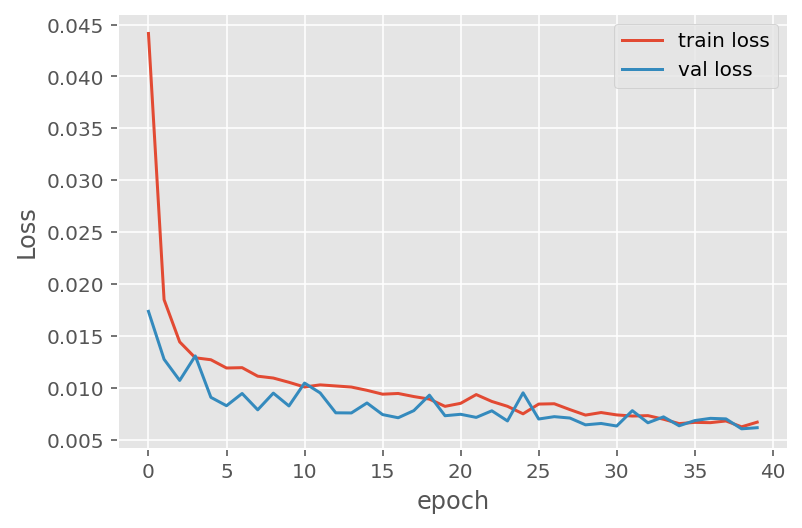

In [23]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

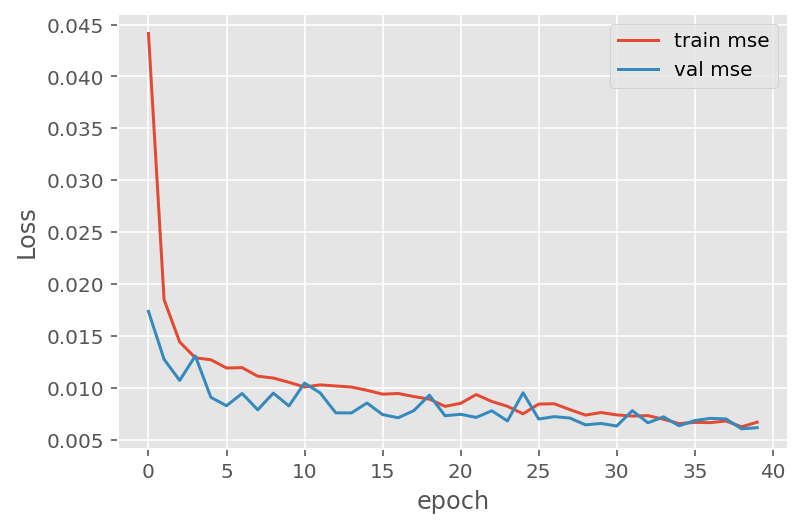

In [24]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

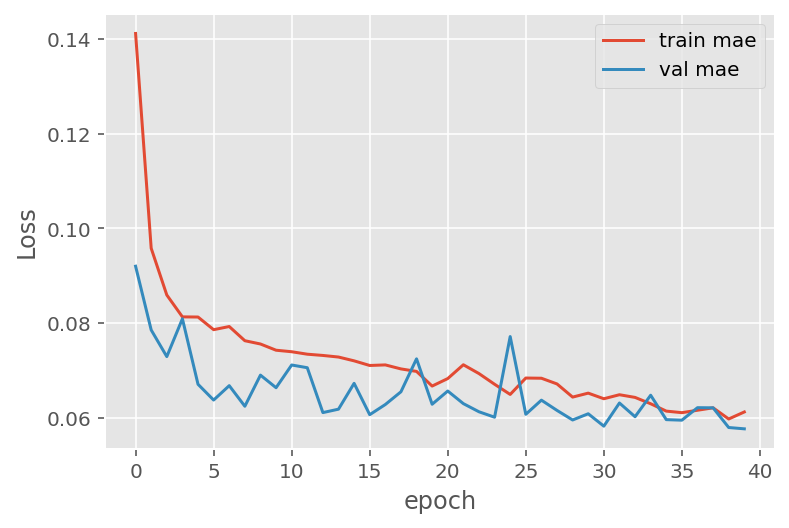

In [25]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 time_distributed (TimeDistr  (None, 1, 98, 64)        256       


 ibuted)                                                         


 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         


 tributed)                                                       


 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     


 tributed)                                                       


 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         


 tributed)                                                       


 time_distributed_4 (TimeDis  (None, 1, 21, 64)        24640     


 tributed)                                                       


 time_distributed_5 (TimeDis  (None, 1, 10, 64)        0         


 tributed)                                                       


 time_distributed_6 (TimeDis  (None, 1, 640)           0         


 tributed)                                                       


 bidirectional (Bidirectiona  (None, 1, 200)           592800    


 l)                                                              


 dropout (Dropout)           (None, 1, 200)            0         


 bidirectional_1 (Bidirectio  (None, 200)              240800    


 nal)                                                            


 dropout_1 (Dropout)         (None, 200)               0         


 dense (Dense)               (None, 1)                 201       


Total params: 883,401


Trainable params: 883,401


Non-trainable params: 0


_________________________________________________________________


None


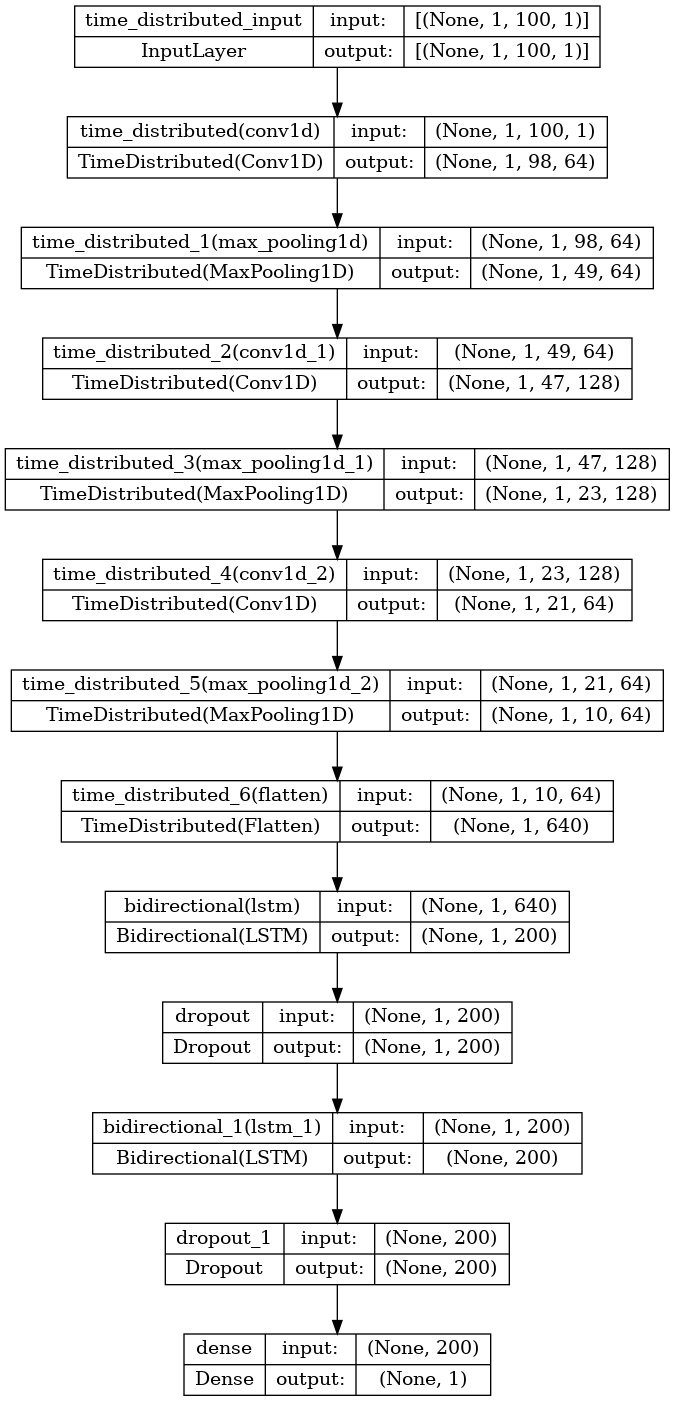

In [26]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [27]:
model.evaluate(test_X, test_Y)

 1/27 [>.............................] - ETA: 2s - loss: 0.0074 - mse: 0.0074 - mae: 0.0640

 4/27 [===>..........................] - ETA: 0s - loss: 0.0059 - mse: 0.0059 - mae: 0.0566

 8/27 [=======>......................] - ETA: 0s - loss: 0.0061 - mse: 0.0061 - mae: 0.0579

13/27 [=============>................] - ETA: 0s - loss: 0.0054 - mse: 0.0054 - mae: 0.0554

17/27 [=================>............] - ETA: 0s - loss: 0.0055 - mse: 0.0055 - mae: 0.0564

18/27 [===================>..........] - ETA: 0s - loss: 0.0058 - mse: 0.0058 - mae: 0.0567

21/27 [======================>.......] - ETA: 0s - loss: 0.0058 - mse: 0.0058 - mae: 0.0566

26/27 [===========================>..] - ETA: 0s - loss: 0.0062 - mse: 0.0062 - mae: 0.0577

27/27 [==============================] - 1s 23ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0576


[0.0061525809578597546, 0.0061525809578597546, 0.05762588977813721]

In [28]:

from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)
var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.961277
R2 Score: 0.961277
Max Error: 0.412907


 1/27 [>.............................] - ETA: 2s

 3/27 [==>...........................] - ETA: 1s

 8/27 [=======>......................] - ETA: 0s

13/27 [=============>................] - ETA: 0s

17/27 [=================>............] - ETA: 0s

22/27 [=======================>......] - ETA: 0s

26/27 [===========================>..] - ETA: 0s

27/27 [==============================] - 1s 23ms/step


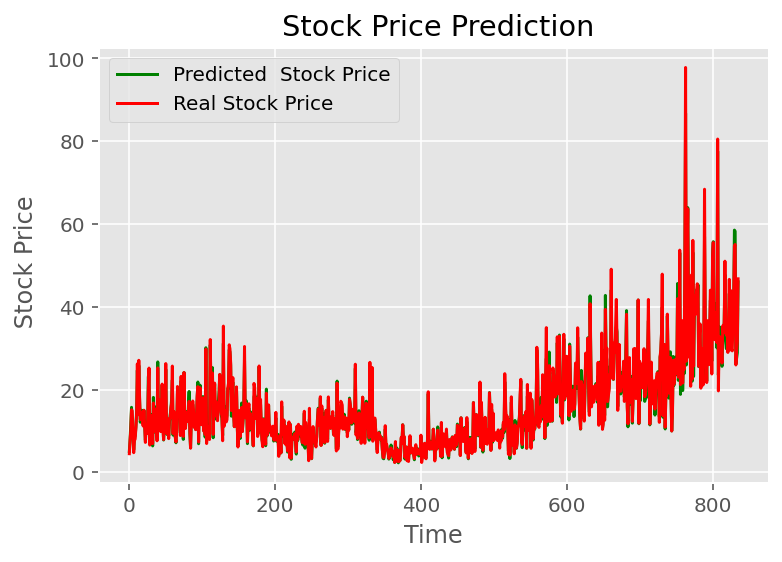

In [29]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

TESTING PART
In this part, the model is saved and loaded back again. Then, it's made to train again but with different data to check it's loss and prediction


In [30]:
model.save("model.h5")
new_model = tf.keras.models.load_model("./model.h5")
new_model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 time_distributed (TimeDistr  (None, 1, 98, 64)        256       


 ibuted)                                                         


 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         


 tributed)                                                       


 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     


 tributed)                                                       


 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         


 tributed)                                                       


 time_distributed_4 (TimeDis  (None, 1, 21, 64)        24640     


 tributed)                                                       


 time_distributed_5 (TimeDis  (None, 1, 10, 64)        0         


 tributed)                                                       


 time_distributed_6 (TimeDis  (None, 1, 640)           0         


 tributed)                                                       


 bidirectional (Bidirectiona  (None, 1, 200)           592800    


 l)                                                              


 dropout (Dropout)           (None, 1, 200)            0         


 bidirectional_1 (Bidirectio  (None, 200)              240800    


 nal)                                                            


 dropout_1 (Dropout)         (None, 200)               0         


 dense (Dense)               (None, 1)                 201       


Total params: 883,401


Trainable params: 883,401


Non-trainable params: 0


_________________________________________________________________


In [31]:
data2=pd.read_csv('TTM.csv')
data2.dropna(inplace=True)
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-13,10.62,10.64,10.51,10.60,9.197446,136500
1,2005-07-14,10.50,10.50,10.33,10.39,9.015231,136000
2,2005-07-15,10.50,10.65,10.50,10.55,9.154059,158700
3,2005-07-18,10.72,10.74,10.66,10.72,9.301566,88000
4,2005-07-19,10.80,11.03,10.80,10.99,9.535840,128000


In [32]:
data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

/tmp/ipykernel_1299/1477022006.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.fillna(data.mean(), inplace=True)


           Open       High        Low      Close  Adj Close  Volume
0     10.620000  10.640000  10.510000  10.600000   9.197446  136500
1     10.500000  10.500000  10.330000  10.390000   9.015231  136000
2     10.500000  10.650000  10.500000  10.550000   9.154059  158700
3     10.720000  10.740000  10.660000  10.720000   9.301566   88000
4     10.800000  11.030000  10.800000  10.990000   9.535840  128000
...         ...        ...        ...        ...        ...     ...
4274  26.180000  26.570000  26.129999  26.420000  26.420000  623700
4275  27.200001  27.879999  27.200001  27.700001  27.700001  715700
4276  27.750000  28.090000  27.690001  27.900000  27.900000  355300
4277  27.450001  27.540001  27.219999  27.260000  27.260000  341700
4278  26.940001  27.420000  26.860001  27.129999  27.129999  506800

[4279 rows x 6 columns]


3341
836


In [33]:
model.evaluate(test_X, test_Y)

 1/27 [>.............................] - ETA: 2s - loss: 0.0071 - mse: 0.0071 - mae: 0.0754

 2/27 [=>............................] - ETA: 2s - loss: 0.0050 - mse: 0.0050 - mae: 0.0606

 7/27 [======>.......................] - ETA: 0s - loss: 0.0053 - mse: 0.0053 - mae: 0.0595

11/27 [===========>..................] - ETA: 0s - loss: 0.0049 - mse: 0.0049 - mae: 0.0561

15/27 [===============>..............] - ETA: 0s - loss: 0.0098 - mse: 0.0098 - mae: 0.0729

20/27 [=====================>........] - ETA: 0s - loss: 0.0088 - mse: 0.0088 - mae: 0.0690

24/27 [=========================>....] - ETA: 0s - loss: 0.0086 - mse: 0.0086 - mae: 0.0684

27/27 [==============================] - 1s 24ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0668


[0.008167922496795654, 0.008167922496795654, 0.06679238379001617]

 1/27 [>.............................] - ETA: 2s

 4/27 [===>..........................] - ETA: 0s

 9/27 [=========>....................] - ETA: 0s

14/27 [==============>...............] - ETA: 0s

18/27 [===================>..........] - ETA: 0s

22/27 [=======================>......] - ETA: 0s

27/27 [==============================] - ETA: 0s

27/27 [==============================] - 1s 23ms/step


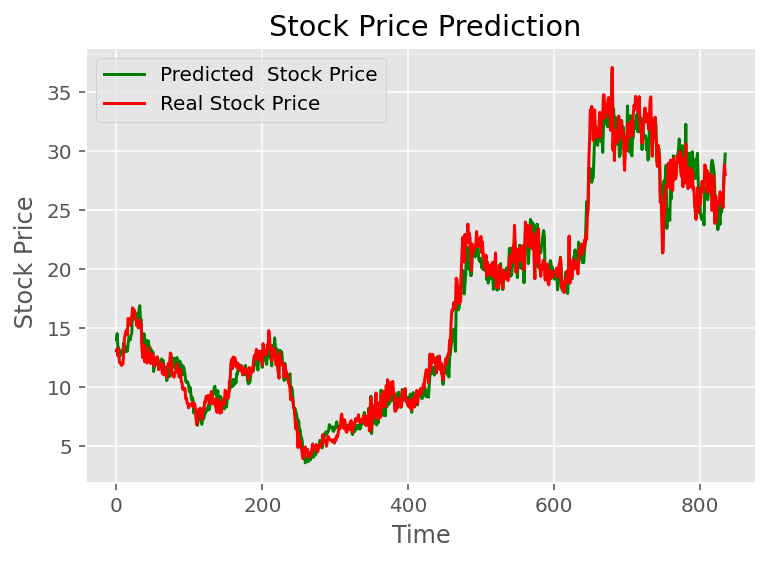

In [34]:

predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()